## Estimación de parámetros de la fuente sísmica con el modelo de Brune (1970)
Ibarra Morales Juan  
Sismología I  
Semestre 2018-2  
UMDI- UNAM- FCJ


El objetivo de este trabajo es utilizar el modelo propuesto por James Brune para estimar los valores de $M_0$, $M_w$ y $\Delta \sigma$ para nueve eventos que cuentan con sus parámetros previamente calculados, así como realizar una localización sencilla usando la técnica S-P.

#### Modelo de Brune
El modelo de Brune se basa en un análisis espectral que compara las frecuencias contra su amplitud. Definiendo dos valores: "$\Omega_0$ y $A_0$" y sustituyéndolas en las relaciones empíricas podemos calcular  parámetros de la fuente.  

$\Omega_0$ es la frecuencia esquina en la cual se observa el máximo decaimiento de la amplitud espectral.  
$A_0$ es la potencia máxima de la amplitud espectral, generalmente exhibe un comportamiento plano y está acotada entre la frecuencia mínima analizada y la frecuencia esquina.  

Las ecuaciones que permiten estimar $M_0$ y  $\Delta \sigma$ son:  

$M_0=4\pi \rho V^3 R \frac{\Omega_0}{R_\theta \phi}$  
y  
$ \Delta \sigma = M_0 (\frac{\Omega_0}{4.9*10^6 \beta_s})^3$ 

Donde $M_0$ es el momento sísmico, $\rho$ es la densidad del medio, V y $\beta$ son la velocidad de onda S, R la distancia epicentral, y $R_\theta \phi$ el patrón de radiación cuyo valor suele asignarse como 0.59.


#### Localización de eventos

Basados en el hecho de que las ondas de cuerpo tienen velocidades diferentes, estas experimentarán un retraso entre sí cuanto más tiempo y distancia sea recorrida por ellas, con este principio podemos localizar eventos. 

Con tres estaciones o más podemos triangular el evento, calulando la distancia que recorrierron las ondas hasta la estación trazamos círculos cuyos centros sean las estaciones y la intersección de los círculos será la localización del sismo. Una manera rápida de estimar esto es multiplicar el tiempo que existe entre los primeros arribos de las ondas P y S por 8 km/s.

La distancia está dada por la ecuación:

$ d = t_S- t_P (\frac{1}{v_S} - \frac{1}{v_P}) = t_S- t_P (\frac{v_P * v_S}{v_P - v_S})$

Tomando en cuenta que cerca de la superficie la velocidad de la onda P es cercana a los 5.9 km/s y que ésta es $\sqrt{3}$ más rápida que la onda S (3.4 km/s) en un medio isótropo, sustituyendo en el factor que contiene a las velocidades tenemos que:   

$(\frac{v_P * v_S}{v_P - v_S})=\frac{5.9*3.4}{5.9-3.4}= 8.024$

Este resultado se redondea y es de ahí que obtenemos el factor 8 para conocer la distancia entre los eventos y las estaciones.

In [1]:
from obspy import read, UTCDateTime
from obspy.clients.fdsn import Client
import numpy as np
import matplotlib.pyplot as plt
from obspy import read_inventory
import numpy as np
from obspy.core.event import Catalog, Event, Origin, Magnitude
from mpl_toolkits.basemap import Basemap

In [2]:
cli=Client("IRIS")

In [3]:
t1=UTCDateTime(2006,2,17,19,54,14)
t2=UTCDateTime(2006,2,22,16,31,22)
t3=UTCDateTime(2006,3,1,0,12,10)
t4=UTCDateTime(2006,8,17,23,34,52)
t5=UTCDateTime(2006,12,10,19,40,30)
t6=UTCDateTime(2007,4,13,14,42,27)
t7=UTCDateTime(2007,4,13,5,3,34)
t8=UTCDateTime(2007,4,13,5,42,57)
t9=UTCDateTime(2007,4,13,10,48,8)

#Red XF (Mapping THe Riviera Subduction Zone)
#18.38033    -102.519    -23.74    20060217195414.00    5.3
#19.24833    -103.7412    -21.36    20060222163122.60    4.5
#18.40417    -102.6742    -38.1    20060301001210.20    4.5
#18.7125    -102.5013    -64.45    20060817233452.80    4.9 0.36    
#18.28267    -103.4173    -0.49    20061210194030.70    4.9 0.36    0.9    1.4
#18.0435    -102.9507    -2.24    20070413144227.40    5.8 0.36    1.1    1.3
#18.2815    -103.0528    -4.25    20070413050334.20    4.5 0.33    0.8    1.8
#18.86983    -102.4007    -3.64    20070413054257.10    6.3 0.3        1.5    1.5
#17.7065    -105.2178    -20        20070413104808.10    4.5 0.07     0    0

## Red sísmica
Los datos fueron pedidos al cliente IRIS, repositorio que forma parte de la FDSN, se utilizaron las trazas de la red sísmica MARS "XF", un proyecto que funcionó entre 2006 y 2007 que buscaba entender la subducción de la placa de Rivera debajo de la placa Norteamericana. El modelo de Brune utilizado está basado para ondas S, por lo que se descargaron las componentes horizontales donde es más visible y se utilizaron equipos de banda ancha.

In [4]:
inv=cli.get_stations(network="XF", station="MA**", channel="BHE,BHN", level="response")

In [5]:
inv

Inventory created at 2018-06-08T13:45:37.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.33
		    http://service.iris.edu/fdsnws/station/1/query?network=XF&station=M...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (1):
			XF
		Stations (51):
			XF.MA01 (M01)
			XF.MA02 (M02)
			XF.MA04 (M04)
			XF.MA05 (M05)
			XF.MA06 (M06)
			XF.MA07 (M07)
			XF.MA08 (M08)
			XF.MA09 (M09)
			XF.MA11 (M11)
			XF.MA12 (M12)
			XF.MA14 (M14)
			XF.MA15 (M15)
			XF.MA16 (M16)
			XF.MA17 (M17)
			XF.MA18 (M18)
			XF.MA19 (M19)
			XF.MA20 (M20)
			XF.MA21 (M21)
			XF.MA22 (M22)
			XF.MA23 (M23)
			XF.MA24 (M24)
			XF.MA25 (M25)
			XF.MA26 (M26)
			XF.MA27 (M27)
			XF.MA28 (M28)
			XF.MA29 (M29)
			XF.MA30 (M30)
			XF.MA31 (M31)
			XF.MA32 (M32)
			XF.MA33 (M33)
			XF.MA34 (M34)
			XF.MA35 (M35)
			XF.MA36 (M36)
			XF.MA37 (M37)
			XF.MA38 (M38)
			XF.MA40 (M40)
			XF.MA41 (M41)
			XF.MA42 (M42)
			XF.MA43 (M43)
			XF.MA44 (M44)
			XF.MA45 (M45)
			XF.MA46 (M46)
			X

### Respuesta instrumental
Los equipos de las estaciones utilizadas consisten en un sensor Streckeisen STS2 /Quanterra 330 Linear Phase Compo
Su constante de sensitividad es 6.26646e+08 a 5.000 Hz. A continuación se muestran las respuestas instrumentales en desplazamiento.

No handles with labels found to put in legend.


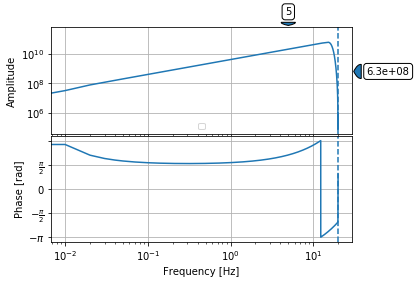

No handles with labels found to put in legend.


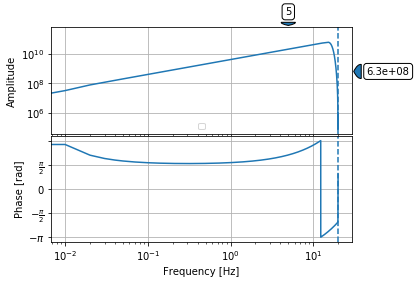

In [6]:
resp2_n=inv[0][1][0].response
resp2_n.plot(0.01, output="DISP");

resp2_e=inv[0][1][1].response
resp2_e.plot(0.01, output="DISP");

No handles with labels found to put in legend.


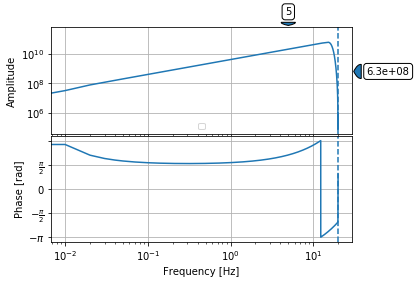

No handles with labels found to put in legend.


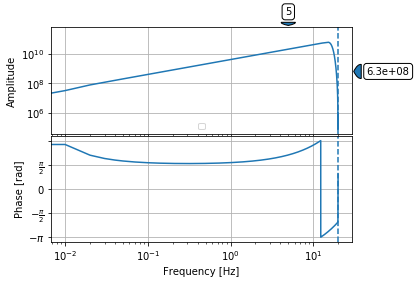

In [7]:
resp2_n=inv[0][7][0].response
resp2_n.plot(0.01, output="DISP");

resp2_e=inv[0][7][1].response
resp2_e.plot(0.01, output="DISP");

No handles with labels found to put in legend.


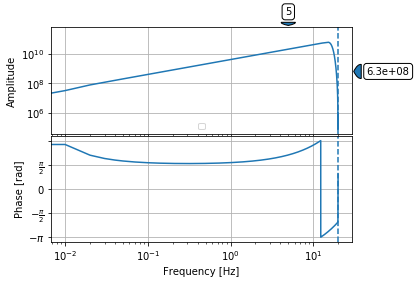

No handles with labels found to put in legend.


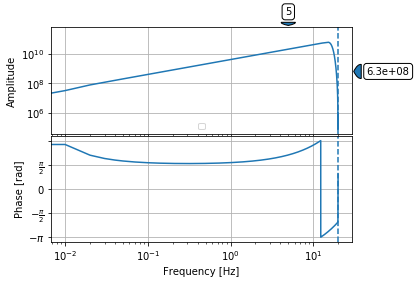

In [8]:
resp2_n=inv[0][8][0].response
resp2_n.plot(0.01, output="DISP");

resp2_e=inv[0][8][1].response
resp2_e.plot(0.01, output="DISP");

No handles with labels found to put in legend.


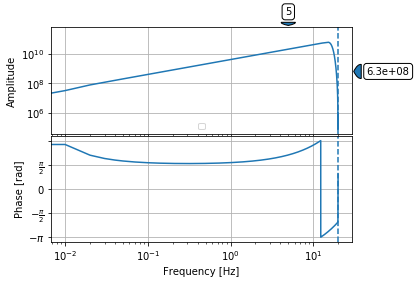

No handles with labels found to put in legend.


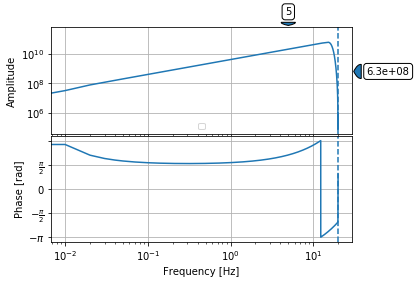

In [9]:
resp2_n=inv[0][10][0].response
resp2_n.plot(0.01, output="DISP");

resp2_e=inv[0][10][1].response
resp2_e.plot(0.01, output="DISP");

No handles with labels found to put in legend.


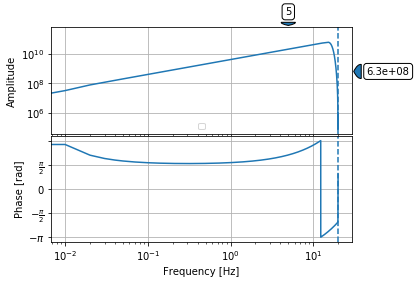

No handles with labels found to put in legend.


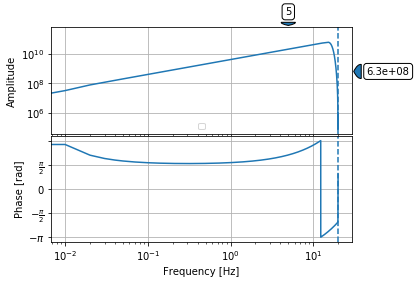

In [10]:
resp2_n=inv[0][16][0].response
resp2_n.plot(0.01, output="DISP");

resp2_e=inv[0][16][1].response
resp2_e.plot(0.01, output="DISP");

In [11]:
cat=Catalog()
#EVENTO 1
e1=Event()
o1=Origin()
o1.time=t1
o1.latitude=18.38033 
o1.longitude=-102.519
o1.depth=23.74
m1=Magnitude()
m1.mag=5.3
m1.magnitude_type= "Mw"

cat.append(e1)
e1.origins=[o1]
e1.magnitudes=[m1]
#EVENTO 2
e2=Event()
o2=Origin()
o2.time=t2
o2.latitude=19.2483
o2.longitude=-103.7412
o2.depth=21.36
m2=Magnitude()
m2.mag=4.5
m2.magnitude_type= "Mw"

cat.append(e2)
e2.origins=[o2]
e2.magnitudes=[m2]
#EVENTO 3
e3=Event()
o3=Origin()
o3.time=t3
o3.latitude=18.4041
o3.longitude=-102.6742 
o3.depth=38.1
m3=Magnitude()
m3.mag=4.5
m3.magnitude_type= "Mw"

cat.append(e3)
e3.origins=[o3]
e3.magnitudes=[m3]
#EVENTO 4
e4=Event()
o4=Origin()
o4.time=t4
o4.latitude=18.712
o4.longitude=-102.50
o4.depth=64.4
m4=Magnitude()
m4.mag=4.9
m4.magnitude_type= "Mw"

cat.append(e4)
e4.origins=[o4]
e4.magnitudes=[m4]
#EVENTO 5
e5=Event()
o5=Origin()
o5.time=t5
o5.latitude=18.28
o5.longitude=-103.41
o5.depth=0.49
m5=Magnitude()
m5.mag=4.9
m5.magnitude_type= "Mw"

cat.append(e5)
e5.origins=[o5]
e5.magnitudes=[m5]
#EVENTO 6
e6=Event()
o6=Origin()
o6.time=t6
o6.latitude=18.04
o6.longitude=-102.95
o6.depth=2.24
m6=Magnitude()
m6.mag=5.8
m6.magnitude_type= "Mw"

cat.append(e6)
e6.origins=[o6]
e6.magnitudes=[m6]
#EVENTO 7
e7=Event()
o7=Origin()
o7.time=t7
o7.latitude=18.28
o7.longitude=-103.05
o7.depth=4.25
m7=Magnitude()
m7.mag=4.5
m7.magnitude_type= "Mw"

cat.append(e7)
e7.origins=[o7]
e7.magnitudes=[m7]
#EVENTO 8
e8=Event()
o8=Origin()
o8.time=t8
o8.latitude=18.86
o8.longitude=-102.40
o8.depth=3.64
m8=Magnitude()
m8.mag=6.3
m8.magnitude_type= "Mw"

cat.append(e8)
e8.origins=[o8]
e8.magnitudes=[m8]
#EVENTO 9
e9=Event()
o9=Origin()
o9.time=t9
o9.latitude=17.70
o9.longitude=-105.21
o9.depth=20
m9=Magnitude()
m9.mag=4.5
m9.magnitude_type= "Mw"

cat.append(e9)
e9.origins=[o9]
e9.magnitudes=[m9]

### EVENTOS
A continuación se listan los eventos utilizados, su latitud, longitud y su magnitud momento, debajo un mapa que muestra su relación geográfica con las estaciones de la red XF.

In [12]:
cat

9 Event(s) in Catalog:
2006-02-17T19:54:14.000000Z | +18.380, -102.519 | 5.3 Mw
2006-02-22T16:31:22.000000Z | +19.248, -103.741 | 4.5 Mw
2006-03-01T00:12:10.000000Z | +18.404, -102.674 | 4.5 Mw
2006-08-17T23:34:52.000000Z | +18.712, -102.500 | 4.9 Mw
2006-12-10T19:40:30.000000Z | +18.280, -103.410 | 4.9 Mw
2007-04-13T14:42:27.000000Z | +18.040, -102.950 | 5.8 Mw
2007-04-13T05:03:34.000000Z | +18.280, -103.050 | 4.5 Mw
2007-04-13T05:42:57.000000Z | +18.860, -102.400 | 6.3 Mw
2007-04-13T10:48:08.000000Z | +17.700, -105.210 | 4.5 Mw

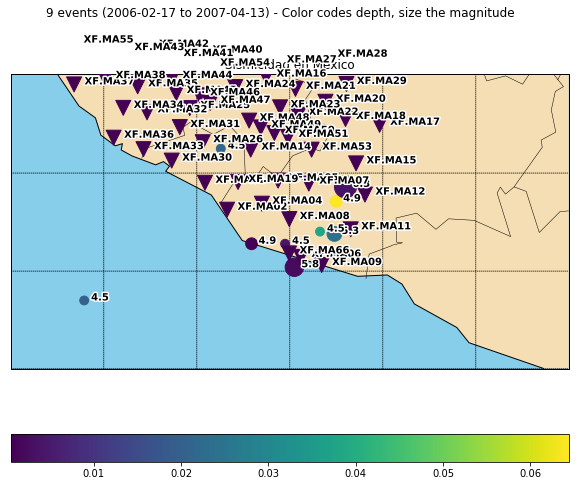

In [13]:
fig, ax=plt.subplots(figsize=(10,8))
m= Basemap(resolution='l', projection='merc',
            llcrnrlon=-106,llcrnrlat=17,urcrnrlon=-100,urcrnrlat=20)
m.drawcoastlines()
m.drawcountries()
m.fillcontinents(color='wheat', lake_color='skyblue')
m.drawstates(linewidth=0.5, linestyle='solid', color='k', antialiased=1, ax=None, zorder=None)
# draw parallels and meridians.
m.drawparallels(np.arange(10., 20., 1.))
m.drawmeridians(np.arange(-106., -100., 1.))
m.drawmapboundary(fill_color='skyblue')
ax.set_title("Sismicidad en México")

fig.bmap = m
cat.plot(fig=fig, figsize=(10,30), show=False);
inv.plot(color='177',fig=fig, figsize=(10,30), show=False);
plt.show();

### Solicitud y procesado de datos
Se interrogó al cliente IRIS para obtener las trazas horizontales de las 5 estaciones más cercanas a los eventos que cubrieran un azimut amplio, en caso de no obtener datos de dicha estación se obtó por usar una estación vecina.


Después de descargar las trazas se realizó una copia para poder aplicar los atributos, se inicia con una deconvolución instrumental que elimina el valor medio y convierte las trazas a unidades de desplazamiento.
Se aplicó un filtro pasabandas entre 1 y 20 Hz con el fin de estabilizar la señal
En estos registros se toma cuenta de la diferencia S-P para la localización.

Posteriormente se hace un trim manual a la traza en la zona cercana al arribo de onda S, la duración de las ventanas para todas las trazas se definió en un segundo intentando concentrar la mayor cantidad de energía de la onda S.

#### Evento 1

In [14]:
#EVENTO 1 Mw=5.3

st1=cli.get_waveforms("XF","MA04,MA08,MA09,MA11,MA17","**","BHE,BHN", t1, t1+120, attach_response=True)

In [15]:
st1

10 Trace(s) in Stream:
XF.MA04.31.BHN | 2006-02-17T19:54:14.000001Z - 2006-02-17T19:56:13.975001Z | 40.0 Hz, 4800 samples
XF.MA04.32.BHE | 2006-02-17T19:54:14.000001Z - 2006-02-17T19:56:13.975001Z | 40.0 Hz, 4800 samples
XF.MA08.31.BHN | 2006-02-17T19:54:14.000001Z - 2006-02-17T19:56:13.975001Z | 40.0 Hz, 4800 samples
XF.MA08.32.BHE | 2006-02-17T19:54:14.000001Z - 2006-02-17T19:56:13.975001Z | 40.0 Hz, 4800 samples
XF.MA09.31.BHN | 2006-02-17T19:54:14.000003Z - 2006-02-17T19:56:13.975003Z | 40.0 Hz, 4800 samples
XF.MA09.32.BHE | 2006-02-17T19:54:14.000003Z - 2006-02-17T19:56:13.975003Z | 40.0 Hz, 4800 samples
XF.MA11.31.BHN | 2006-02-17T19:54:14.024098Z - 2006-02-17T19:56:13.999098Z | 40.0 Hz, 4800 samples
XF.MA11.32.BHE | 2006-02-17T19:54:14.024098Z - 2006-02-17T19:56:13.999098Z | 40.0 Hz, 4800 samples
XF.MA17.31.BHN | 2006-02-17T19:54:14.000001Z - 2006-02-17T19:56:13.975001Z | 40.0 Hz, 4800 samples
XF.MA17.32.BHE | 2006-02-17T19:54:14.000001Z - 2006-02-17T19:56:13.975001Z | 40.0 Hz, 

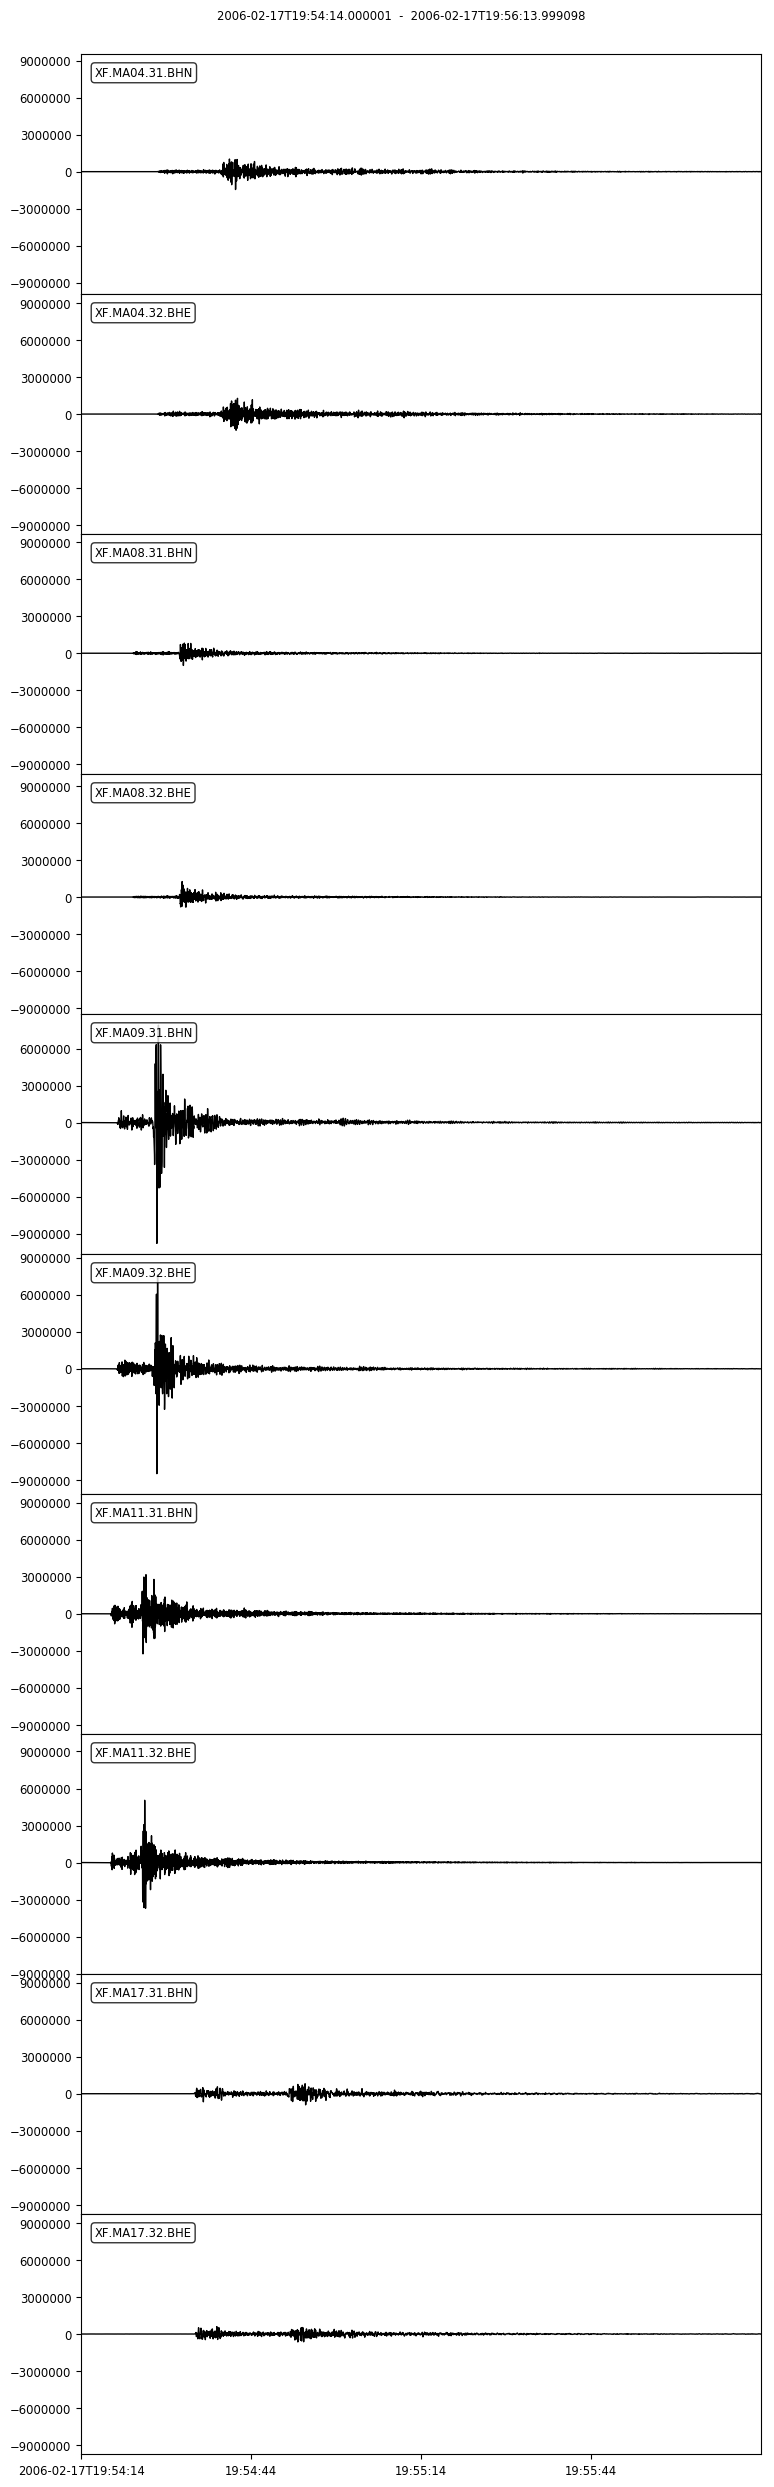

In [16]:
st1.plot()

In [17]:
cop1=st1.copy()

In [18]:
cop1.remove_response(inventory=inv,zero_mean=True, output='DISP')

10 Trace(s) in Stream:
XF.MA04.31.BHN | 2006-02-17T19:54:14.000001Z - 2006-02-17T19:56:13.975001Z | 40.0 Hz, 4800 samples
XF.MA04.32.BHE | 2006-02-17T19:54:14.000001Z - 2006-02-17T19:56:13.975001Z | 40.0 Hz, 4800 samples
XF.MA08.31.BHN | 2006-02-17T19:54:14.000001Z - 2006-02-17T19:56:13.975001Z | 40.0 Hz, 4800 samples
XF.MA08.32.BHE | 2006-02-17T19:54:14.000001Z - 2006-02-17T19:56:13.975001Z | 40.0 Hz, 4800 samples
XF.MA09.31.BHN | 2006-02-17T19:54:14.000003Z - 2006-02-17T19:56:13.975003Z | 40.0 Hz, 4800 samples
XF.MA09.32.BHE | 2006-02-17T19:54:14.000003Z - 2006-02-17T19:56:13.975003Z | 40.0 Hz, 4800 samples
XF.MA11.31.BHN | 2006-02-17T19:54:14.024098Z - 2006-02-17T19:56:13.999098Z | 40.0 Hz, 4800 samples
XF.MA11.32.BHE | 2006-02-17T19:54:14.024098Z - 2006-02-17T19:56:13.999098Z | 40.0 Hz, 4800 samples
XF.MA17.31.BHN | 2006-02-17T19:54:14.000001Z - 2006-02-17T19:56:13.975001Z | 40.0 Hz, 4800 samples
XF.MA17.32.BHE | 2006-02-17T19:54:14.000001Z - 2006-02-17T19:56:13.975001Z | 40.0 Hz, 

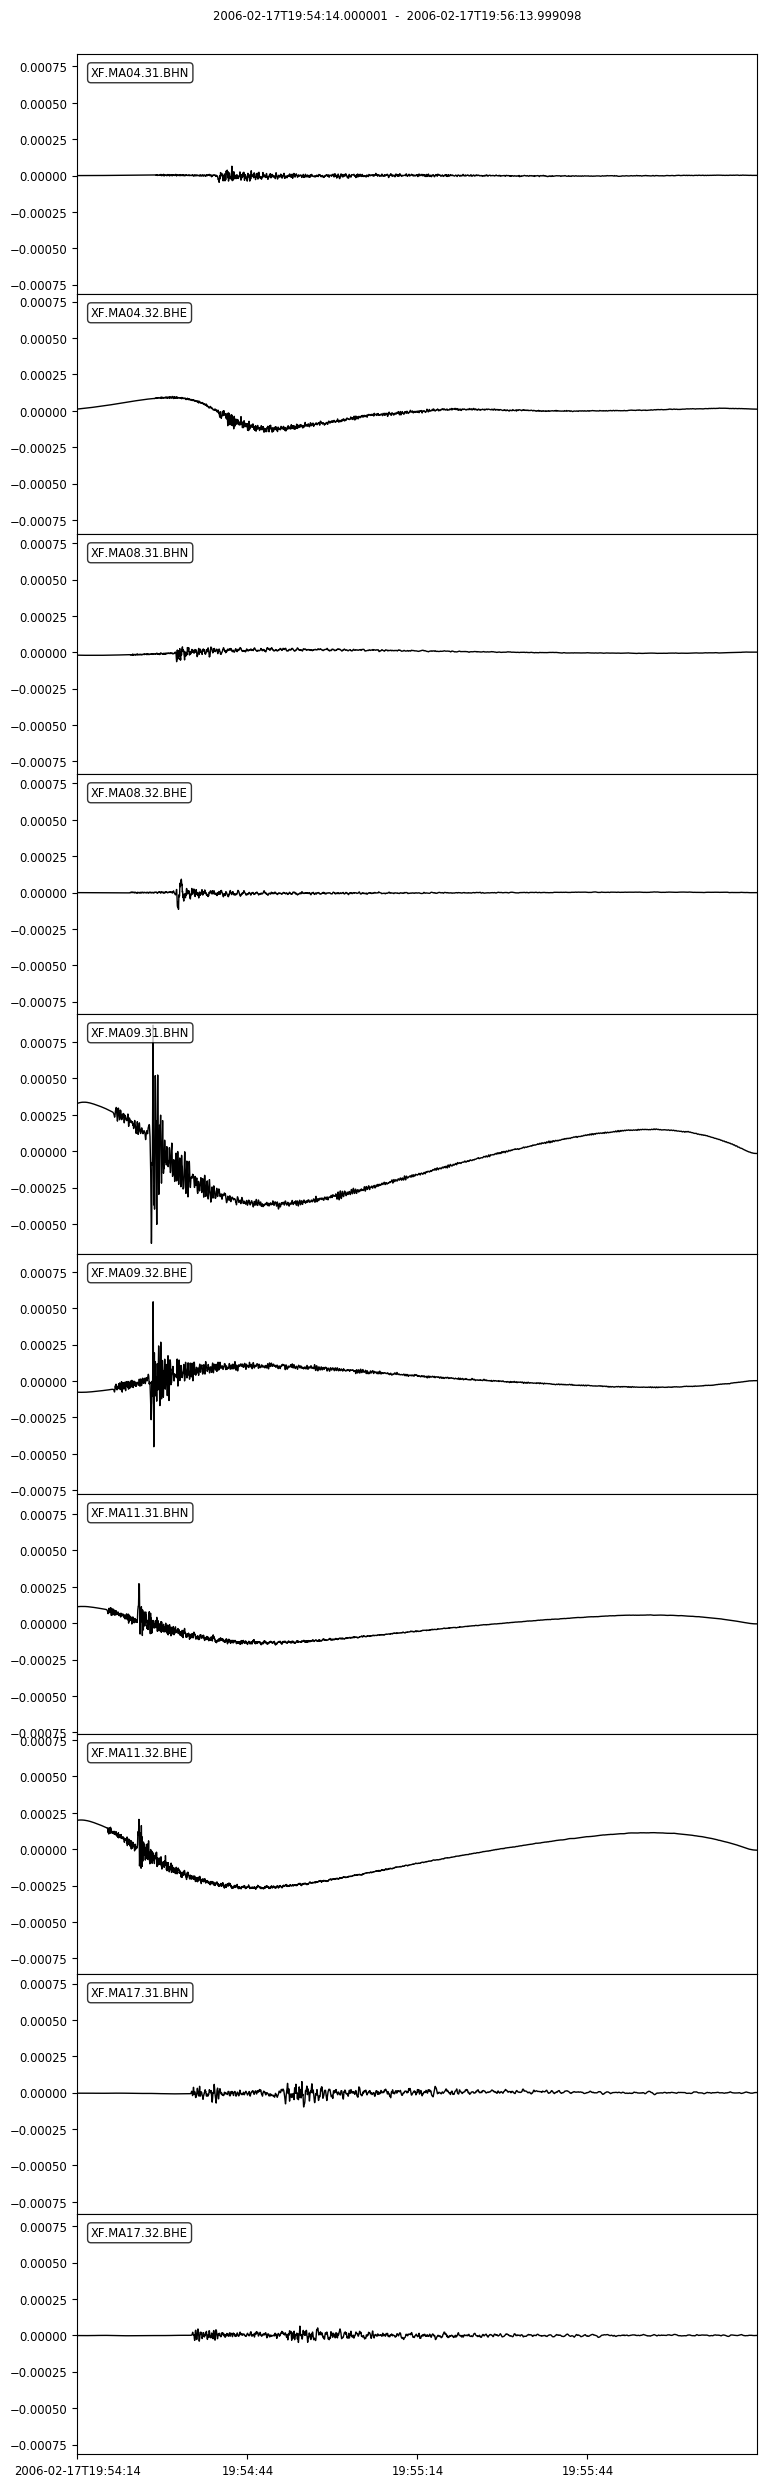

In [19]:
cop1.plot()

In [20]:
cop1.filter('bandpass', freqmin=1, freqmax=20)

/home/juan/anaconda3/lib/python3.6/site-packages/obspy/signal/filter.py:67: UserWarning: Selected high corner frequency (20) of bandpass is at or above Nyquist (20.0). Applying a high-pass instead.
  warnings.warn(msg)


10 Trace(s) in Stream:
XF.MA04.31.BHN | 2006-02-17T19:54:14.000001Z - 2006-02-17T19:56:13.975001Z | 40.0 Hz, 4800 samples
XF.MA04.32.BHE | 2006-02-17T19:54:14.000001Z - 2006-02-17T19:56:13.975001Z | 40.0 Hz, 4800 samples
XF.MA08.31.BHN | 2006-02-17T19:54:14.000001Z - 2006-02-17T19:56:13.975001Z | 40.0 Hz, 4800 samples
XF.MA08.32.BHE | 2006-02-17T19:54:14.000001Z - 2006-02-17T19:56:13.975001Z | 40.0 Hz, 4800 samples
XF.MA09.31.BHN | 2006-02-17T19:54:14.000003Z - 2006-02-17T19:56:13.975003Z | 40.0 Hz, 4800 samples
XF.MA09.32.BHE | 2006-02-17T19:54:14.000003Z - 2006-02-17T19:56:13.975003Z | 40.0 Hz, 4800 samples
XF.MA11.31.BHN | 2006-02-17T19:54:14.024098Z - 2006-02-17T19:56:13.999098Z | 40.0 Hz, 4800 samples
XF.MA11.32.BHE | 2006-02-17T19:54:14.024098Z - 2006-02-17T19:56:13.999098Z | 40.0 Hz, 4800 samples
XF.MA17.31.BHN | 2006-02-17T19:54:14.000001Z - 2006-02-17T19:56:13.975001Z | 40.0 Hz, 4800 samples
XF.MA17.32.BHE | 2006-02-17T19:54:14.000001Z - 2006-02-17T19:56:13.975001Z | 40.0 Hz, 

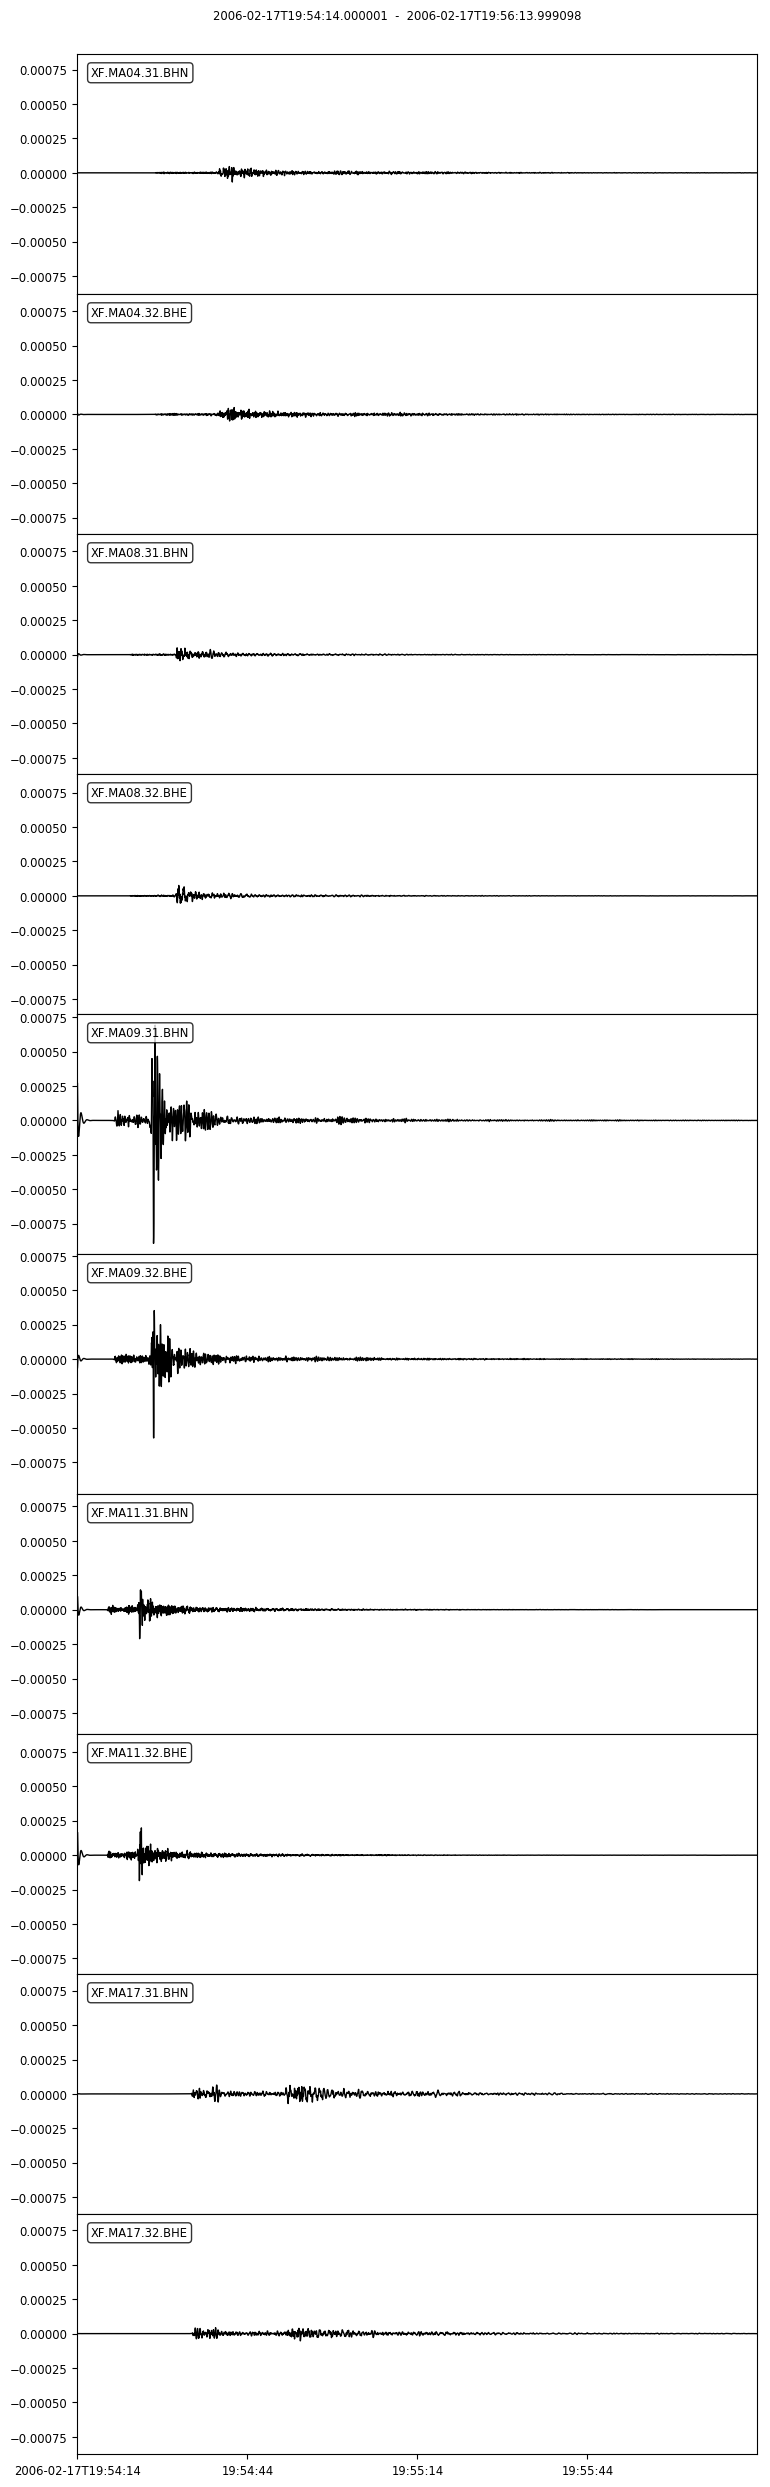

In [21]:
cop1.plot(number_of_ticks=4)

In [22]:
cop1[0].trim(t1+26,t1+27)
cop1[1].trim(t1+26,t1+27)

cop1[2].trim(t1+17,t1+18)
cop1[3].trim(t1+17,t1+18)

cop1[4].trim(t1+12,t1+13)
cop1[5].trim(t1+12,t1+13)

cop1[6].trim(t1+10,t1+11)
cop1[7].trim(t1+10,t1+11)

cop1[8].trim(t1+36,t1+37)
cop1[9].trim(t1+36,t1+37)

XF.MA17.32.BHE | 2006-02-17T19:54:50.000001Z - 2006-02-17T19:54:51.000001Z | 40.0 Hz, 41 samples

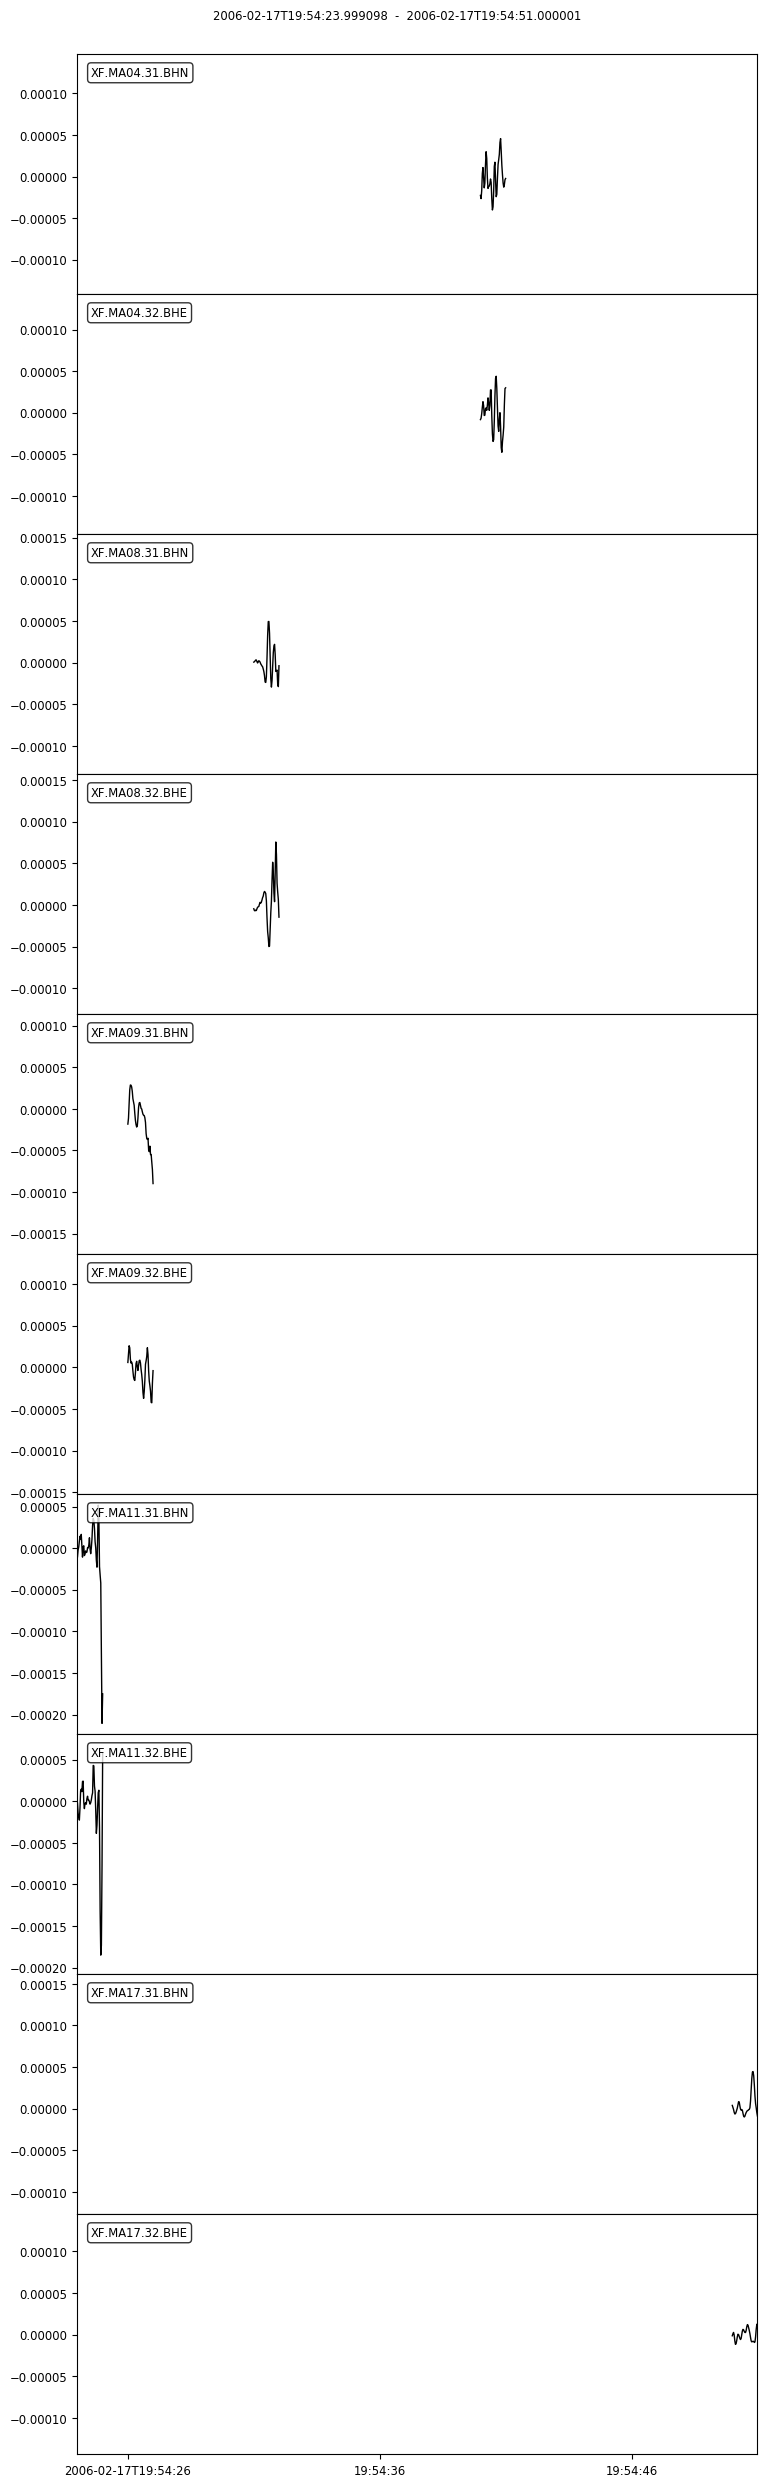

In [23]:
cop1.plot()

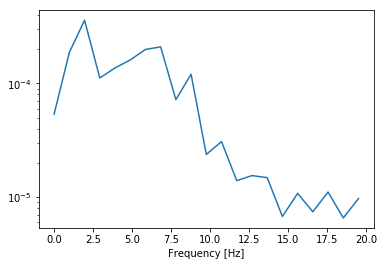

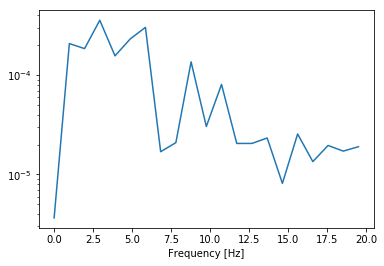

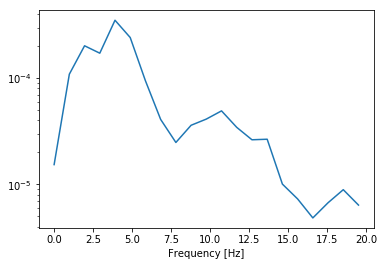

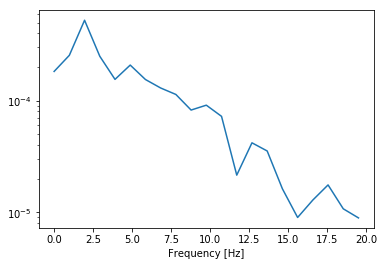

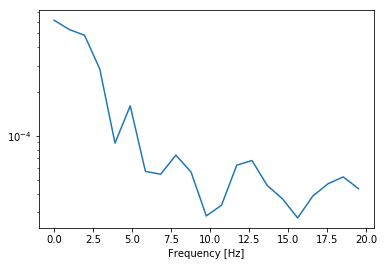

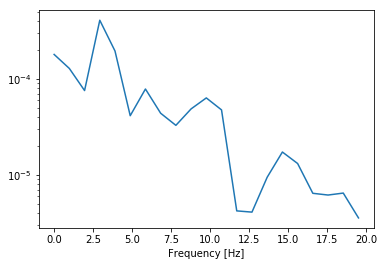

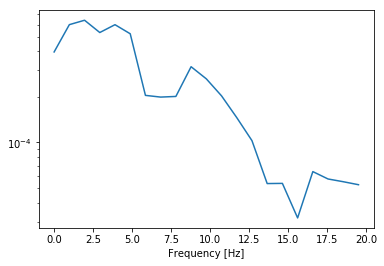

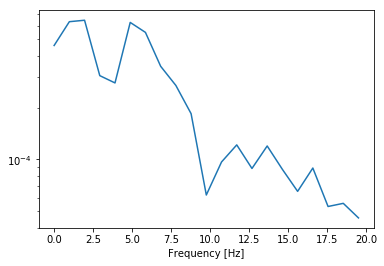

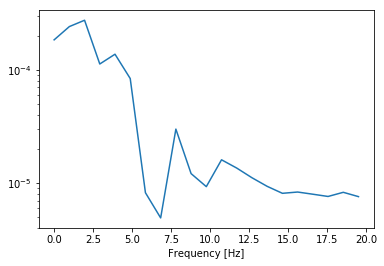

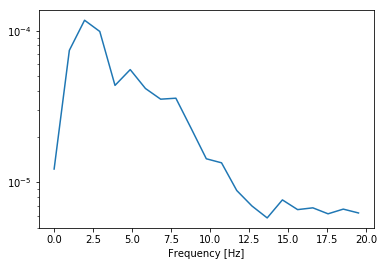

In [101]:
for tr in cop1:
    D=np.fft.rfft(tr.data)
    freqs = np.fft.rfftfreq(tr.stats.npts, d=tr.stats.delta)
    figx=
    plt.plot(freqs, np.abs(D))
    plt.xlabel("Frequency [Hz]")
    plt.yscale('log')
    plt.show()

#### Evento 2
Este evento solo fue identificado en una estación por lo que fue descartado para el análisis.

In [25]:
#EVENTO 2

st2=cli.get_waveforms("XF","MA14,MA18,MA19,MA26,MA30","**","BHE,BHN", t2, t2+120, attach_response=True)

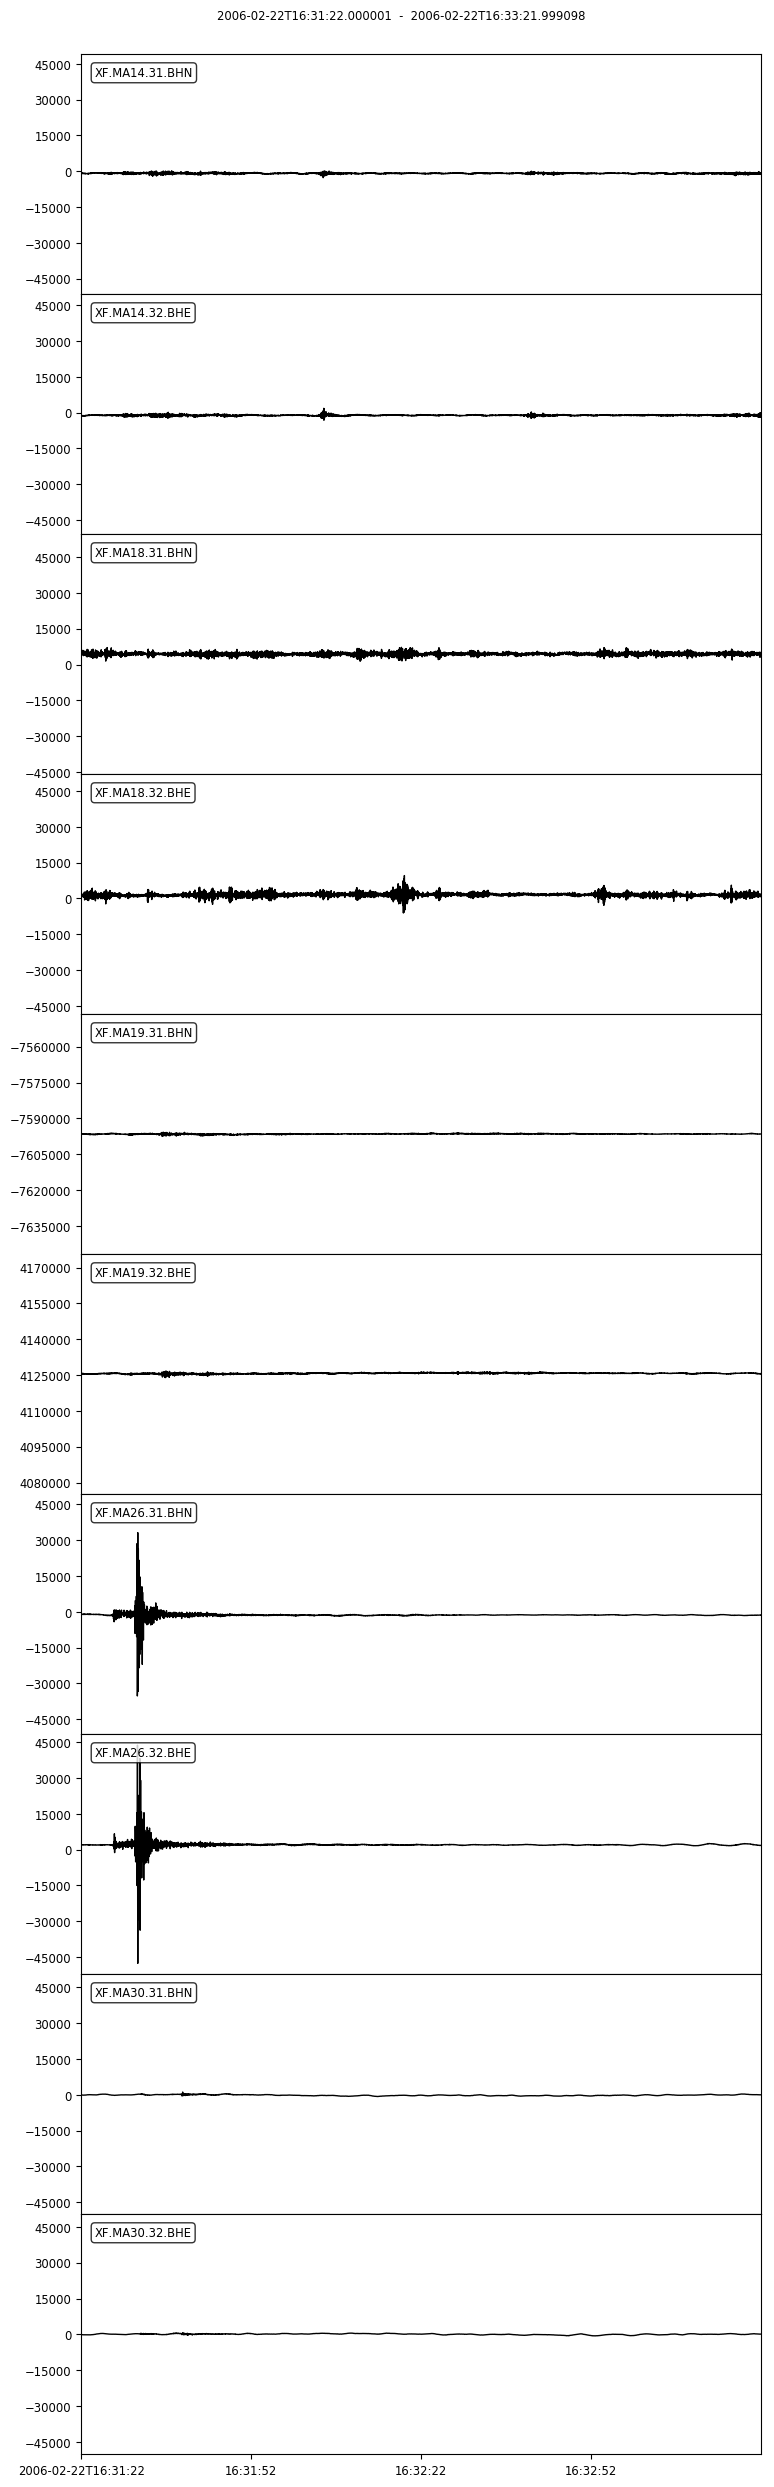

In [26]:
st2.plot()

In [27]:
cop2=st2.copy()

In [28]:
cop2[6].trim(t2+9,t2+10)

XF.MA26.31.BHN | 2006-02-22T16:31:31.000003Z - 2006-02-22T16:31:32.000003Z | 40.0 Hz, 41 samples

In [29]:
cop2[7].trim(t2+9,t2+10)

XF.MA26.32.BHE | 2006-02-22T16:31:31.000003Z - 2006-02-22T16:31:32.000003Z | 40.0 Hz, 41 samples

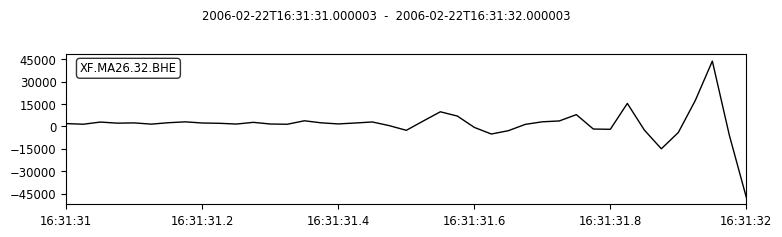

In [30]:
cop2[7].plot()

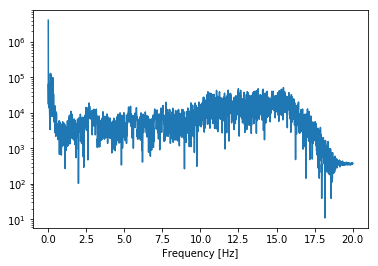

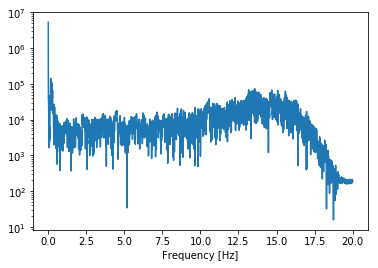

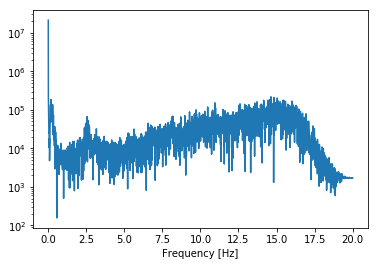

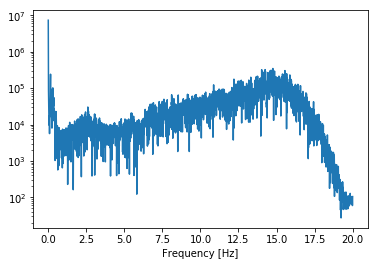

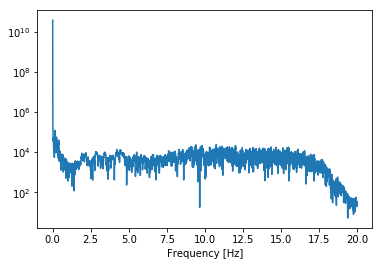

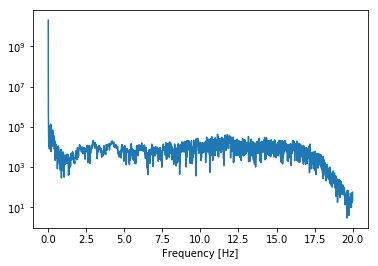

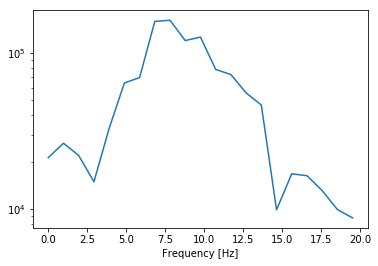

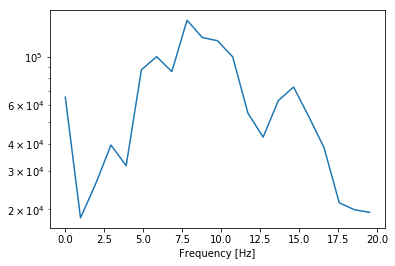

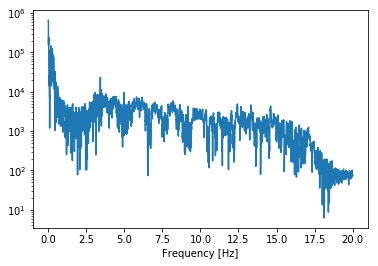

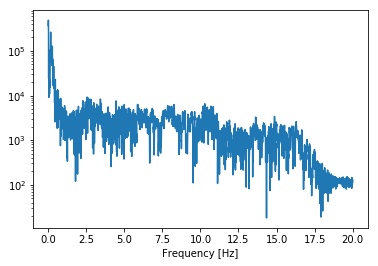

In [31]:
for tr in cop2:
    D2=np.fft.rfft(tr.data)
    freqs2 = np.fft.rfftfreq(tr.stats.npts, d=tr.stats.delta)
    
    plt.plot(freqs2, np.abs(D2))
    plt.xlabel("Frequency [Hz]")
    plt.yscale('log')
    plt.show()

#### Evento 3

In [32]:
#EVENTO 3
st3=cli.get_waveforms("XF","MA02,MA08,MA09,MA11,MA17","**","BHE,BHN", t3, t3+60, attach_response=True)

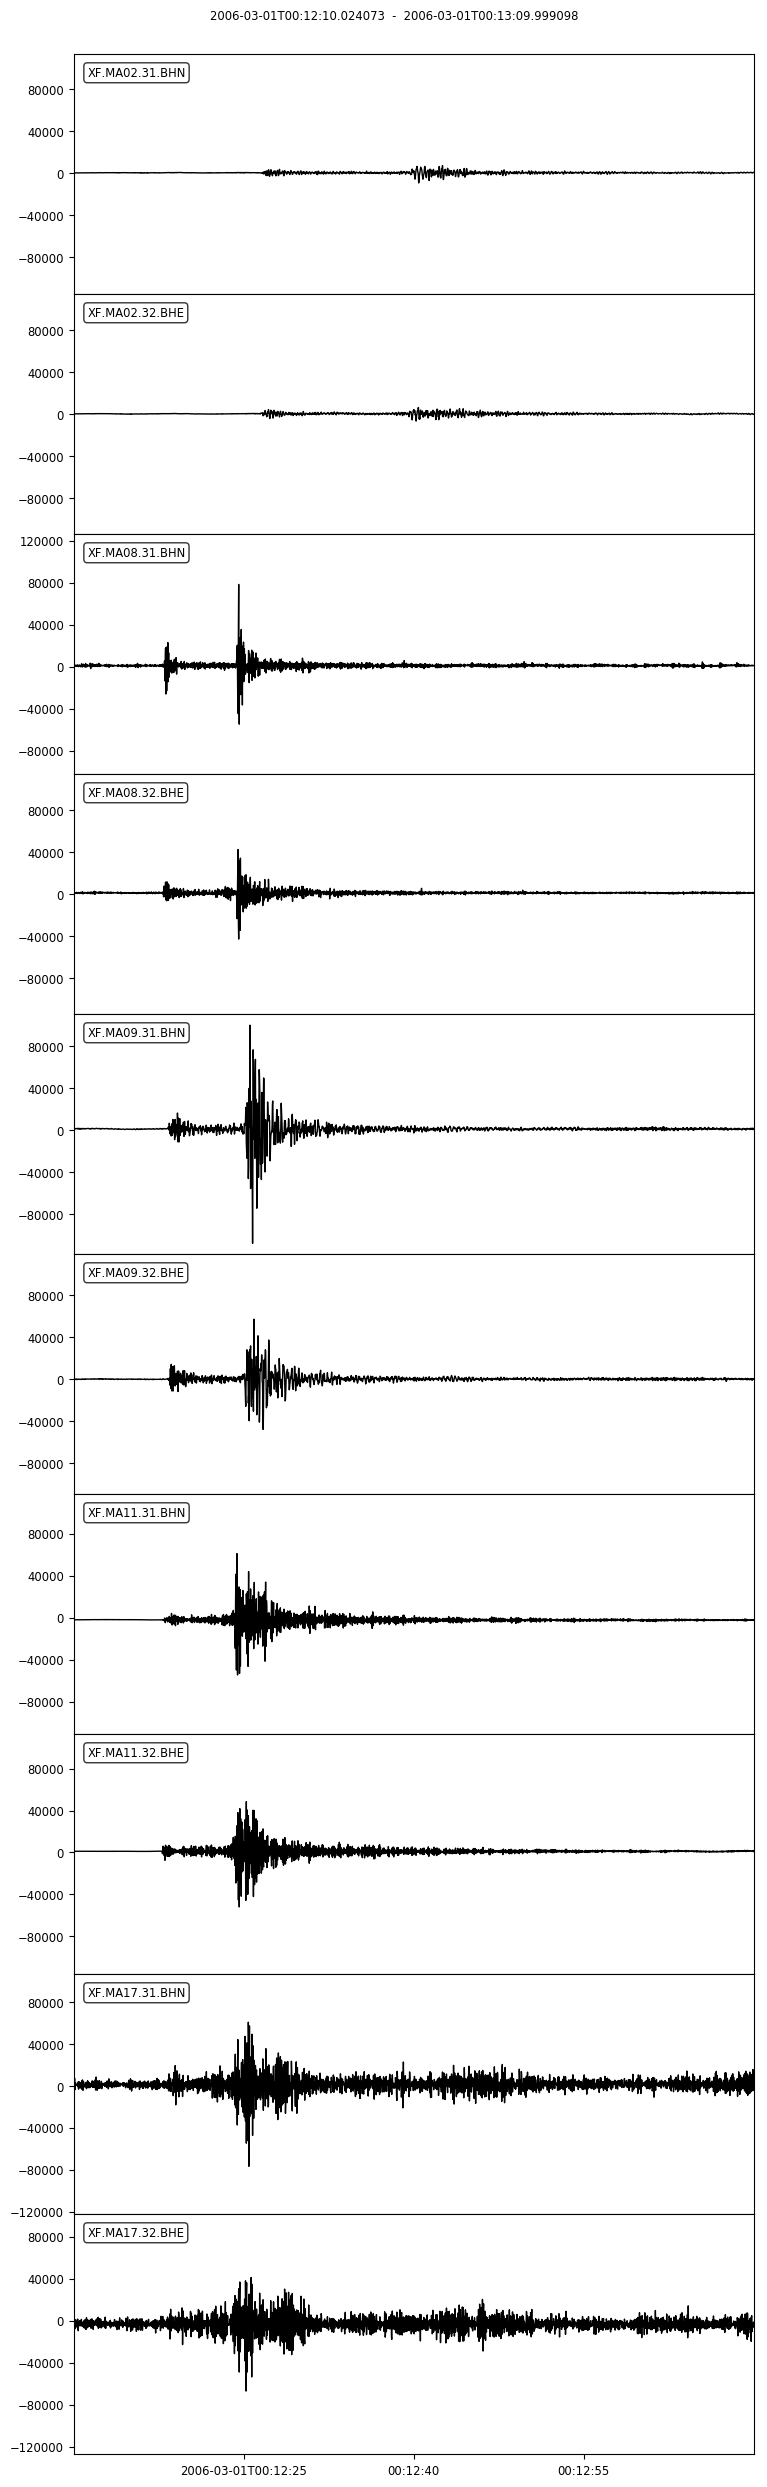

In [33]:
st3.plot()

In [34]:
cop3=st3.copy()
cop3.remove_response(inventory=inv, zero_mean=True, output='DISP')
cop3.filter('bandpass',freqmin=1, freqmax=20)

/home/juan/anaconda3/lib/python3.6/site-packages/obspy/signal/filter.py:67: UserWarning: Selected high corner frequency (20) of bandpass is at or above Nyquist (20.0). Applying a high-pass instead.
  warnings.warn(msg)


10 Trace(s) in Stream:
XF.MA02.31.BHN | 2006-03-01T00:12:10.024098Z - 2006-03-01T00:13:09.999098Z | 40.0 Hz, 2400 samples
XF.MA02.32.BHE | 2006-03-01T00:12:10.024098Z - 2006-03-01T00:13:09.999098Z | 40.0 Hz, 2400 samples
XF.MA08.31.BHN | 2006-03-01T00:12:10.024098Z - 2006-03-01T00:13:09.999098Z | 40.0 Hz, 2400 samples
XF.MA08.32.BHE | 2006-03-01T00:12:10.024098Z - 2006-03-01T00:13:09.999098Z | 40.0 Hz, 2400 samples
XF.MA09.31.BHN | 2006-03-01T00:12:10.024098Z - 2006-03-01T00:13:09.999098Z | 40.0 Hz, 2400 samples
XF.MA09.32.BHE | 2006-03-01T00:12:10.024098Z - 2006-03-01T00:13:09.999098Z | 40.0 Hz, 2400 samples
XF.MA11.31.BHN | 2006-03-01T00:12:10.024098Z - 2006-03-01T00:13:09.999098Z | 40.0 Hz, 2400 samples
XF.MA11.32.BHE | 2006-03-01T00:12:10.024098Z - 2006-03-01T00:13:09.999098Z | 40.0 Hz, 2400 samples
XF.MA17.31.BHN | 2006-03-01T00:12:10.024075Z - 2006-03-01T00:13:09.999075Z | 40.0 Hz, 2400 samples
XF.MA17.32.BHE | 2006-03-01T00:12:10.024073Z - 2006-03-01T00:13:09.999073Z | 40.0 Hz, 

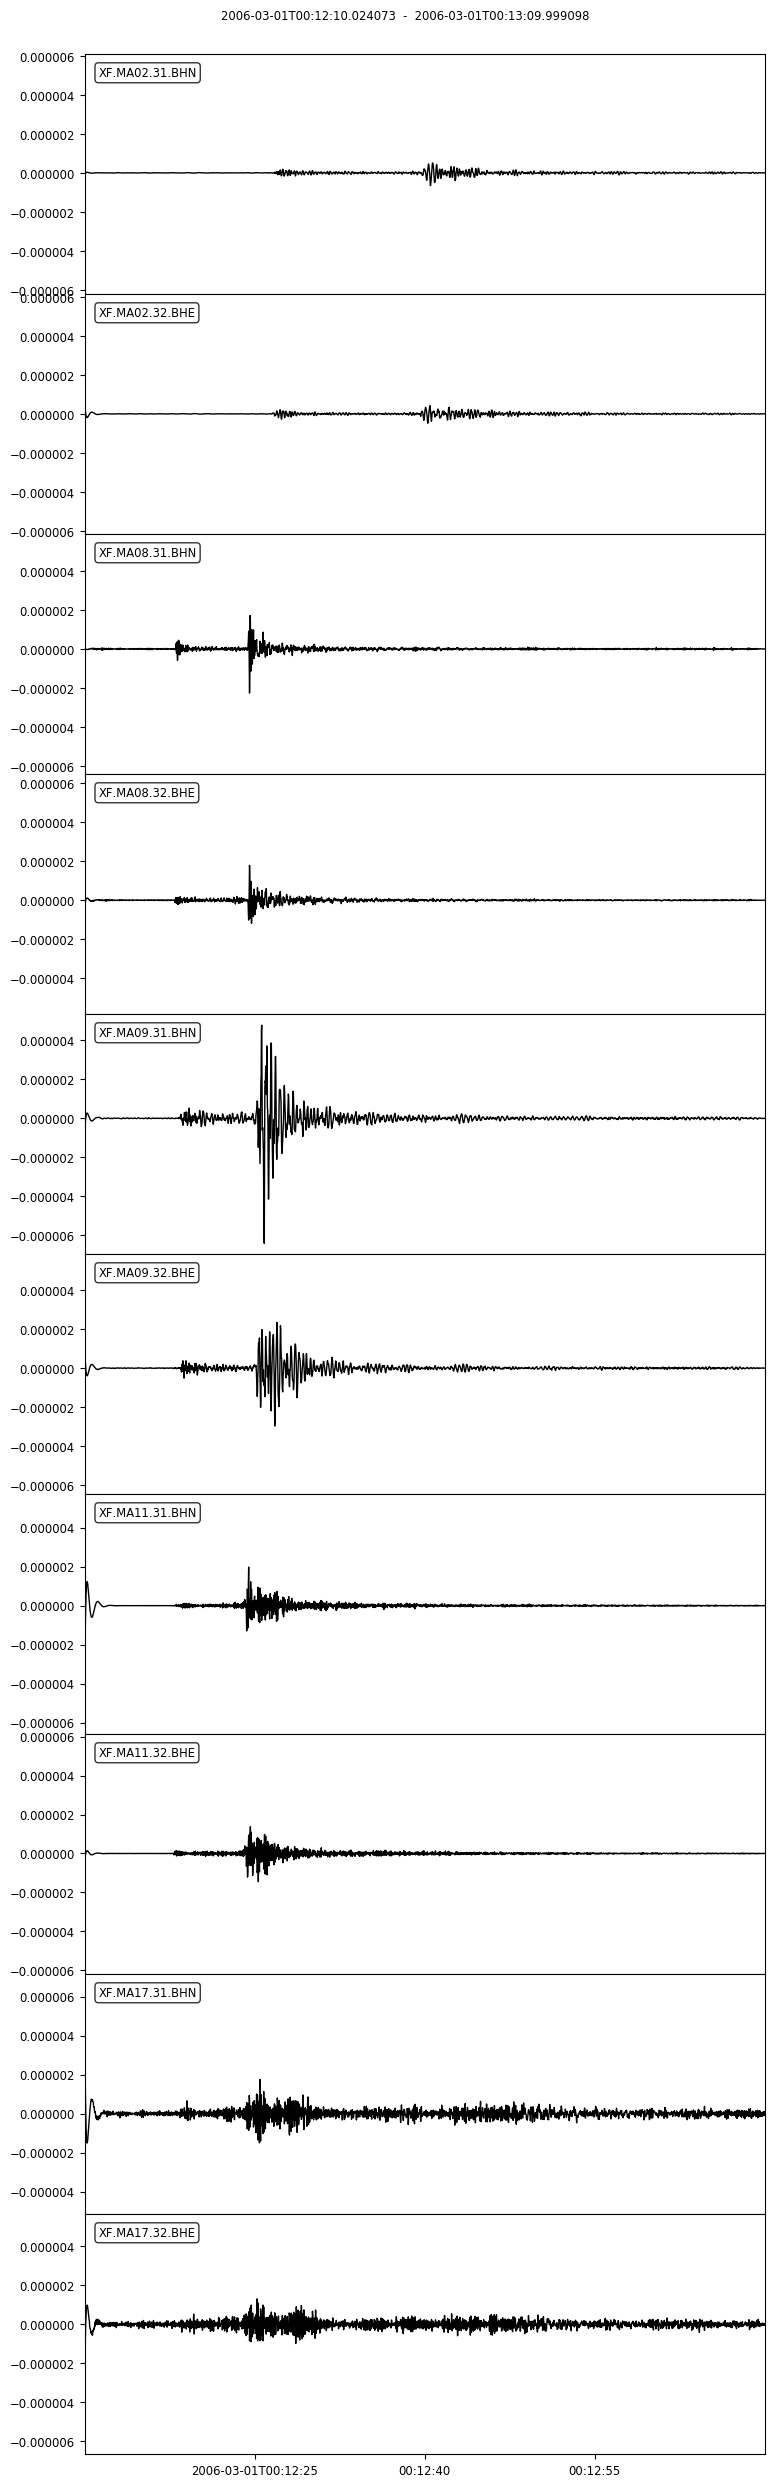

In [35]:
cop3.plot()

In [36]:
cop3[0].trim(t3+59,t3+60)
cop3[1].trim(t3+59,t3+60)

cop3[2].trim(t3+28.7,t3+29.7)
cop3[3].trim(t3+28.7,t3+29.7)

cop3[4].trim(t3+30.1,t3+31.1)
cop3[5].trim(t3+30.1,t3+31.1)

cop3[6].trim(t3+28,t3+29)
cop3[7].trim(t3+28,t3+29)

cop3[8].trim(t3+28,t3+29)
cop3[9].trim(t3+28,t3+29)

XF.MA17.32.BHE | 2006-03-01T00:12:37.999073Z - 2006-03-01T00:12:38.999073Z | 40.0 Hz, 41 samples

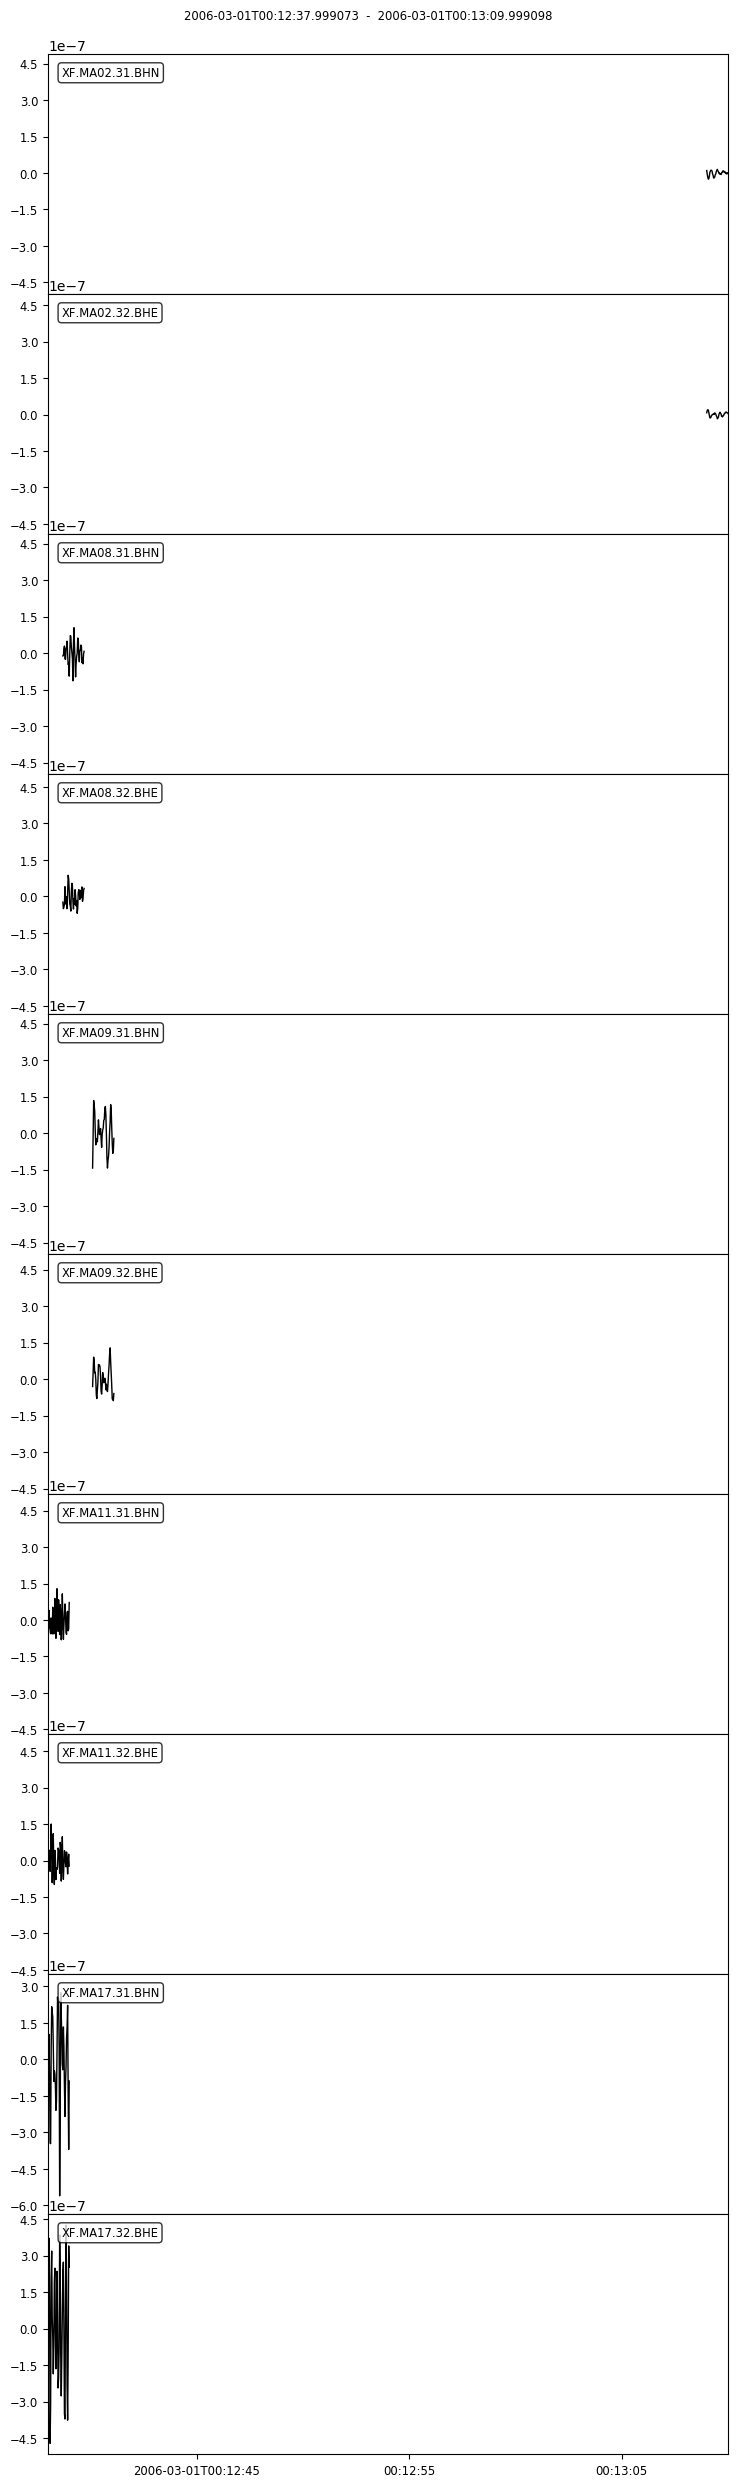

In [37]:
cop3.plot()

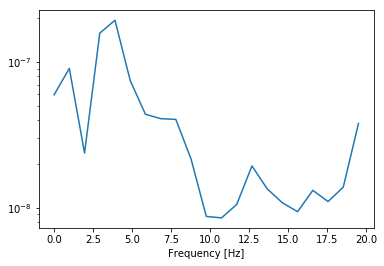

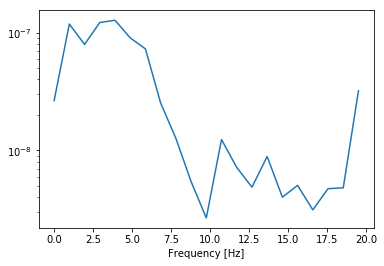

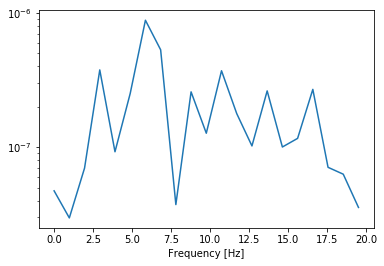

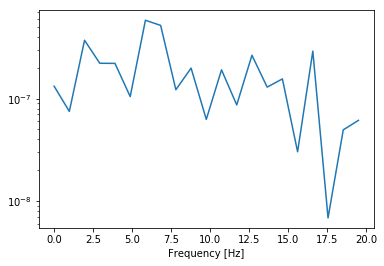

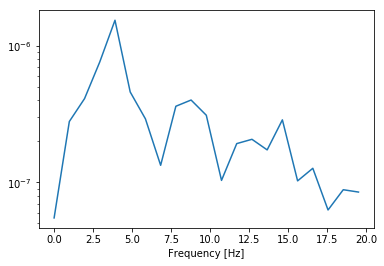

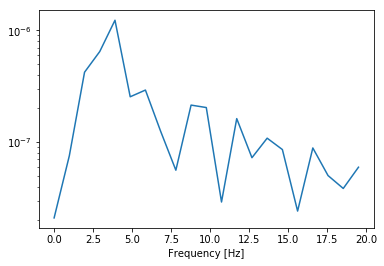

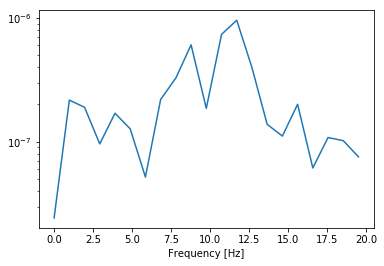

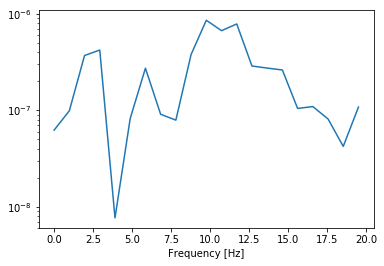

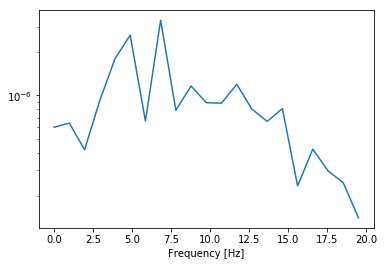

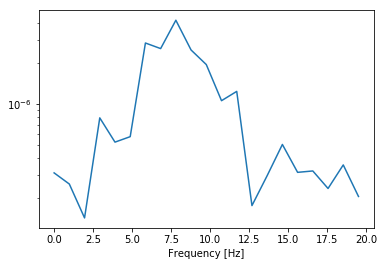

In [38]:
for tr in cop3:
    D3=np.fft.rfft(tr.data)
    freqs3 = np.fft.rfftfreq(tr.stats.npts, d=tr.stats.delta)
    
    plt.plot(freqs3, np.abs(D3))
    plt.xlabel("Frequency [Hz]")
    plt.yscale('log')
    plt.show()

#### Evento 4

In [39]:
#EVENTO 4
st4=cli.get_waveforms("XF","MA02,MA08,MA09,MA11,MA17","**","BHE,BHN", t4, t4+120, attach_response=True)

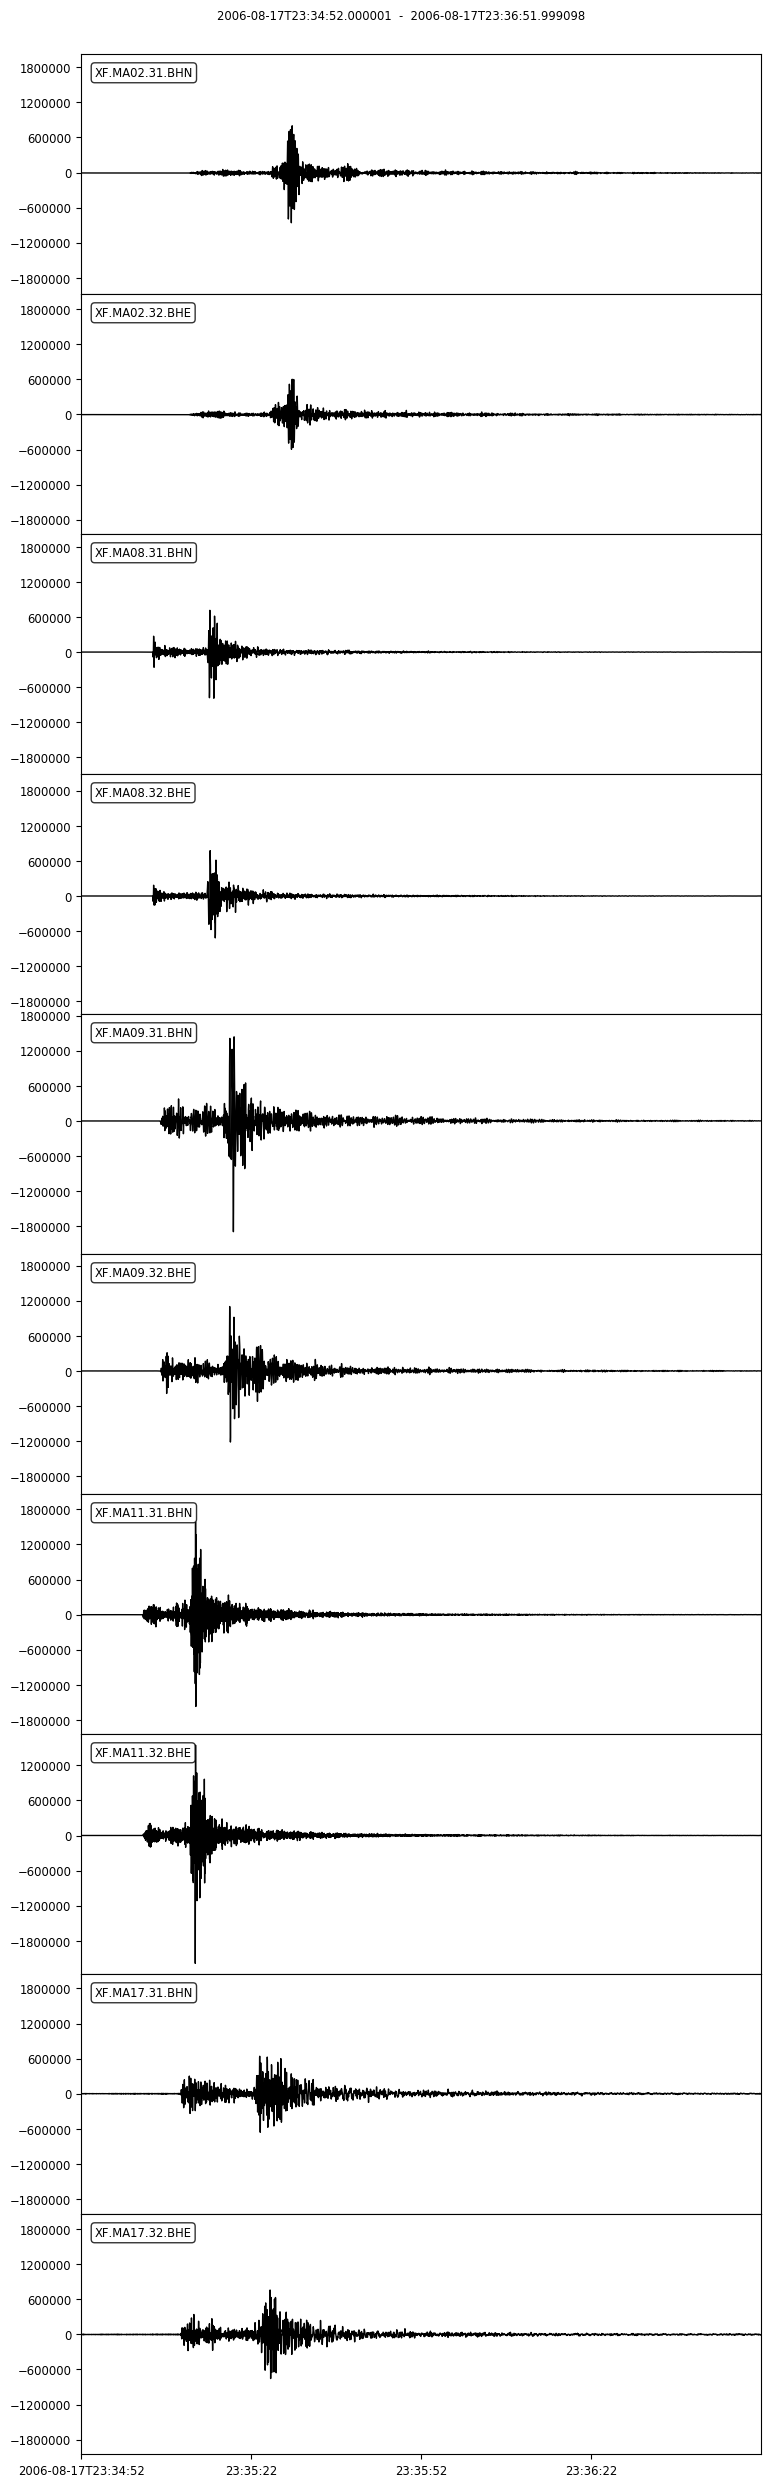

In [40]:
st4.plot()

In [41]:
cop4=st4.copy()
cop4.remove_response(inventory=inv, zero_mean=True, output='DISP')
cop4.filter('bandpass',freqmin=1, freqmax=20)

/home/juan/anaconda3/lib/python3.6/site-packages/obspy/signal/filter.py:67: UserWarning: Selected high corner frequency (20) of bandpass is at or above Nyquist (20.0). Applying a high-pass instead.
  warnings.warn(msg)


10 Trace(s) in Stream:
XF.MA02.31.BHN | 2006-08-17T23:34:52.000003Z - 2006-08-17T23:36:51.975003Z | 40.0 Hz, 4800 samples
XF.MA02.32.BHE | 2006-08-17T23:34:52.000003Z - 2006-08-17T23:36:51.975003Z | 40.0 Hz, 4800 samples
XF.MA08.31.BHN | 2006-08-17T23:34:52.000001Z - 2006-08-17T23:36:51.975001Z | 40.0 Hz, 4800 samples
XF.MA08.32.BHE | 2006-08-17T23:34:52.000001Z - 2006-08-17T23:36:51.975001Z | 40.0 Hz, 4800 samples
XF.MA09.31.BHN | 2006-08-17T23:34:52.024098Z - 2006-08-17T23:36:51.999098Z | 40.0 Hz, 4800 samples
XF.MA09.32.BHE | 2006-08-17T23:34:52.024098Z - 2006-08-17T23:36:51.999098Z | 40.0 Hz, 4800 samples
XF.MA11.31.BHN | 2006-08-17T23:34:52.000003Z - 2006-08-17T23:36:51.975003Z | 40.0 Hz, 4800 samples
XF.MA11.32.BHE | 2006-08-17T23:34:52.000003Z - 2006-08-17T23:36:51.975003Z | 40.0 Hz, 4800 samples
XF.MA17.31.BHN | 2006-08-17T23:34:52.000001Z - 2006-08-17T23:36:51.975001Z | 40.0 Hz, 4800 samples
XF.MA17.32.BHE | 2006-08-17T23:34:52.000001Z - 2006-08-17T23:36:51.975001Z | 40.0 Hz, 

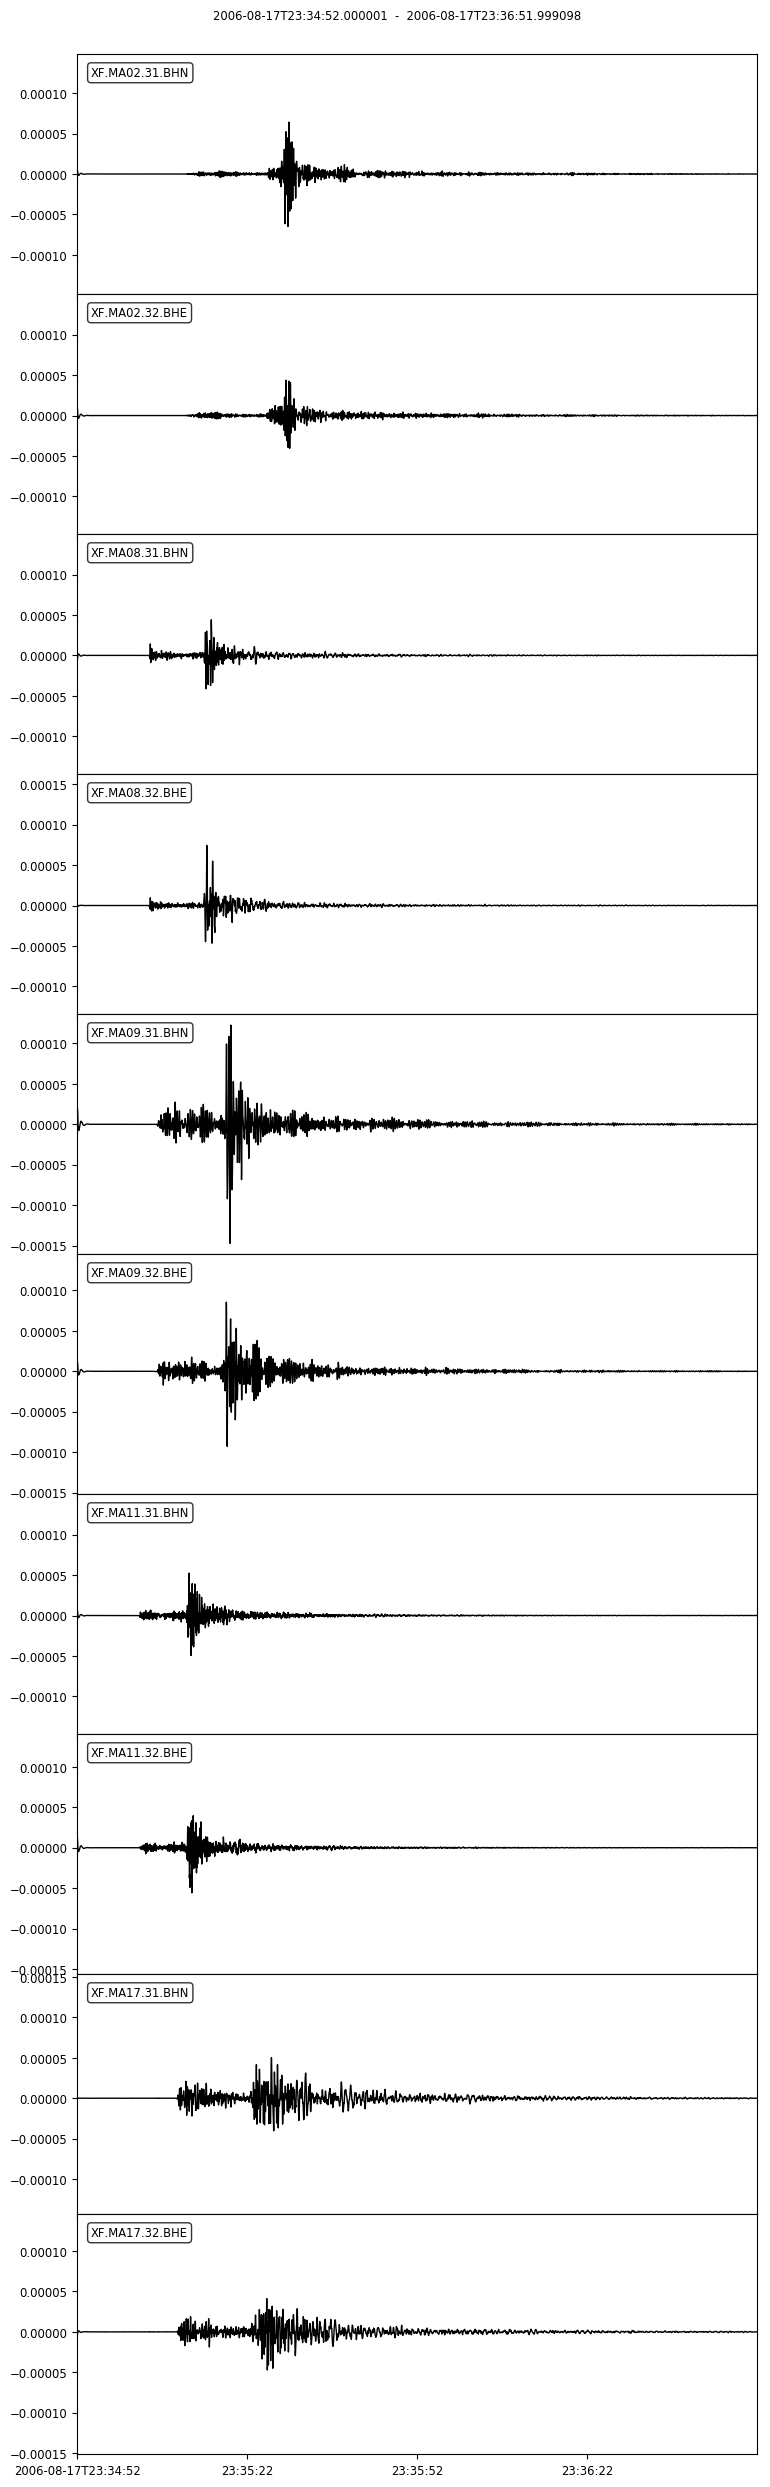

In [42]:
cop4.plot()

In [43]:
cop4[0].trim(t4+33,t4+34)
cop4[1].trim(t4+33,t4+34)

cop4[2].trim(t4+22,t4+23)
cop4[3].trim(t4+22,t4+23)

cop4[4].trim(t4+26,t4+27)
cop4[5].trim(t4+26,t4+27)

cop4[6].trim(t4+20,t4+21)
cop4[7].trim(t4+20,t4+21)

cop4[8].trim(t4+30.5,t4+31.5)
cop4[9].trim(t4+30.5,t4+31.5)

XF.MA17.32.BHE | 2006-08-17T23:35:22.500001Z - 2006-08-17T23:35:23.500001Z | 40.0 Hz, 41 samples

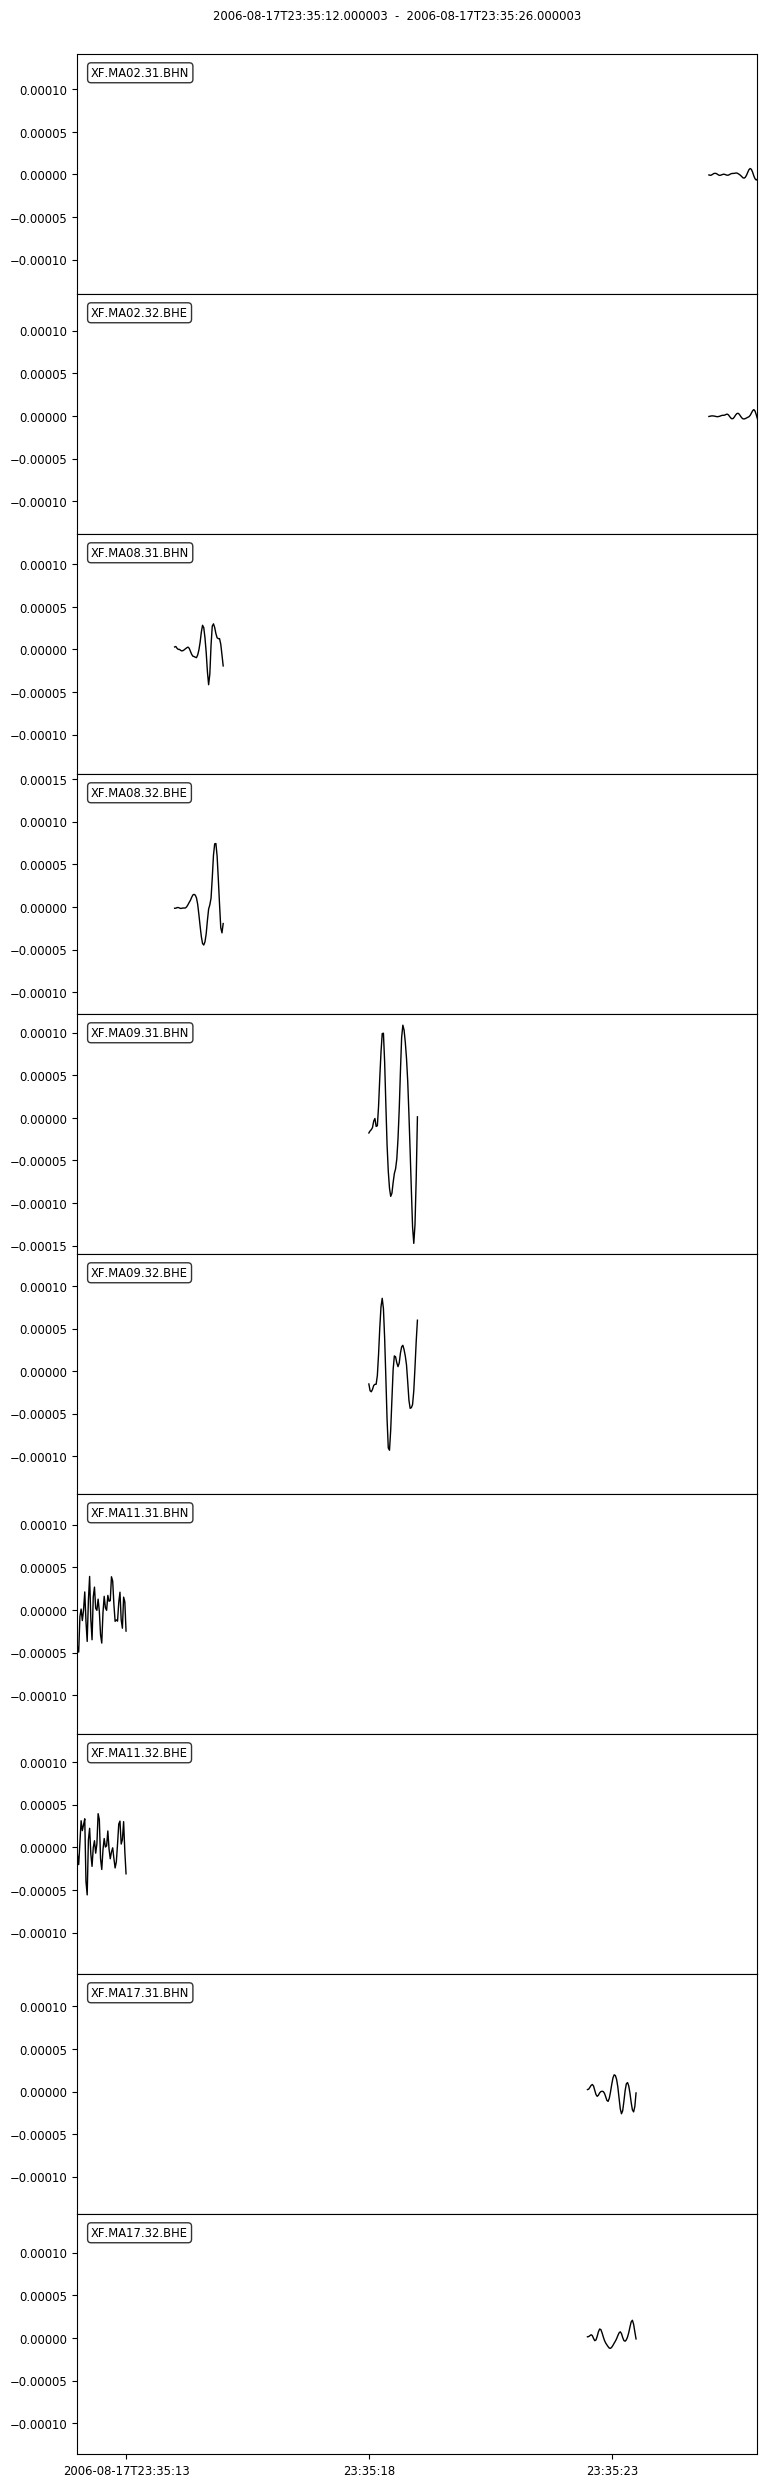

In [44]:
cop4.plot()

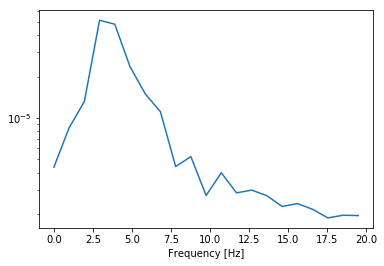

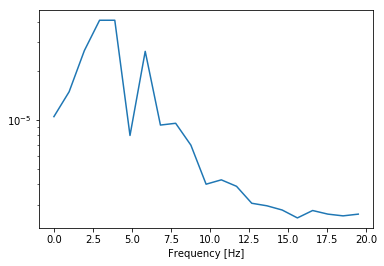

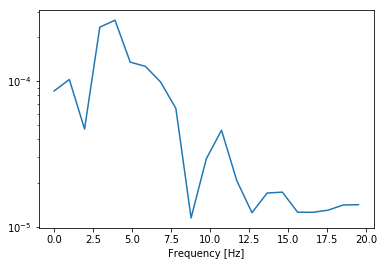

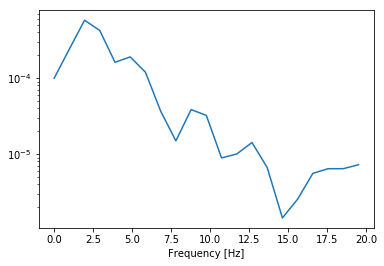

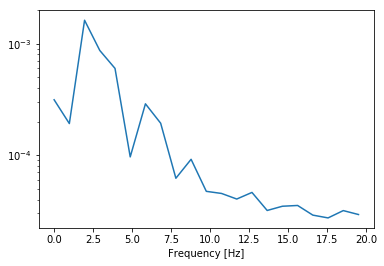

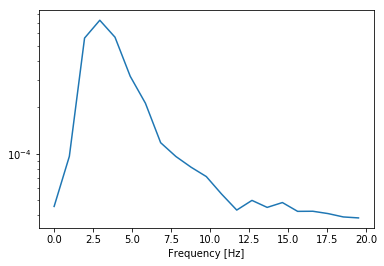

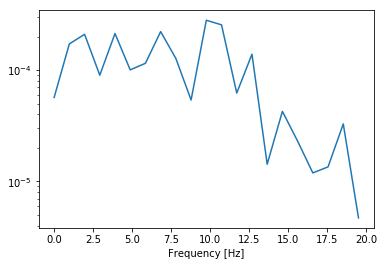

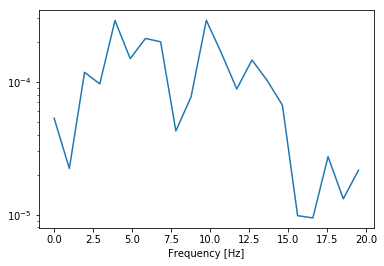

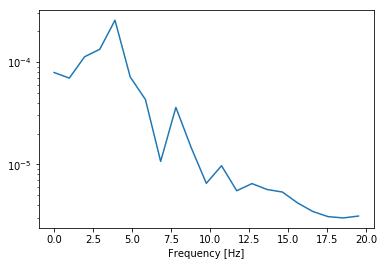

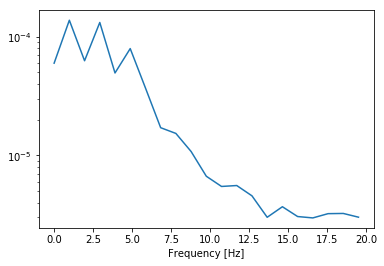

In [45]:
for tr in cop4:
    D4=np.fft.rfft(tr.data)
    freqs4 = np.fft.rfftfreq(tr.stats.npts, d=tr.stats.delta)
    
    plt.plot(freqs4, np.abs(D4))
    plt.xlabel("Frequency [Hz]")
    plt.yscale('log')
    plt.show()

#### Evento 5

In [46]:
#EVENTO 5
st5=cli.get_waveforms("XF","MA02,MA07,MA09,MA11,MA17","**","BHE,BHN", t5, t5+120, attach_response=True)

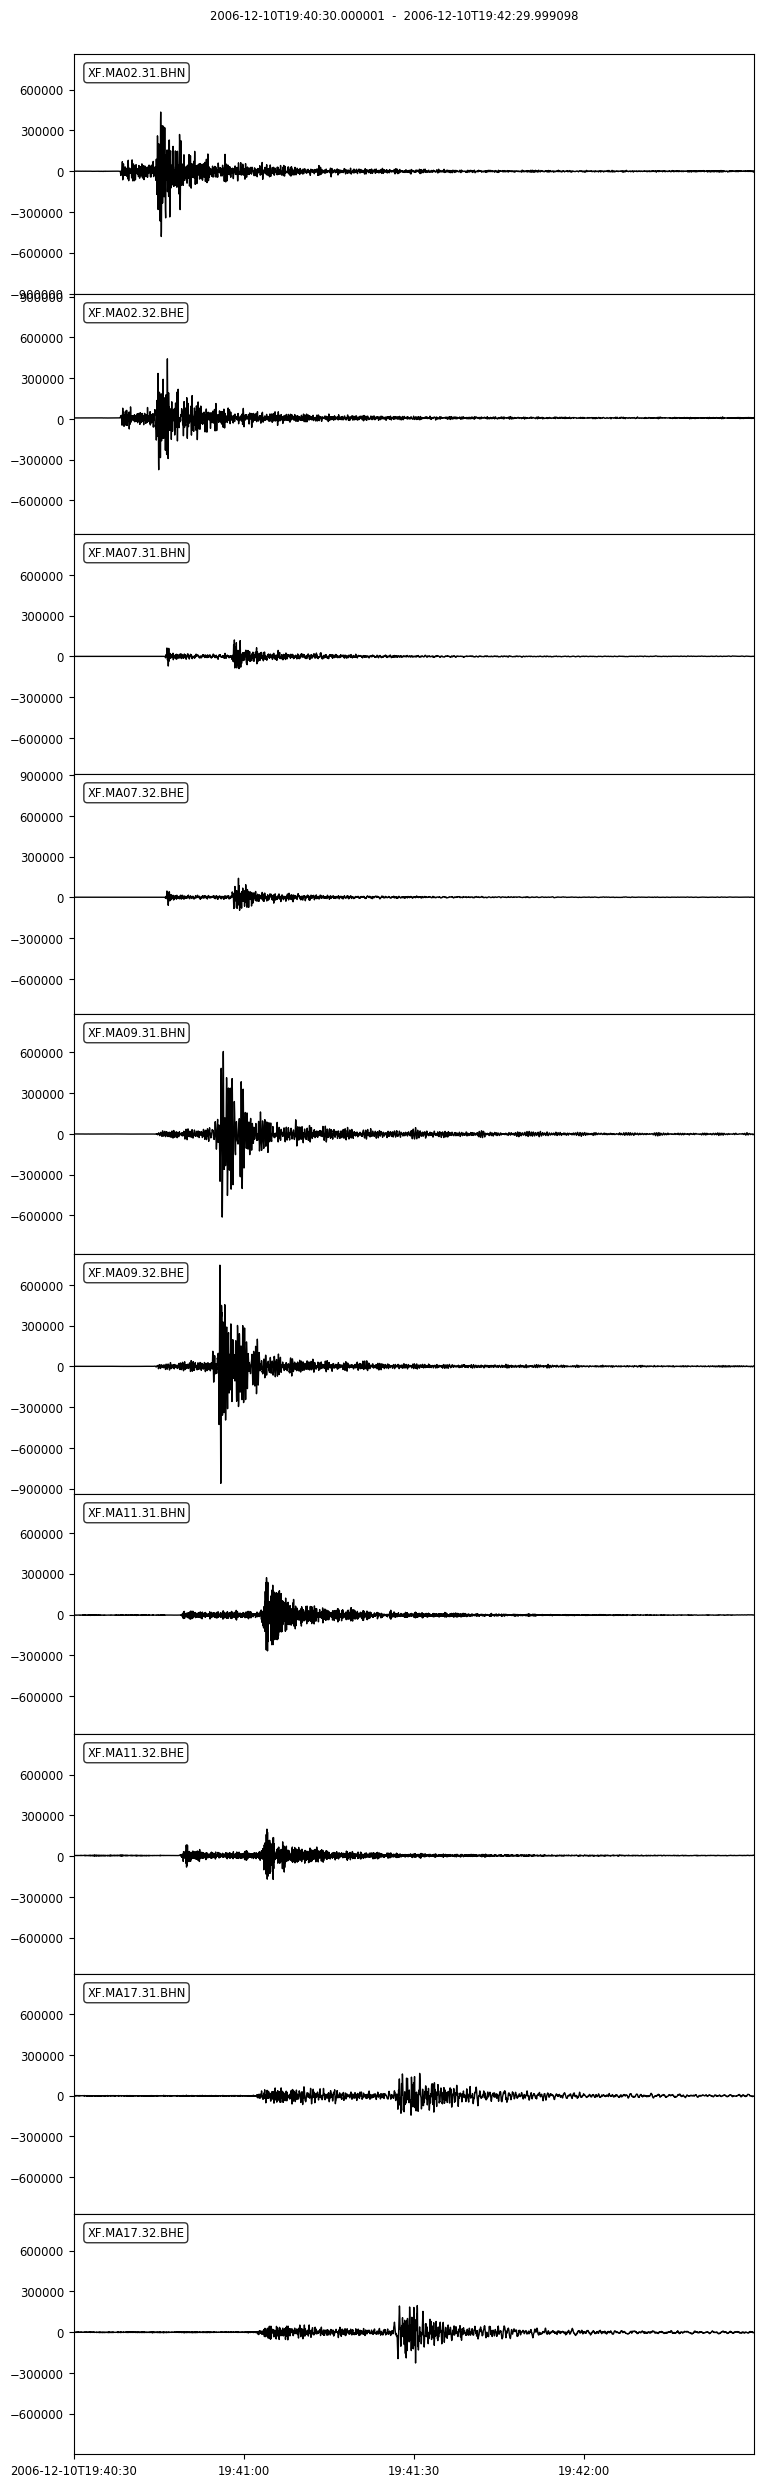

In [47]:
st5.plot()

In [48]:
cop5=st5.copy()
cop5.remove_response(inventory=inv, zero_mean=True, output='DISP')
cop5.filter('bandpass',freqmin=1, freqmax=20)

/home/juan/anaconda3/lib/python3.6/site-packages/obspy/signal/filter.py:67: UserWarning: Selected high corner frequency (20) of bandpass is at or above Nyquist (20.0). Applying a high-pass instead.
  warnings.warn(msg)


10 Trace(s) in Stream:
XF.MA02.31.BHN | 2006-12-10T19:40:30.000001Z - 2006-12-10T19:42:29.975001Z | 40.0 Hz, 4800 samples
XF.MA02.32.BHE | 2006-12-10T19:40:30.000001Z - 2006-12-10T19:42:29.975001Z | 40.0 Hz, 4800 samples
XF.MA07.31.BHN | 2006-12-10T19:40:30.024098Z - 2006-12-10T19:42:29.999098Z | 40.0 Hz, 4800 samples
XF.MA07.32.BHE | 2006-12-10T19:40:30.024098Z - 2006-12-10T19:42:29.999098Z | 40.0 Hz, 4800 samples
XF.MA09.31.BHN | 2006-12-10T19:40:30.000001Z - 2006-12-10T19:42:29.975001Z | 40.0 Hz, 4800 samples
XF.MA09.32.BHE | 2006-12-10T19:40:30.000001Z - 2006-12-10T19:42:29.975001Z | 40.0 Hz, 4800 samples
XF.MA11.31.BHN | 2006-12-10T19:40:30.000001Z - 2006-12-10T19:42:29.975001Z | 40.0 Hz, 4800 samples
XF.MA11.32.BHE | 2006-12-10T19:40:30.000001Z - 2006-12-10T19:42:29.975001Z | 40.0 Hz, 4800 samples
XF.MA17.31.BHN | 2006-12-10T19:40:30.000001Z - 2006-12-10T19:42:29.975001Z | 40.0 Hz, 4800 samples
XF.MA17.32.BHE | 2006-12-10T19:40:30.000001Z - 2006-12-10T19:42:29.975001Z | 40.0 Hz, 

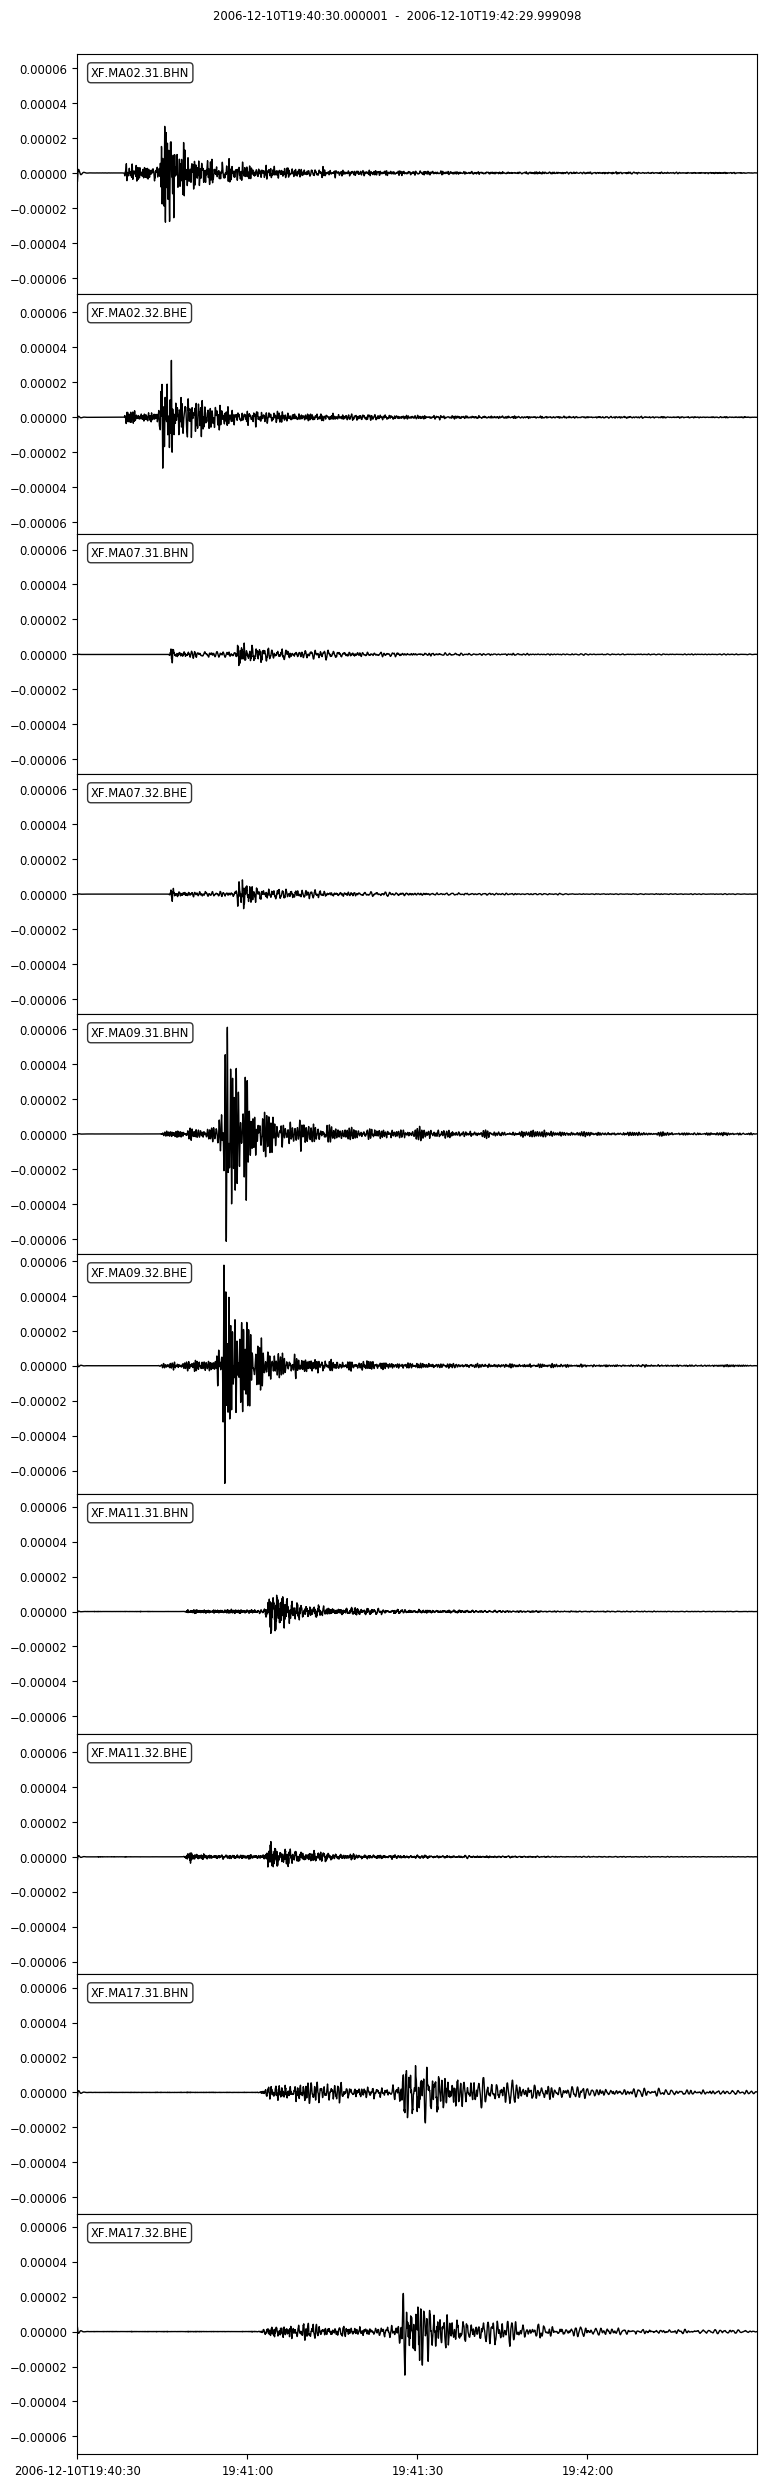

In [49]:
cop5.plot()

In [50]:
cop5[0].trim(t5+14,t5+15)
cop5[1].trim(t5+14,t5+15)

cop5[2].trim(t5+28,t5+29)
cop5[3].trim(t5+28,t5+29)

cop5[4].trim(t5+24.5,t5+25.5)
cop5[5].trim(t5+24.5,t5+25.5)

cop5[6].trim(t5+33,t5+34)
cop5[7].trim(t5+34,t5+35)

cop5[8].trim(t5+56.7,t5+57.7)
cop5[9].trim(t5+56.7,t5+57.7)

XF.MA17.32.BHE | 2006-12-10T19:41:26.700001Z - 2006-12-10T19:41:27.700001Z | 40.0 Hz, 41 samples

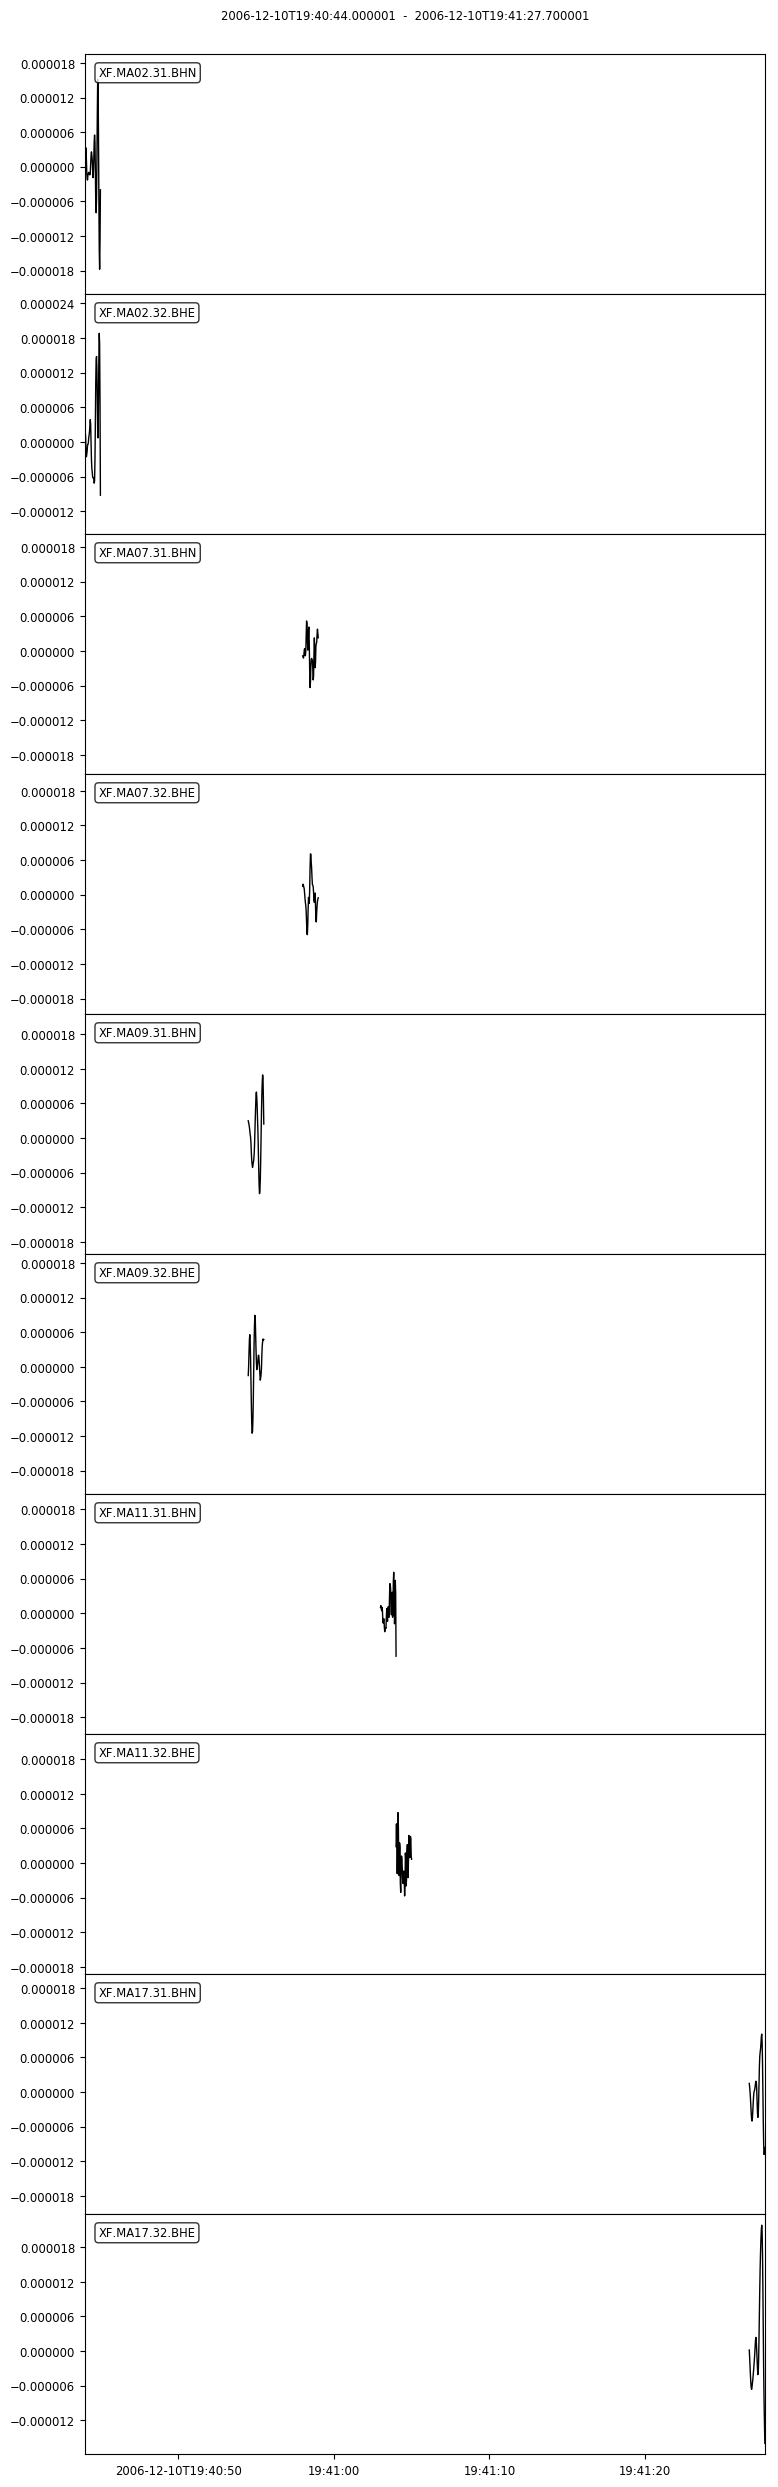

In [51]:
cop5.plot()

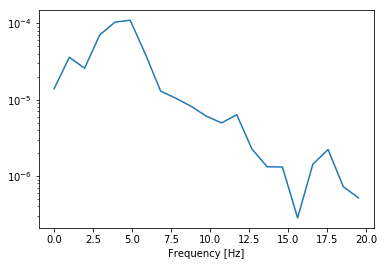

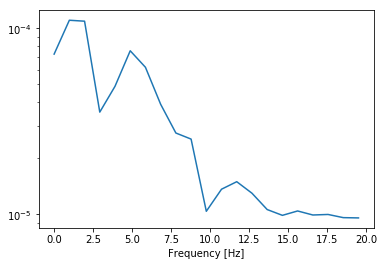

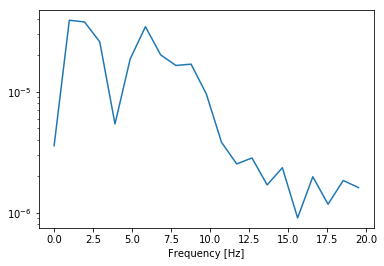

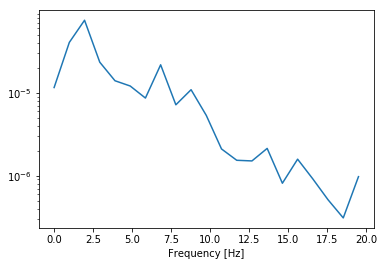

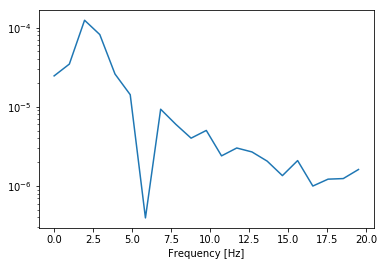

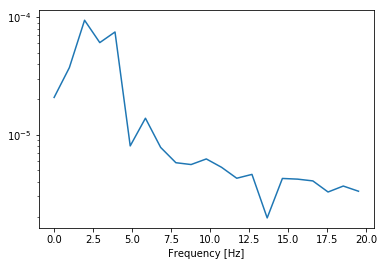

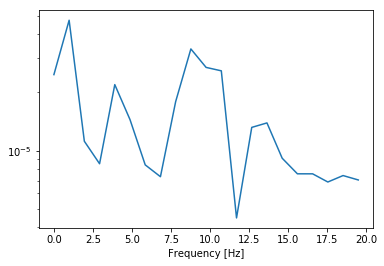

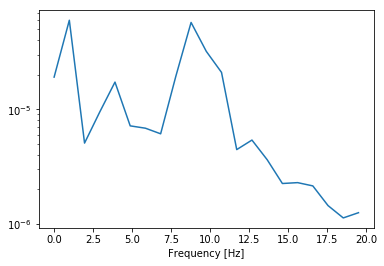

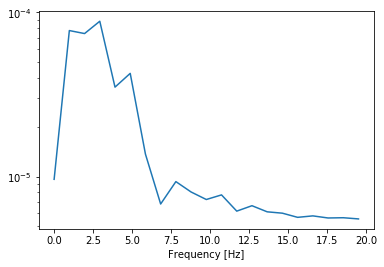

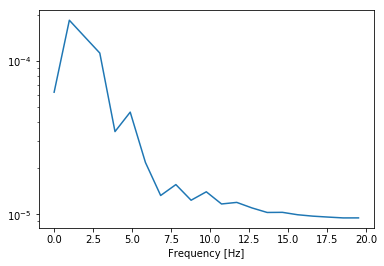

In [52]:
for tr in cop5:
    D5=np.fft.rfft(tr.data)
    freqs5 = np.fft.rfftfreq(tr.stats.npts, d=tr.stats.delta)
    
    plt.plot(freqs5, np.abs(D5))
    plt.xlabel("Frequency [Hz]")
    plt.yscale('log')
    plt.show()

#### Evento 6
Descartado por no reconocerse en las trazas

In [53]:
#EVENTO 6
st6=cli.get_waveforms("XF","MA02,MA07,MA09,MA11,MA17","**","BHE,BHN", t6, t6+120, attach_response=True)

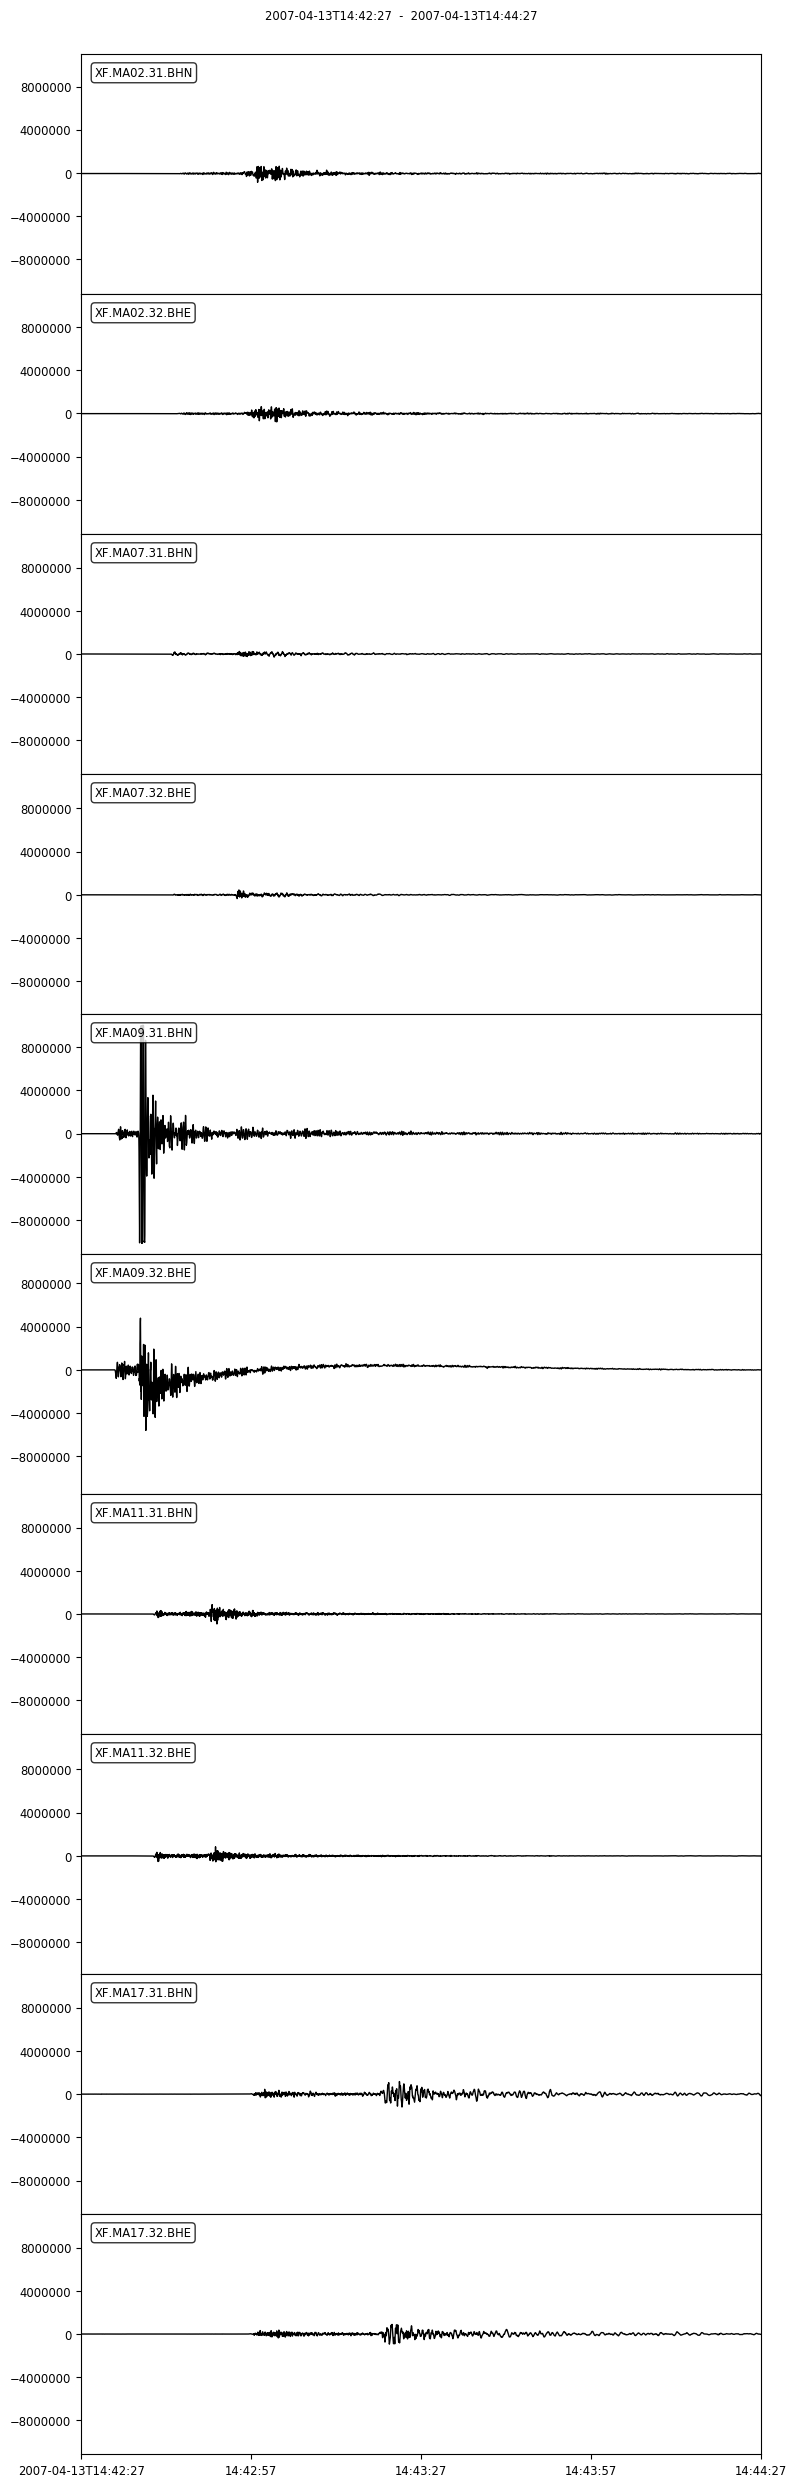

In [54]:
st6.plot()

In [55]:
cop6=st6.copy()
cop6.remove_response(inventory=inv, zero_mean=True, output='DISP')
cop6.filter('bandpass',freqmin=1, freqmax=20)

/home/juan/anaconda3/lib/python3.6/site-packages/obspy/signal/filter.py:67: UserWarning: Selected high corner frequency (20) of bandpass is at or above Nyquist (20.0). Applying a high-pass instead.
  warnings.warn(msg)


10 Trace(s) in Stream:
XF.MA02.31.BHN | 2007-04-13T14:42:27.000001Z - 2007-04-13T14:44:26.975001Z | 40.0 Hz, 4800 samples
XF.MA02.32.BHE | 2007-04-13T14:42:27.000001Z - 2007-04-13T14:44:26.975001Z | 40.0 Hz, 4800 samples
XF.MA07.31.BHN | 2007-04-13T14:42:27.000001Z - 2007-04-13T14:44:26.975001Z | 40.0 Hz, 4800 samples
XF.MA07.32.BHE | 2007-04-13T14:42:27.000001Z - 2007-04-13T14:44:26.975001Z | 40.0 Hz, 4800 samples
XF.MA09.31.BHN | 2007-04-13T14:42:27.000001Z - 2007-04-13T14:44:26.975001Z | 40.0 Hz, 4800 samples
XF.MA09.32.BHE | 2007-04-13T14:42:27.000001Z - 2007-04-13T14:44:26.975001Z | 40.0 Hz, 4800 samples
XF.MA11.31.BHN | 2007-04-13T14:42:27.000000Z - 2007-04-13T14:44:27.000000Z | 40.0 Hz, 4801 samples
XF.MA11.32.BHE | 2007-04-13T14:42:27.000000Z - 2007-04-13T14:44:27.000000Z | 40.0 Hz, 4801 samples
XF.MA17.31.BHN | 2007-04-13T14:42:27.000000Z - 2007-04-13T14:44:27.000000Z | 40.0 Hz, 4801 samples
XF.MA17.32.BHE | 2007-04-13T14:42:27.000000Z - 2007-04-13T14:44:27.000000Z | 40.0 Hz, 

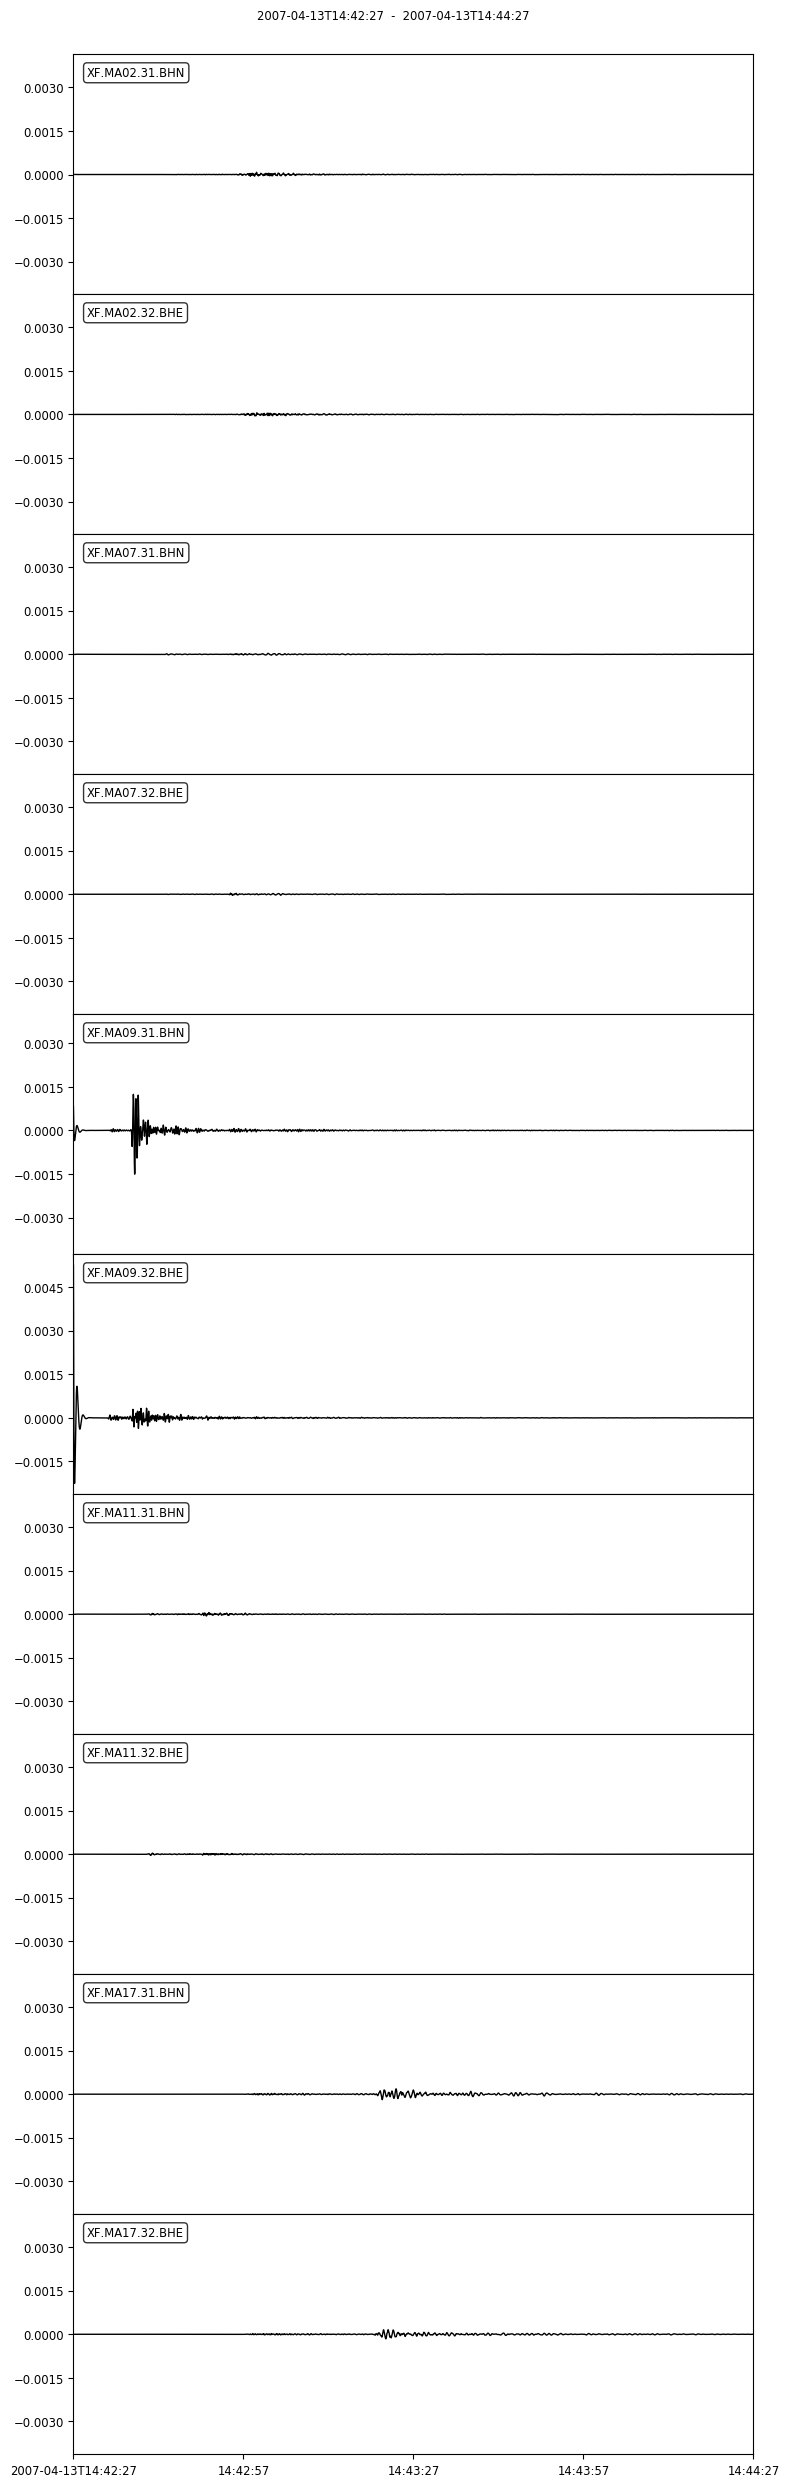

In [56]:
cop6.plot()

In [57]:
cop6[4].trim(t6+10,t6+11)
cop6[5].trim(t6+10,t6+11)

XF.MA09.32.BHE | 2007-04-13T14:42:37.000001Z - 2007-04-13T14:42:38.000001Z | 40.0 Hz, 41 samples

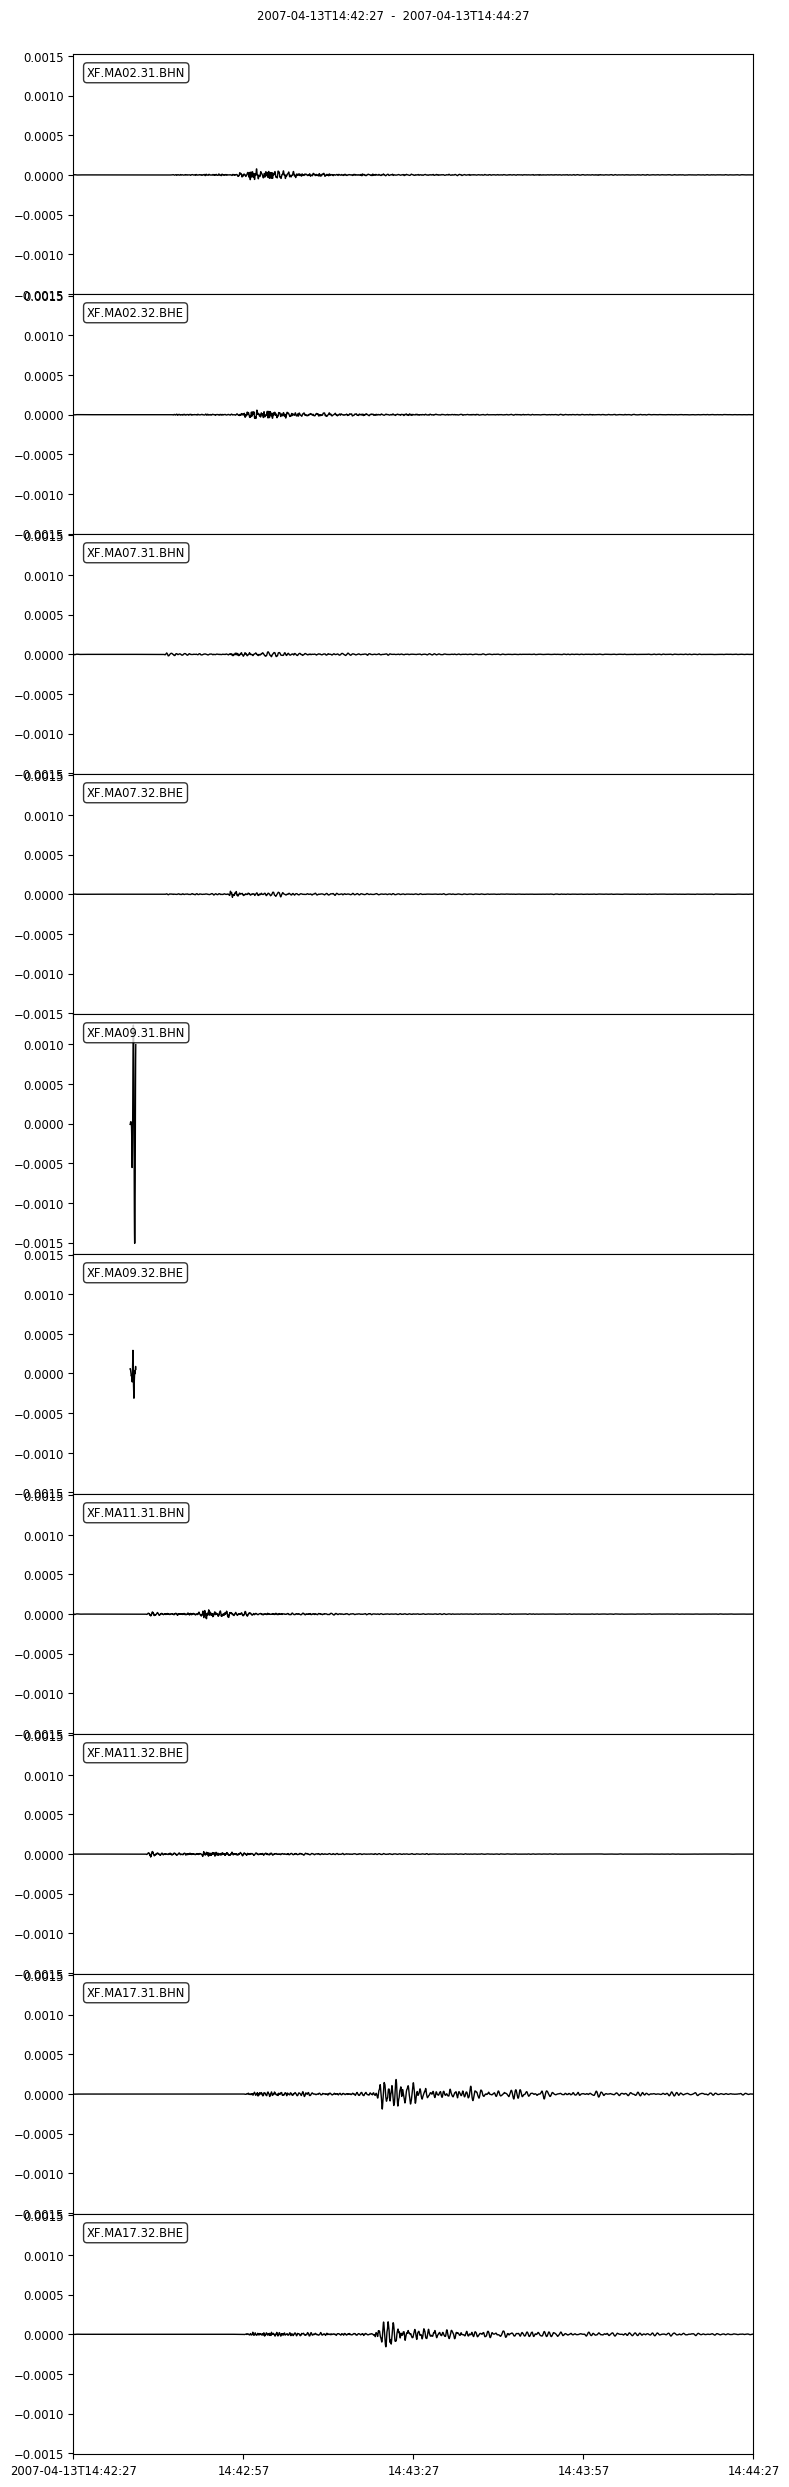

In [58]:
cop6.plot()

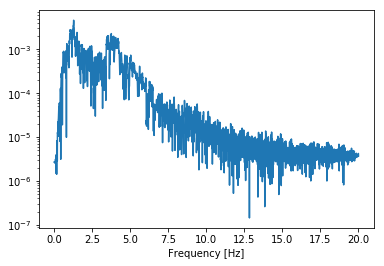

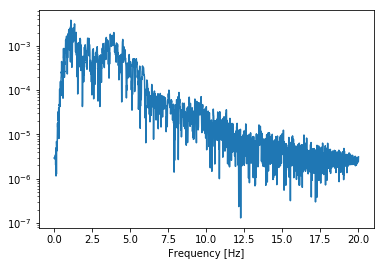

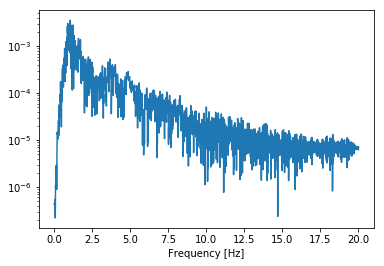

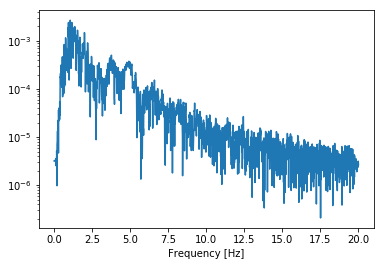

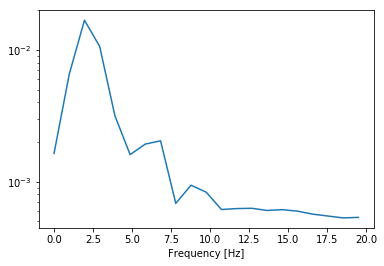

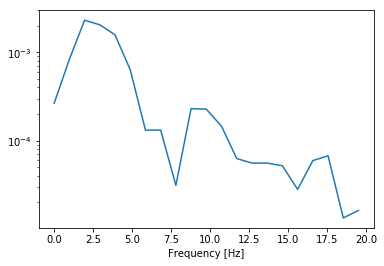

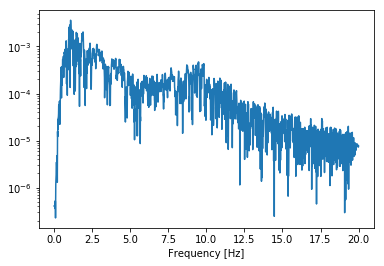

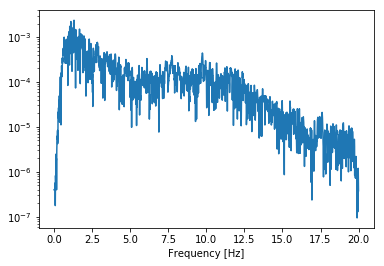

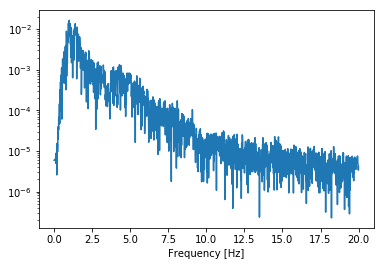

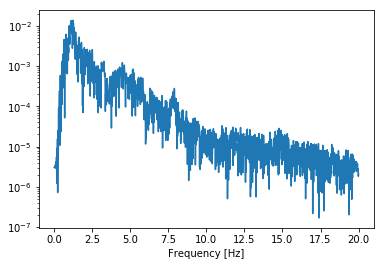

In [59]:
for tr in cop6:
    D6=np.fft.rfft(tr.data)
    freqs6 = np.fft.rfftfreq(tr.stats.npts, d=tr.stats.delta)
    
    plt.plot(freqs6, np.abs(D6))
    plt.xlabel("Frequency [Hz]")
    plt.yscale('log')
    plt.show()

#### Evento 7

In [60]:
#EVENTO 7
st7=cli.get_waveforms("XF","MA02,MA07,MA09,MA11,MA17","**","BHE,BHN", t7, t7+120, attach_response=True)

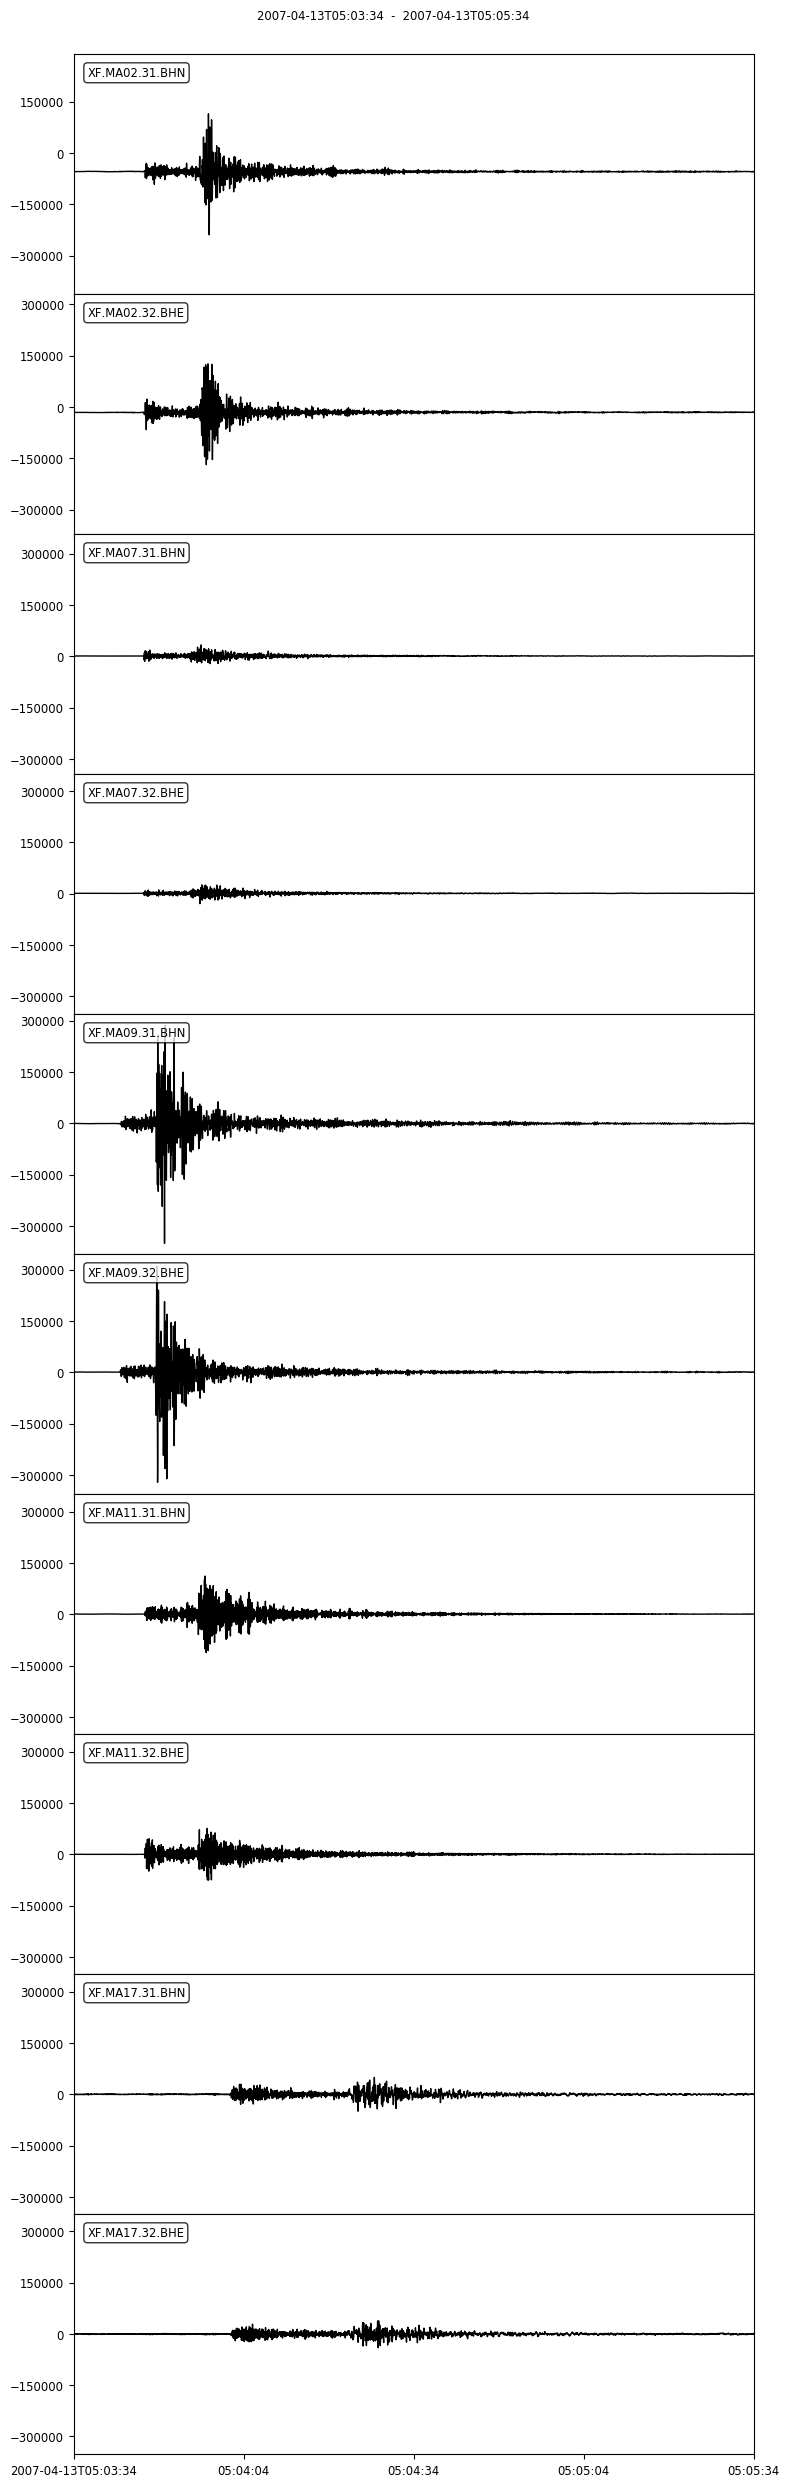

In [61]:
st7.plot()

In [62]:
cop7=st7.copy()
cop7.remove_response(inventory=inv, zero_mean=True, output='DISP')
cop7.filter('bandpass',freqmin=1, freqmax=20)

/home/juan/anaconda3/lib/python3.6/site-packages/obspy/signal/filter.py:67: UserWarning: Selected high corner frequency (20) of bandpass is at or above Nyquist (20.0). Applying a high-pass instead.
  warnings.warn(msg)


10 Trace(s) in Stream:
XF.MA02.31.BHN | 2007-04-13T05:03:34.000000Z - 2007-04-13T05:05:34.000000Z | 40.0 Hz, 4801 samples
XF.MA02.32.BHE | 2007-04-13T05:03:34.000000Z - 2007-04-13T05:05:34.000000Z | 40.0 Hz, 4801 samples
XF.MA07.31.BHN | 2007-04-13T05:03:34.000000Z - 2007-04-13T05:05:34.000000Z | 40.0 Hz, 4801 samples
XF.MA07.32.BHE | 2007-04-13T05:03:34.000000Z - 2007-04-13T05:05:34.000000Z | 40.0 Hz, 4801 samples
XF.MA09.31.BHN | 2007-04-13T05:03:34.024098Z - 2007-04-13T05:05:33.999098Z | 40.0 Hz, 4800 samples
XF.MA09.32.BHE | 2007-04-13T05:03:34.024098Z - 2007-04-13T05:05:33.999098Z | 40.0 Hz, 4800 samples
XF.MA11.31.BHN | 2007-04-13T05:03:34.000000Z - 2007-04-13T05:05:34.000000Z | 40.0 Hz, 4801 samples
XF.MA11.32.BHE | 2007-04-13T05:03:34.000000Z - 2007-04-13T05:05:34.000000Z | 40.0 Hz, 4801 samples
XF.MA17.31.BHN | 2007-04-13T05:03:34.024098Z - 2007-04-13T05:05:33.999098Z | 40.0 Hz, 4800 samples
XF.MA17.32.BHE | 2007-04-13T05:03:34.024098Z - 2007-04-13T05:05:33.999098Z | 40.0 Hz, 

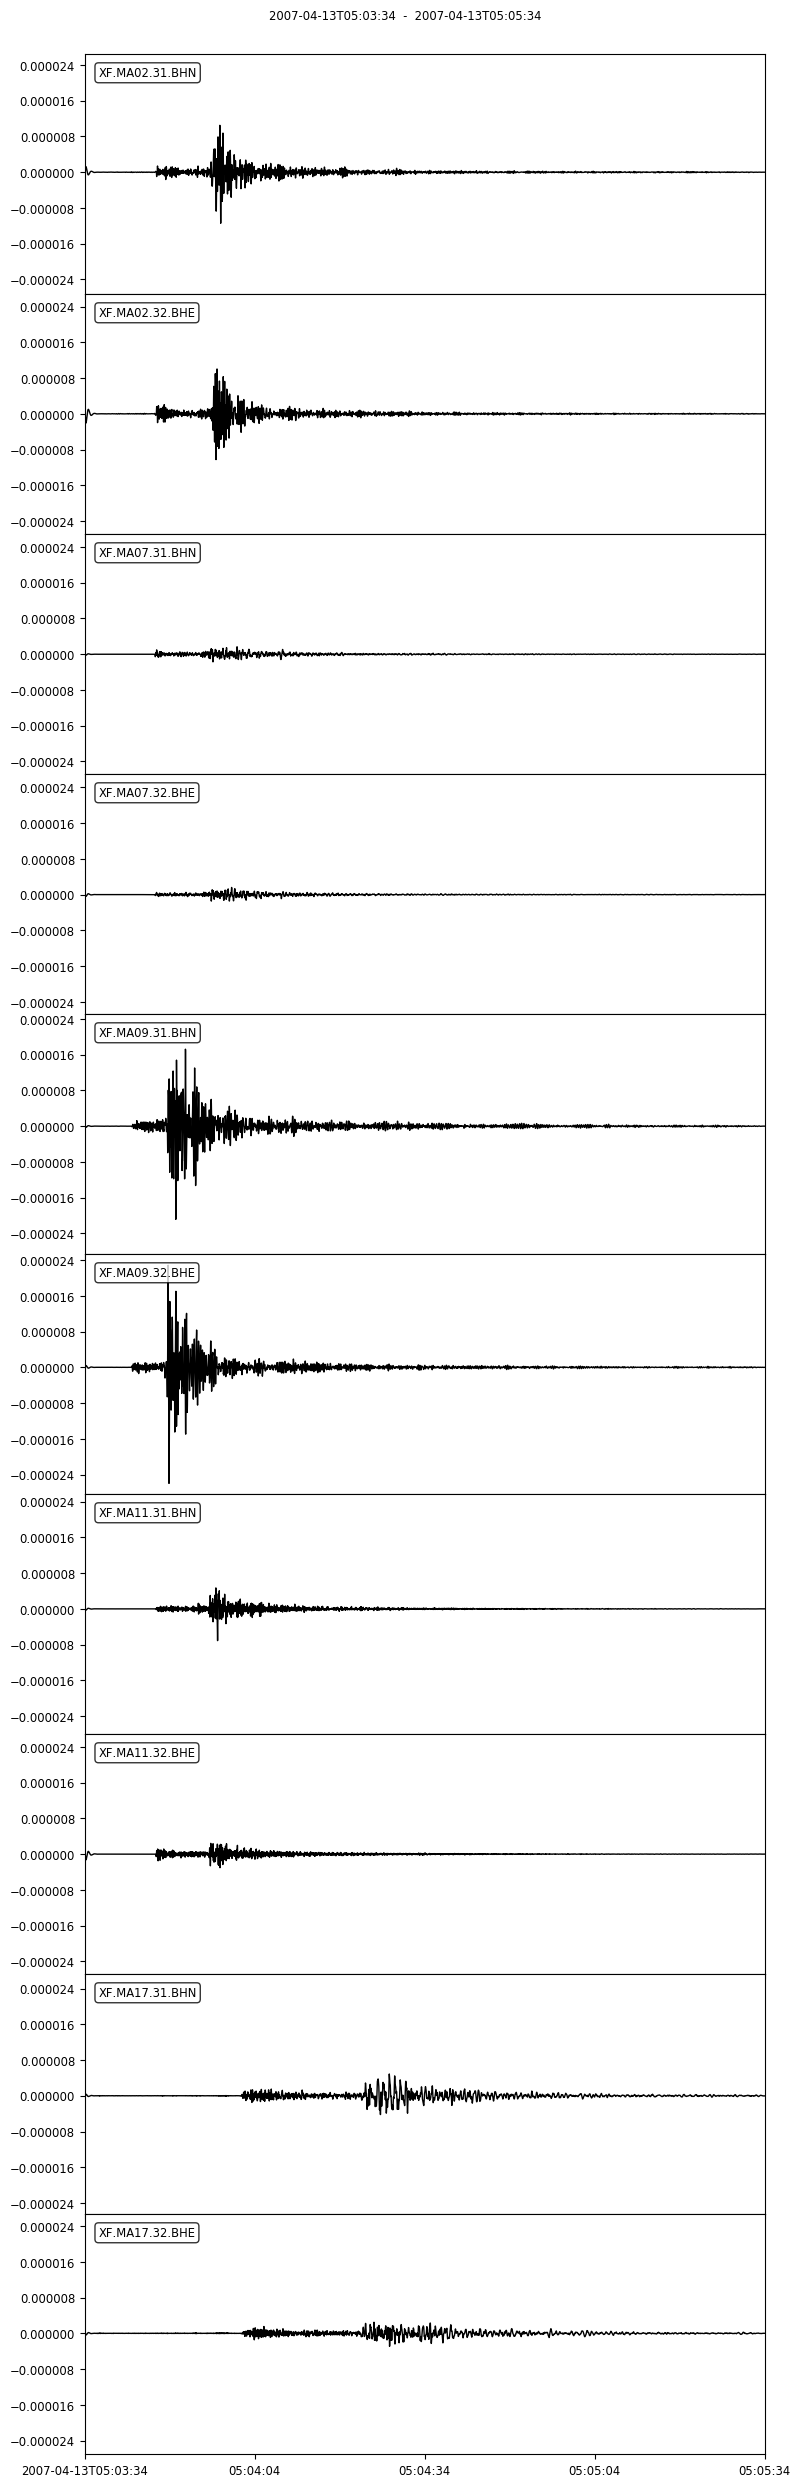

In [63]:
cop7.plot()

In [64]:
cop7[0].trim(t7+21.5,t7+22.5)
cop7[1].trim(t7+21.5,t7+22.5)

cop7[2].trim(t7+20,t7+21)
cop7[3].trim(t7+20,t7+21)

cop7[4].trim(t7+14,t7+15)
cop7[5].trim(t7+14,t7+15)

cop7[6].trim(t7+21.5,t7+22.5)
cop7[7].trim(t7+21.5,t7+22.5)

cop7[8].trim(t7+49,t7+50)
cop7[9].trim(t7+49,t7+50)

XF.MA17.32.BHE | 2007-04-13T05:04:22.999098Z - 2007-04-13T05:04:23.999098Z | 40.0 Hz, 41 samples

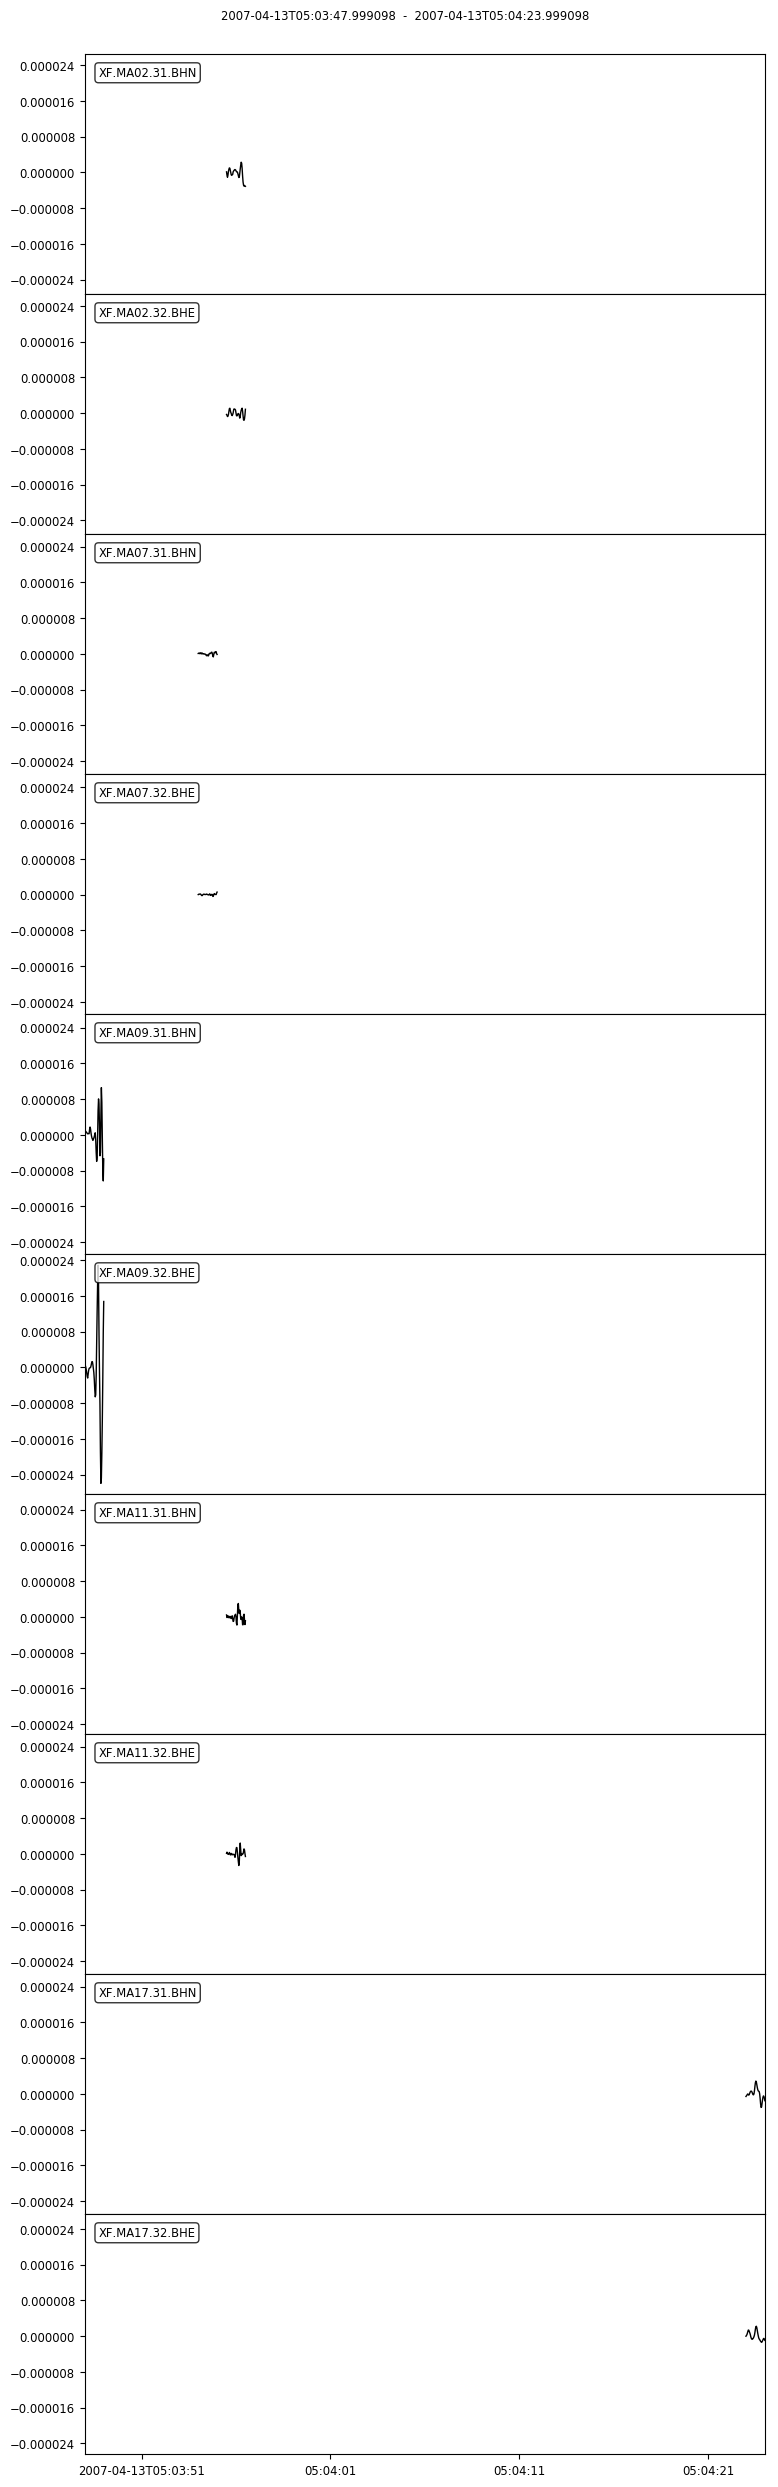

In [65]:
cop7.plot()

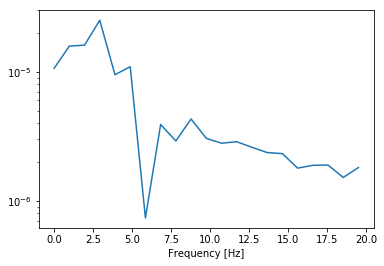

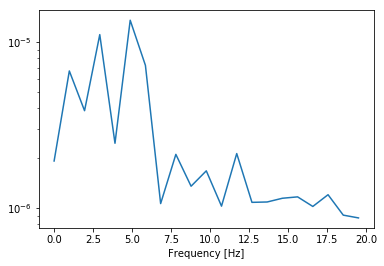

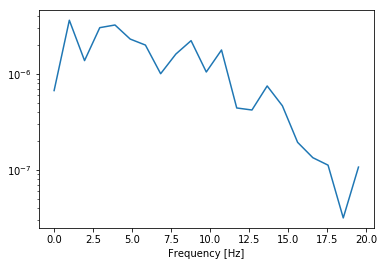

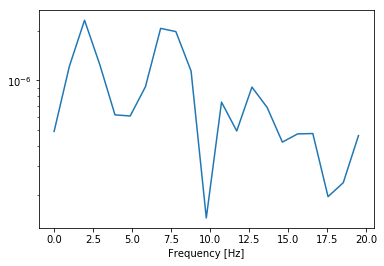

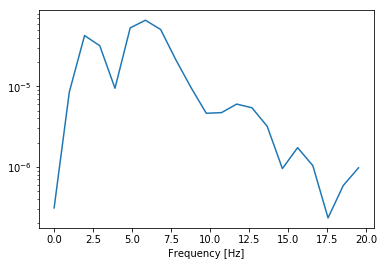

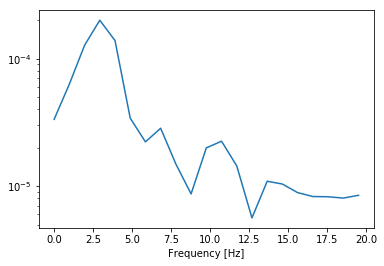

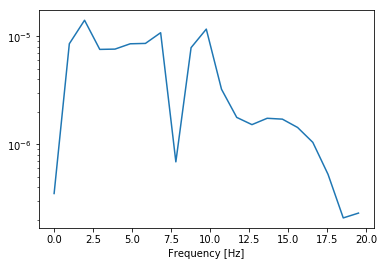

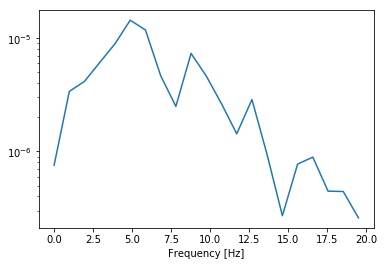

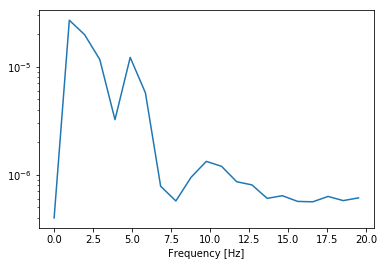

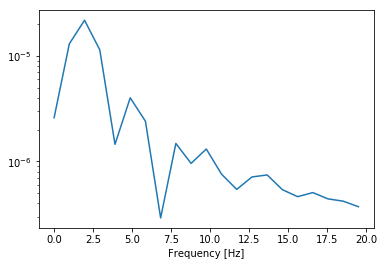

In [66]:
for tr in cop7:
    D7=np.fft.rfft(tr.data)
    freqs7 = np.fft.rfftfreq(tr.stats.npts, d=tr.stats.delta)
    
    plt.plot(freqs7, np.abs(D7))
    plt.xlabel("Frequency [Hz]")
    plt.yscale('log')
    plt.show()

#### Evento 8

In [67]:
#EVENTO 8
st8=cli.get_waveforms("XF","MA02,MA07,MA09,MA11,MA17","**","BHE,BHN", t8, t8+120, attach_response=True)

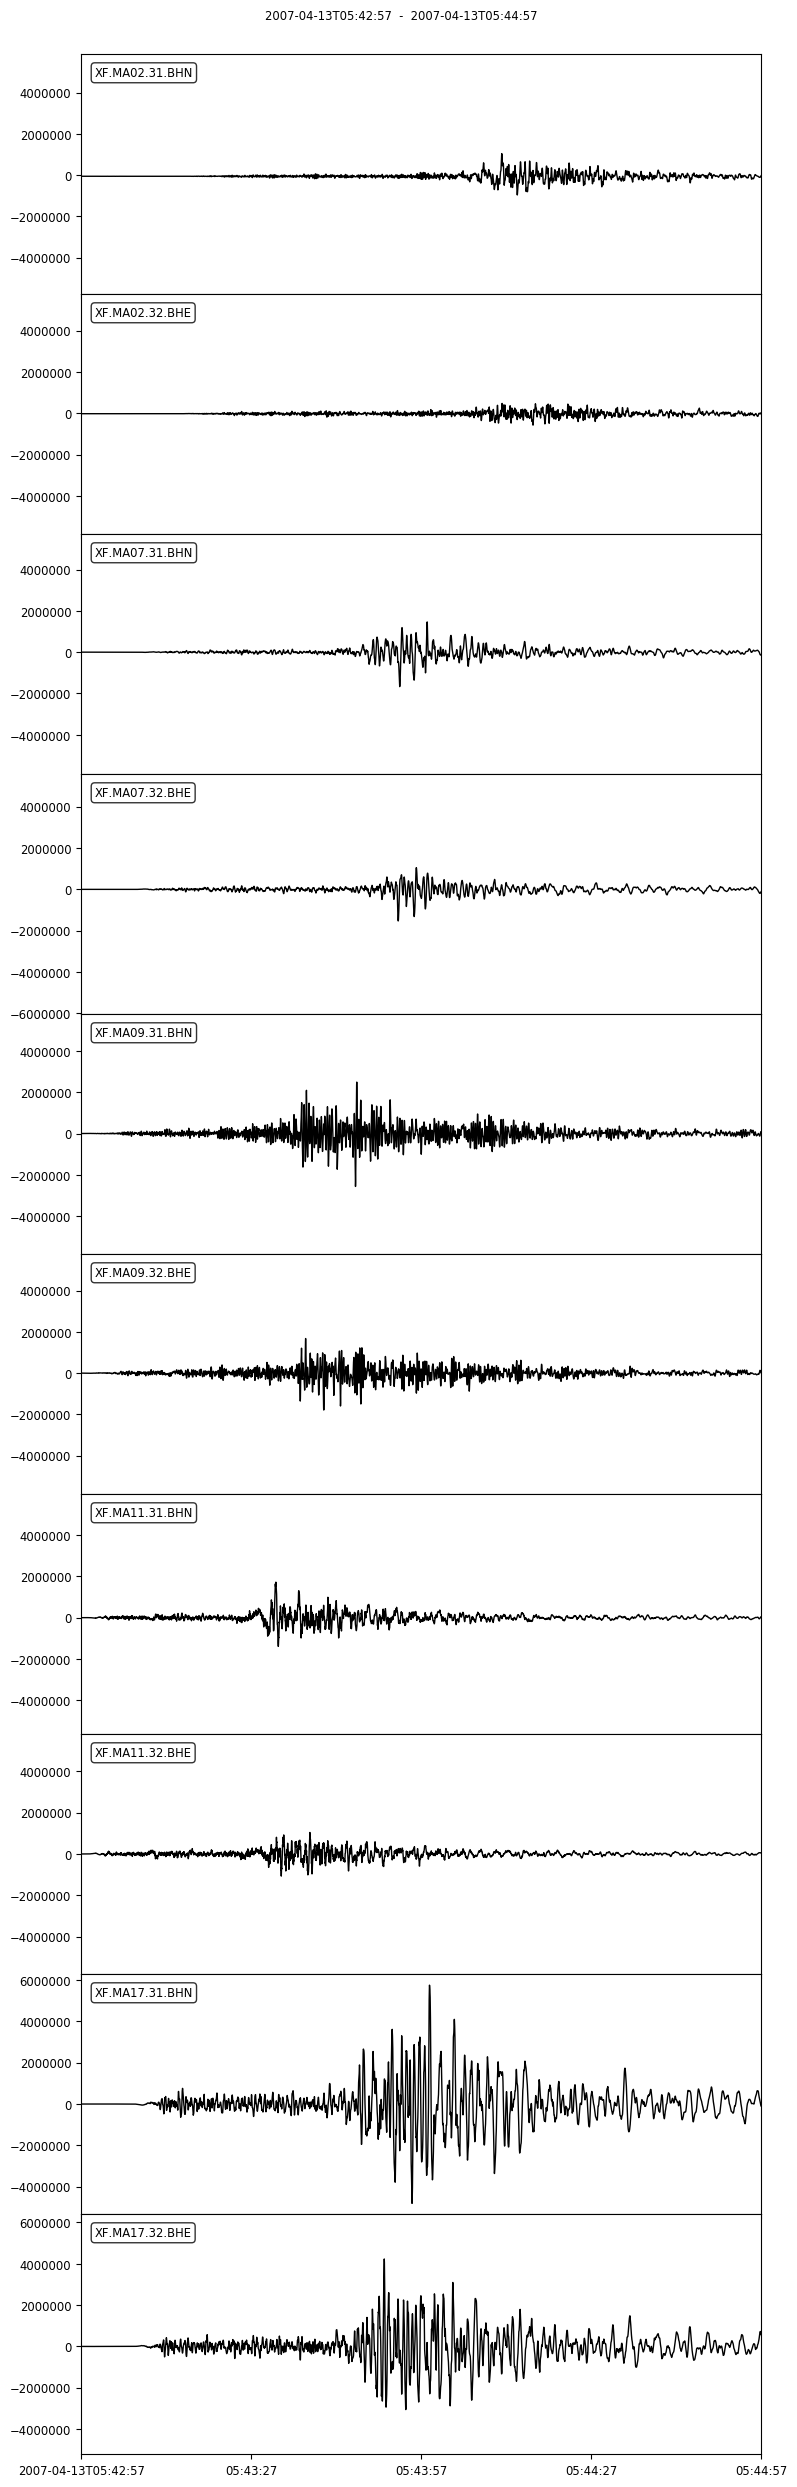

In [68]:
st8.plot()

In [69]:
cop8=st8.copy()
cop8.remove_response(inventory=inv, zero_mean=True, output='DISP')
cop8.filter('bandpass',freqmin=1, freqmax=20)

/home/juan/anaconda3/lib/python3.6/site-packages/obspy/signal/filter.py:67: UserWarning: Selected high corner frequency (20) of bandpass is at or above Nyquist (20.0). Applying a high-pass instead.
  warnings.warn(msg)


10 Trace(s) in Stream:
XF.MA02.31.BHN | 2007-04-13T05:42:57.000000Z - 2007-04-13T05:44:57.000000Z | 40.0 Hz, 4801 samples
XF.MA02.32.BHE | 2007-04-13T05:42:57.000000Z - 2007-04-13T05:44:57.000000Z | 40.0 Hz, 4801 samples
XF.MA07.31.BHN | 2007-04-13T05:42:57.000000Z - 2007-04-13T05:44:57.000000Z | 40.0 Hz, 4801 samples
XF.MA07.32.BHE | 2007-04-13T05:42:57.000000Z - 2007-04-13T05:44:57.000000Z | 40.0 Hz, 4801 samples
XF.MA09.31.BHN | 2007-04-13T05:42:57.024098Z - 2007-04-13T05:44:56.999098Z | 40.0 Hz, 4800 samples
XF.MA09.32.BHE | 2007-04-13T05:42:57.024098Z - 2007-04-13T05:44:56.999098Z | 40.0 Hz, 4800 samples
XF.MA11.31.BHN | 2007-04-13T05:42:57.000000Z - 2007-04-13T05:44:57.000000Z | 40.0 Hz, 4801 samples
XF.MA11.32.BHE | 2007-04-13T05:42:57.000000Z - 2007-04-13T05:44:57.000000Z | 40.0 Hz, 4801 samples
XF.MA17.31.BHN | 2007-04-13T05:42:57.024098Z - 2007-04-13T05:44:56.999098Z | 40.0 Hz, 4800 samples
XF.MA17.32.BHE | 2007-04-13T05:42:57.024098Z - 2007-04-13T05:44:56.999098Z | 40.0 Hz, 

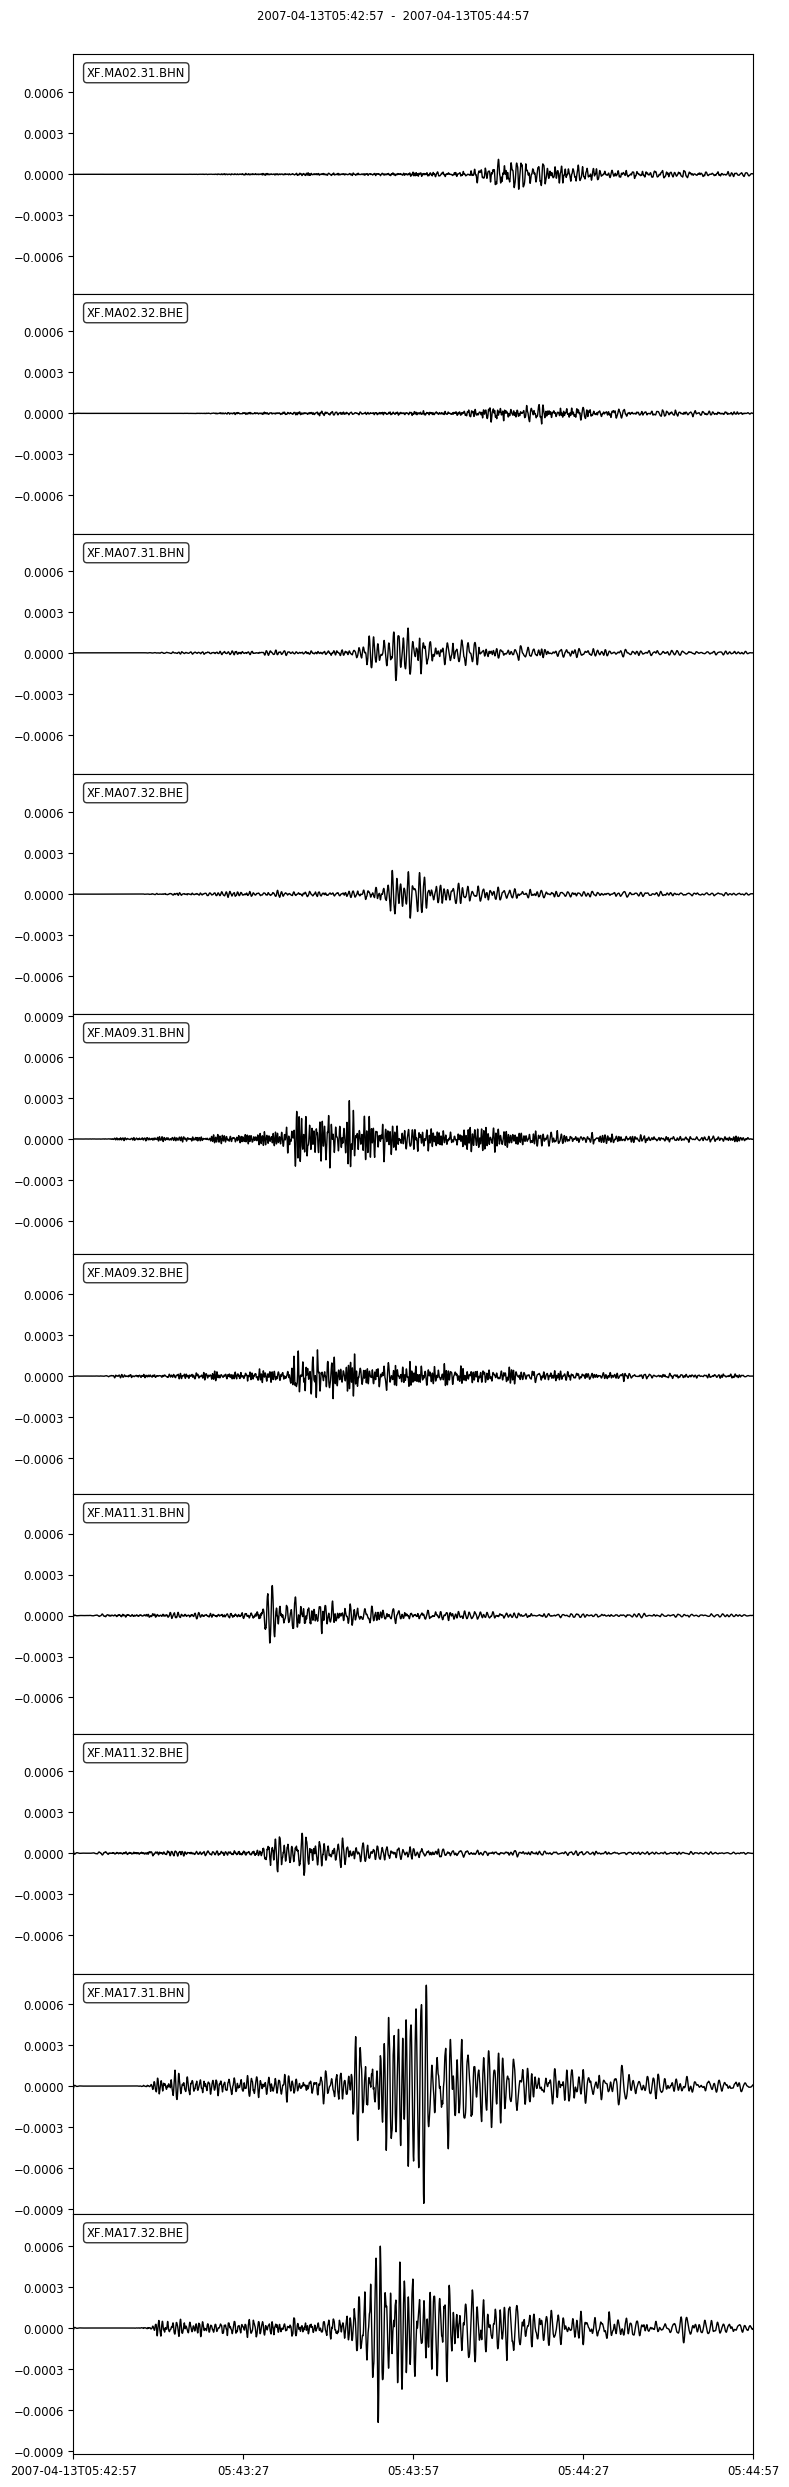

In [70]:
cop8.plot()

In [71]:
cop8[0].trim(t8+72.5,t8+73.5)
cop8[1].trim(t8+72.5,t8+73.5)

cop8[2].trim(t8+49,t8+50)
cop8[3].trim(t8+49,t8+50)

cop8[4].trim(t8+38.5,t8+39.5)
cop8[5].trim(t8+38.5,t8+39.5)

cop8[6].trim(t8+33,t8+34)
cop8[7].trim(t8+33,t8+34)

cop8[8].trim(t8+47.5,t8+48.5)
cop8[9].trim(t8+47.5,t8+48.5)


XF.MA17.32.BHE | 2007-04-13T05:43:44.499098Z - 2007-04-13T05:43:45.499098Z | 40.0 Hz, 41 samples

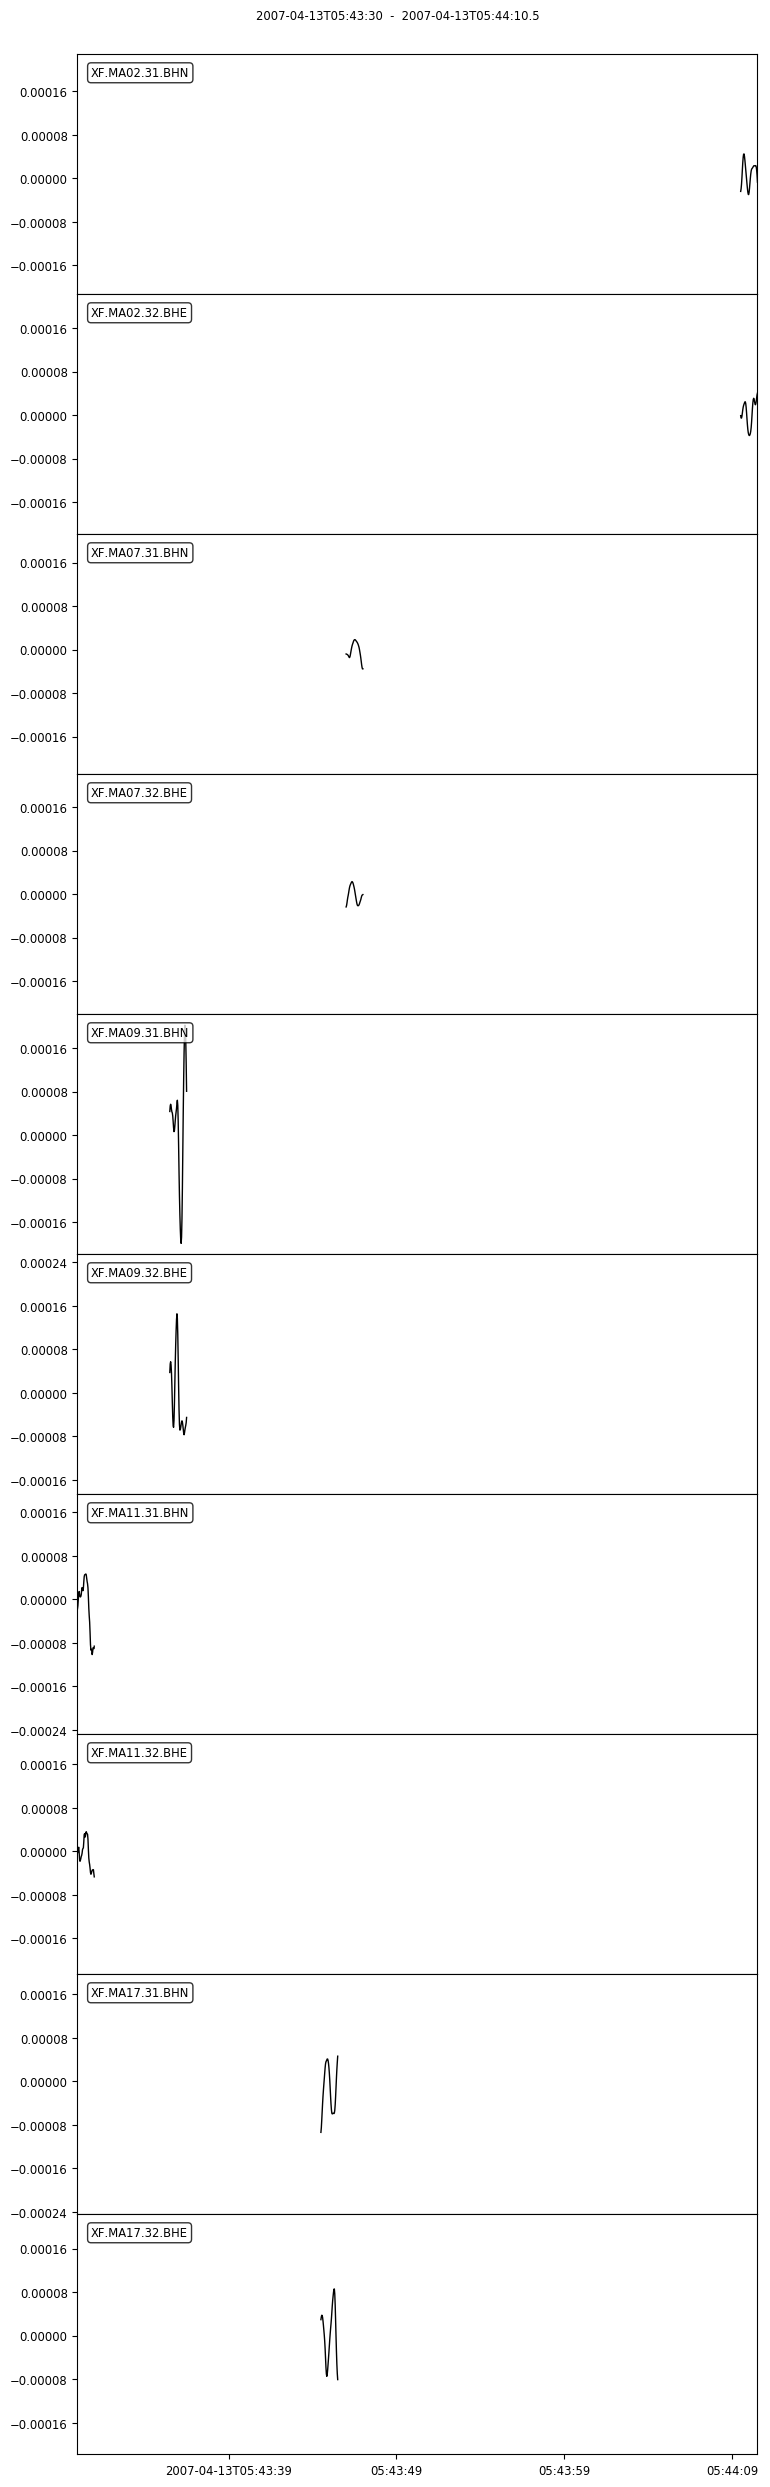

In [72]:
cop8.plot()

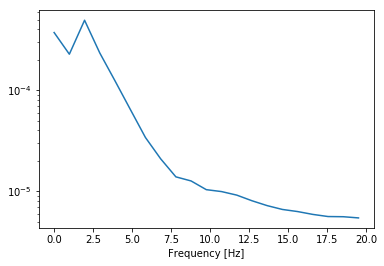

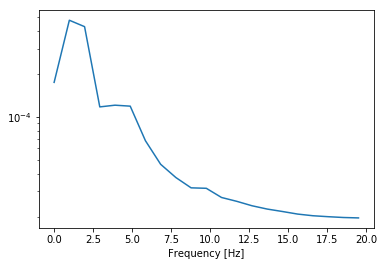

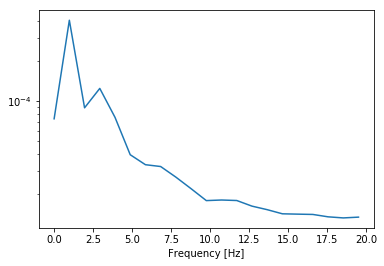

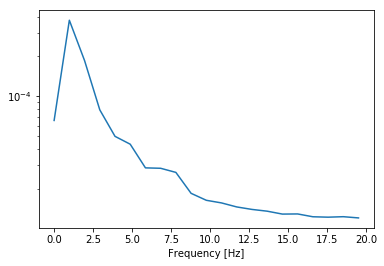

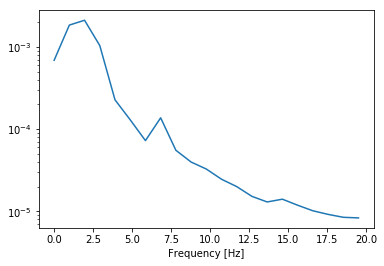

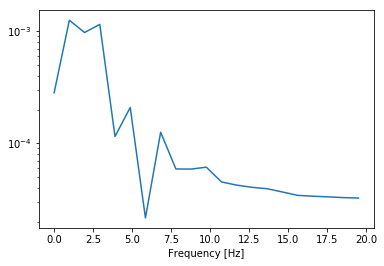

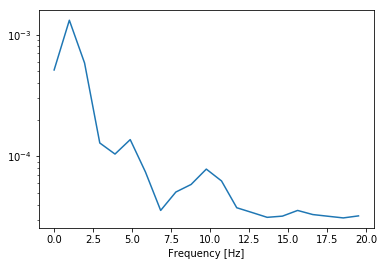

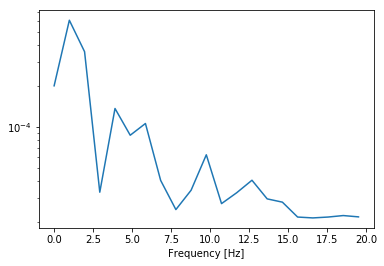

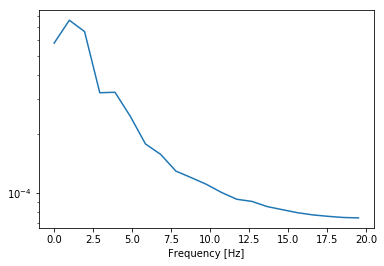

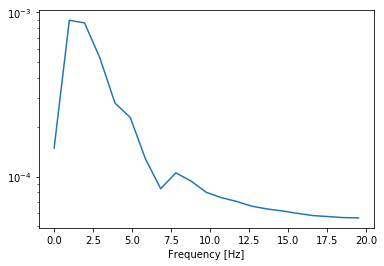

In [73]:
for tr in cop8:
    D8=np.fft.rfft(tr.data)
    freqs8 = np.fft.rfftfreq(tr.stats.npts, d=tr.stats.delta)
    
    plt.plot(freqs8, np.abs(D8))
    plt.xlabel("Frequency [Hz]")
    plt.yscale('log')
    plt.show()

#### Evento 9
Descartado por solo ser visible en dos estaciones

In [74]:
#EVENTO 9
st9=cli.get_waveforms("XF","MA02,MA08,MA09,MA11,MA17","**","BHE,BHN", t9, t9+120, attach_response=True)

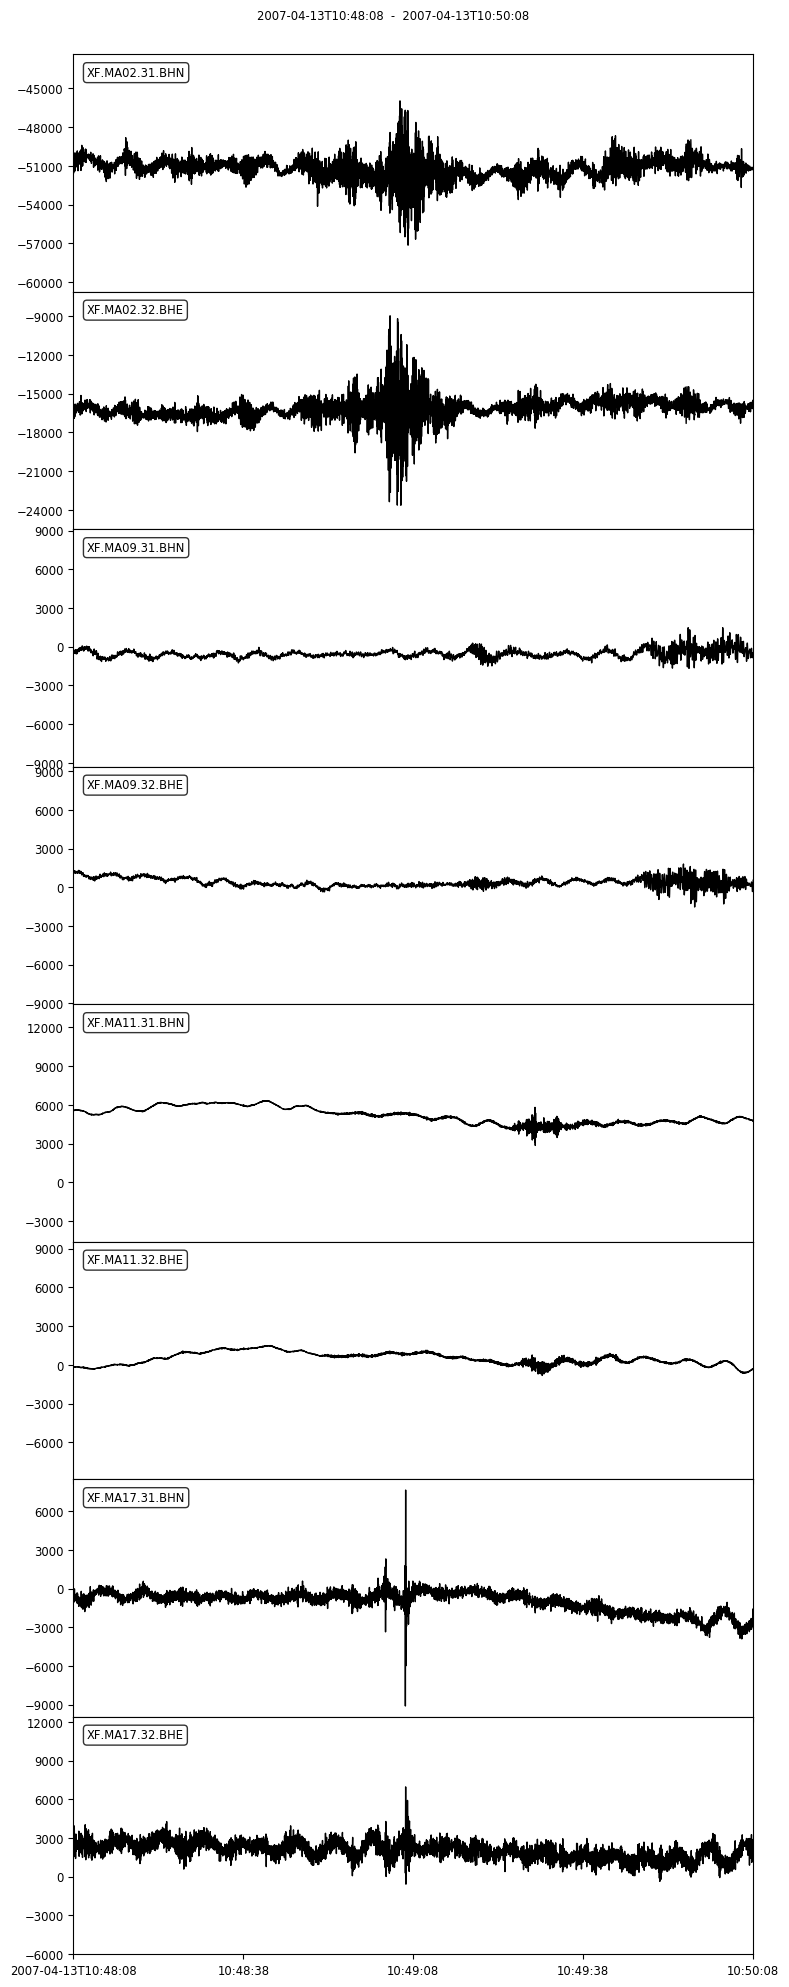

In [75]:
st9.plot()

### Resultados

En la tabla del archivo "CALCULOS MARS" dentro de la carpeta que contiene a esta libreta se pueden observar las distancias estimadas para cada estación y los cálculos para obtener los parámetros.

### Localizaciones

![Localización evento 1](EV1.png)
![Localización evento 3](EV3.png)
![Localización evento 4](EV4.png)
![Localización evento 5](EV5.png)
![Localización evento 7](EV7.png)
![Localización evento 8](EV8.png)

### Cálculos finales

![Resultados](RESULTADOS.PNG  "Resultados")

### Conclusiones

La magnitud momento calculada no difiere mucho (aunque en la realidad sí sean diferentes) ya que todas las frecuencias esquina caen en un rango similar (entre 7 y 15 Hz). 
El espectro no parece tener una amplitud espectral lineal, se propone acotar la ventana a un intervalo menor para quitar posibles contribuciones de onda P así como ampliar el rango de frecuencias del filtro pasabandas.

### Referencias
Brune, J. (1970) Tectonic Stress and the Spectra of Seismic Shear Waves from Earthquakes. Journal of Geophysical Research, 75,
4997-5009. http://dx.doi.org/10.1029/JB075i026p04997  
Thomas C. Hanks and Hiroo Kanamori, A moment magnitude scale, Journal of Geophysical Research: Solid Earth, 84, B5, (2348-
2350), (2012).  
Borman, P., Wendt, S. (2011)Estimating the epicenters of local and regional seismic sources,using the circle and chord method. DOI: 10.2312/GFZ.NMSOP-2_EX_11.1